# Conclusion

Dataset contains stats accumulated for team vs. a unique team.

Decision tree classification with kfolds=5, and pruned parameter values found with `RandomizedSearchCV`.

## HOME_TEAM_WINS

Target to beat - 59.1% home winrate

Achieved - **66% accuracy**

|Pruning|Max Accuracy|Mean Accuracy|Min Accuracy|
|-|-|-|-|
|None|66%|65%|62%|
|max_depth|65%|64%|63%|
|~~min_impurity_decrease~~|68%|65%|63%|
|max_leaf_nodes|66%|65%|64%|
|max_features|65%|63%|60%|

## HOME_HIGHER_FG_PCT

Target to beat - 55.0% rate of home having higher FGP

Achieved - **63% accuracy**

|Pruning|Max Accuracy|Mean Accuracy|Min Accuracy|
|-|-|-|-|
|None|62%|60%|60%|
|max_depth|62%|61%|59%|
|~~min_impurity_decrease~~|61%|60%|59%|
|max_leaf_nodes|61%|61%|59%|
|max_features|63%|61%|58%|

## HOME_HIGHER_FG3_PCT

Target to beat - 50.8% rate of home having higher FG3

Achieved - **62% accuracy**

|Pruning|Max Accuracy|Mean Accuracy|Min Accuracy|
|-|-|-|-|
|None|62%|58%|55%|
|max_depth|62%|57%|52%|
|~~min_impurity_decrease~~|59%|55%|51%|
|max_leaf_nodes|58%|57%|57%|
|max_features|55%|54%|53%|

## HOME_HIGHER_FT_PCT

Target to beat - 49.5% rate of home having higher FTP

Achieved - **59% accuracy**

|Pruning|Max Accuracy|Mean Accuracy|Min Accuracy|
|-|-|-|-|
|None|58%|55%|51%|
|max_depth|58%|55%|51%|
|~~min_impurity_decrease~~|59%|53%|50%|
|max_leaf_nodes|56%|54%|52%|
|max_features|59%|57%|55%|

## HOME_HIGHER_AST

Target to beat - 55.0% rate of home having higher AST

Achieved - **62% accuracy**

|Pruning|Max Accuracy|Mean Accuracy|Min Accuracy|
|-|-|-|-|
|None|61%|60%|59%|
|max_depth|62%|60%|59%|
|~~min_impurity_decrease~~|61%|60%|59%|
|max_leaf_nodes|60%|60%|59%|
|max_features|60%|59%|57%|

## HOME_HIGHER_REB

Target to beat - 53.4% rate of home having higher REB

Achieved - **60% accuracy**

|Pruning|Max Accuracy|Mean Accuracy|Min Accuracy|
|-|-|-|-|
|None|60%|59%|57%|
|max_depth|60%|58%|55%|
|~~min_impurity_decrease~~|62%|58%|55%|
|max_leaf_nodes|60%|59%|57%|
|max_features|60%|58%|55%|


In [1]:
## Make width of notebook 100%
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false; // disable scrollable frames
}

<IPython.core.display.Javascript object>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
sys.path.append('../../')
from datasets import data as Local ## Local module to get dataframes

from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import train_test_split

In [4]:
games_df, winners_df, greater_fgp_df, greater_fg3_df, greater_ft_df, greater_ast_df, greater_reb_df, cumulative_stats_df, games_details_df, teams_df, players_df, ranking_df = \
    Local.get_all_dataset_dataframes('../../datasets/')

In [5]:
team_v_team_stats_df = Local.get_team_v_team_stats_dataframe('../../datasets/')

# Target datasets

- Home has:
    - 59.1% Winrate
    - 55.0% Rate of Higher FGP
    - 50.8% Rate of Higher FG3
    - 49.5% Rate of Higher FTP
    - 55.0% Rate of Higher AST
    - 53.4% Rate of Higher REB

In [6]:
winners_df # Whether the home team won in a game in each row of `games_df`

16157    1
16156    1
16155    1
16154    1
16153    1
        ..
4        0
3        0
2        0
1        1
0        1
Name: HOME_TEAM_WINS, Length: 23520, dtype: int64

In [7]:
winners_df.describe()

count    23520.000000
mean         0.591029
std          0.491654
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: HOME_TEAM_WINS, dtype: float64

In [8]:
greater_fgp_df.describe()

count    23520.000000
mean         0.550468
std          0.497457
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: HOME_HIGHER_FG_PCT, dtype: float64

In [9]:
greater_fg3_df.describe()

count    23520.000000
mean         0.507993
std          0.499947
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: HOME_HIGHER_FG3_PCT, dtype: float64

In [10]:
greater_ft_df.describe()

count    23520.000000
mean         0.494855
std          0.499984
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: HOME_HIGHER_FT_PCT, dtype: float64

In [11]:
greater_ast_df.describe()

count    23520.000000
mean         0.550128
std          0.497491
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: HOME_HIGHER_AST, dtype: float64

In [12]:
greater_reb_df.describe()

count    23520.000000
mean         0.533886
std          0.498861
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: HOME_HIGHER_REB, dtype: float64

# Datasets

In [13]:
games_df

GAME_DATE_EST   GAME_ID  HOME_TEAM_ID  VISITOR_TEAM_ID  SEASON  \
16157    2003-10-05  10300001    1610612762       1610612742    2003   
16156    2003-10-06  10300002    1610612763       1610612749    2003   
16155    2003-10-07  10300009    1610612758       1610612746    2003   
16154    2003-10-07  10300005    1610612757       1610612745    2003   
16153    2003-10-07  10300007    1610612748       1610612755    2003   
...             ...       ...           ...              ...     ...   
4        2020-12-18  12000040    1610612761       1610612748    2020   
3        2020-12-18  12000039    1610612754       1610612755    2020   
2        2020-12-19  12000049    1610612763       1610612737    2020   
1        2020-12-19  12000048    1610612764       1610612765    2020   
0        2020-12-19  12000047    1610612753       1610612766    2020   

       PTS_home  FG_PCT_home  FT_PCT_home  FG3_PCT_home  AST_home  REB_home  \
16157      90.0        0.457        0.735         0.143      23.0      41.0   
16156     105.0        0.494        0.618         0.267      25.0      48.0   
16155     101.0        0.467        0.871         0.444      19.0      39.0   
16154     104.0        0.527        0.657         0.429      22.0      33.0   
16153      86.0        0.352        0.647         0.222      15.0      55.0   
...         ...          ...          ...           ...       ...       ...   
4         105.0        0.380        0.737         0.356      27.0      37.0   
3         107.0        0.371        0.692         0.262      19.0      45.0   
2         116.0        0.400        0.744         0.396      21.0      43.0   
1          99.0        0.427        0.625         0.295      24.0      45.0   
0         120.0        0.433        0.792         0.425      23.0      50.0   

       PTS_away  FG_PCT_away  FT_PCT_away  FG3_PCT_away  AST_away  REB_away  
16157      85.0        0.447        0.500         0.250      20.0      38.0  
16156      94.0        0.427        0.700         0.154      20.0      43.0  
16155      82.0        0.368        0.609         0.364      13.0      50.0  
16154      80.0        0.470        0.667         0.333      10.0      37.0  
16153      79.0        0.329        0.897         0.143       7.0      44.0  
...         ...          ...          ...           ...       ...       ...  
4         117.0        0.534        0.741         0.514      30.0      51.0  
3         113.0        0.533        0.629         0.355      23.0      48.0  
2         117.0        0.422        0.837         0.297      24.0      47.0  
1          96.0        0.402        0.647         0.326      18.0      51.0  
0         117.0        0.444        0.864         0.439      21.0      52.0  

[23520 rows x 17 columns]

In [14]:
cumulative_stats_df

DATE   GAME_ID  SEASON_TYPE  SEASON  GAMES_PLAYED_home  \
0      2003-10-05  10300001            1    2003                  0   
1      2003-10-06  10300002            1    2003                  0   
2      2003-10-07  10300009            1    2003                  0   
3      2003-10-07  10300005            1    2003                  0   
4      2003-10-07  10300007            1    2003                  0   
...           ...       ...          ...     ...                ...   
23515  2020-12-18  12000040            1    2020                  2   
23516  2020-12-18  12000039            1    2020                  2   
23517  2020-12-19  12000049            1    2020                  3   
23518  2020-12-19  12000048            1    2020                  2   
23519  2020-12-19  12000047            1    2020                  3   

       GAMES_PLAYED_away  PPG_total_home  FG_PCT_total_home  \
0                      0        0.000000           0.000000   
1                      0        0.000000           0.000000   
2                      0        0.000000           0.000000   
3                      0        0.000000           0.000000   
4                      0        0.000000           0.000000   
...                  ...             ...                ...   
23515                  1      111.500000           0.443500   
23516                  1      105.000000           0.438000   
23517                  3      119.333333           0.466667   
23518                  3      100.000000           0.415000   
23519                  3      112.666667           0.444333   

       FG3_PCT_total_home  FT_PCT_total_home  ...  PPG_total_away  \
0                0.000000           0.000000  ...        0.000000   
1                0.000000           0.000000  ...        0.000000   
2                0.000000           0.000000  ...        0.000000   
3                0.000000           0.000000  ...        0.000000   
4                0.000000           0.000000  ...        0.000000   
...                   ...                ...  ...             ...   
23515            0.353000           0.691000  ...       92.000000   
23516            0.383000           0.619000  ...      108.000000   
23517            0.329333           0.704667  ...      111.333333   
23518            0.321500           0.704500  ...       93.333333   
23519            0.305333           0.758000  ...      110.666667   

       FG_PCT_total_away  FG3_PCT_total_away  FT_PCT_total_away  \
0               0.000000            0.000000           0.000000   
1               0.000000            0.000000           0.000000   
2               0.000000            0.000000           0.000000   
3               0.000000            0.000000           0.000000   
4               0.000000            0.000000           0.000000   
...                  ...                 ...                ...   
23515           0.427000            0.283000           0.818000   
23516           0.471000            0.241000           0.750000   
23517           0.392667            0.332333           0.789667   
23518           0.413333            0.333000           0.713000   
23519           0.442333            0.372333           0.751000   

       APG_total_away  RPG_total_away  TEAM_ID_away  TEAM_ID_home  W_PCT_away  \
0            0.000000        0.000000  1.610613e+09  1.610613e+09    0.000000   
1            0.000000        0.000000  1.610613e+09  1.610613e+09    0.000000   
2            0.000000        0.000000  1.610613e+09  1.610613e+09    0.000000   
3            0.000000        0.000000  1.610613e+09  1.610613e+09    0.000000   
4            0.000000        0.000000  1.610613e+09  1.610613e+09    0.000000   
...               ...             ...           ...           ...         ...   
23515       26.000000       35.000000  1.610613e+09  1.610613e+09    0.000000   
23516       23.000000       42.000000  1.610613e+09  1.610613e+09    1.000000   
23517       24.000000       56.000000  1

In [15]:
team_v_team_stats_df

DATE   GAME_ID  SEASON_TYPE  SEASON  GAMES_PLAYED_home  \
0      2003-10-05  10300001            1    2003                  0   
1      2003-10-06  10300002            1    2003                  0   
2      2003-10-07  10300009            1    2003                  0   
3      2003-10-07  10300005            1    2003                  0   
4      2003-10-07  10300007            1    2003                  0   
...           ...       ...          ...     ...                ...   
23511  2020-12-18  12000044            1    2020                  1   
23516  2020-12-18  12000039            1    2020                  0   
23518  2020-12-19  12000048            1    2020                  1   
23517  2020-12-19  12000049            1    2020                  1   
23519  2020-12-19  12000047            1    2020                  1   

       GAMES_PLAYED_away  FG3_PCT_total_home  PPG_total_home  \
0                      0               0.000             0.0   
1                      0               0.000             0.0   
2                      0               0.000             0.0   
3                      0               0.000             0.0   
4                      0               0.000             0.0   
...                  ...                 ...             ...   
23511                  1               0.324           103.0   
23516                  0               0.000             0.0   
23518                  1               0.265            86.0   
23517                  1               0.380           128.0   
23519                  1               0.324           115.0   

       FG_PCT_total_home  RPG_total_home  ...  FG3_PCT_total_away  \
0                  0.000             0.0  ...               0.000   
1                  0.000             0.0  ...               0.000   
2                  0.000             0.0  ...               0.000   
3                  0.000             0.0  ...               0.000   
4                  0.000             0.0  ...               0.000   
...                  ...             ...  ...                 ...   
23511              0.381            46.0  ...               0.333   
23516              0.000             0.0  ...               0.000   
23518              0.397            42.0  ...               0.400   
23517              0.474            58.0  ...               0.289   
23519              0.474            53.0  ...               0.439   

       PPG_total_away  FG_PCT_total_away  RPG_total_away  FT_PCT_total_away  \
0                 0.0              0.000             0.0              0.000   
1                 0.0              0.000             0.0              0.000   
2                 0.0              0.000             0.0              0.000   
3                 0.0              0.000             0.0              0.000   
4                 0.0              0.000             0.0              0.000   
...               ...                ...             ...                ...   
23511           124.0              0.542            61.0              0.643   
23516             0.0              0.000             0.0              0.000   
23518            97.0              0.494            42.0              0.583   
23517           106.0              0.381            46.0              0.864   
23519           123.0              0.475            43.0              0.900   

       APG_total_away  TEAM_ID_away  TEAM_ID_home  W_PCT_away  W_PCT_home  
0                 0.0  1.610613e+09  1.610613e+09         0.0         0.0  
1                 0.0  1.610613e+09  1.610613e+09         0.0         0.0  
2                 0.0  1.610613e+09  1.610613e+09         0.0         0.0  
3                 0.0  1.610613e+09  1.610613e+09         0.0         0.0  
4                 0.0  1.610613e+09  1.610613e+09         0.0         0.0  
...               ...           ...           ...         ...         ...  
23511            26.0  1.610613e+09  1.610613e+09         1.0         0.0  
23516

## Attach target columns to dataset

In [16]:
team_v_team_stats_copy_df = team_v_team_stats_df.copy()
team_v_team_stats_copy_df['home_win'] = winners_df
team_v_team_stats_copy_df['greater_fgp'] = greater_fgp_df
team_v_team_stats_copy_df['greater_fg3'] = greater_fg3_df
team_v_team_stats_copy_df['greater_ft'] = greater_ft_df
team_v_team_stats_copy_df['greater_ast'] = greater_ast_df
team_v_team_stats_copy_df['greater_reb'] = greater_reb_df

## Remove rows w/o data

In [17]:
team_v_team_stats_copy_df = team_v_team_stats_copy_df[(team_v_team_stats_copy_df['GAMES_PLAYED_home']>0) & (team_v_team_stats_copy_df['GAMES_PLAYED_away']>0)]

# Get new target datasets after row removal
winners_df = team_v_team_stats_copy_df['home_win']
greater_fgp_df = team_v_team_stats_copy_df['greater_fgp']
greater_fg3_df = team_v_team_stats_copy_df['greater_fg3']
greater_ft_df = team_v_team_stats_copy_df['greater_ft']
greater_ast_df = team_v_team_stats_copy_df['greater_ast']
greater_reb_df = team_v_team_stats_copy_df['greater_reb']

## Remove non-data

In [18]:
# Delete non-data
for key in [
    'DATE','GAME_ID','TEAM_ID_home','TEAM_ID_away','SEASON_TYPE','SEASON','GAMES_PLAYED_home','GAMES_PLAYED_away',
    'home_win','greater_fgp','greater_fg3','greater_ft','greater_ast','greater_reb'
]:
    del team_v_team_stats_copy_df[key]

team_v_team_stats_copy_df

FG3_PCT_total_home  PPG_total_home  FG_PCT_total_home  RPG_total_home  \
26                  0.211            78.0              0.329            38.0   
49                  0.000            98.0              0.500            37.0   
44                  0.667            58.0              0.457            31.0   
53                  0.286           104.0              0.493            40.0   
87                  0.250            85.0              0.447            38.0   
...                   ...             ...                ...             ...   
23509               0.310           107.0              0.407            45.0   
23511               0.324           103.0              0.381            46.0   
23518               0.265            86.0              0.397            42.0   
23517               0.380           128.0              0.474            58.0   
23519               0.324           115.0              0.474            53.0   

       FT_PCT_total_home  APG_total_home  FG3_PCT_total_away  PPG_total_away  \
26                 0.737             8.0               0.370            98.0   
49                 0.800            17.0               0.700           105.0   
44                 0.700            10.0               0.300            62.0   
53                 0.700            22.0               0.214            89.0   
87                 0.500            20.0               0.143            90.0   
...                  ...             ...                 ...             ...   
23509              0.800            26.0               0.400           112.0   
23511              0.680            22.0               0.333           124.0   
23518              0.682            18.0               0.400            97.0   
23517              0.773            33.0               0.289           106.0   
23519              0.917            26.0               0.439           123.0   

       FG_PCT_total_away  RPG_total_away  FT_PCT_total_away  APG_total_away  \
26                 0.413            42.0              0.703            22.0   
49                 0.527            39.0              0.714            27.0   
44                 0.385            30.0              0.576            11.0   
53                 0.462            36.0              0.538            21.0   
87                 0.457            41.0              0.735            23.0   
...                  ...             ...                ...             ...   
23509              0.476            47.0              0.750            20.0   
23511              0.542            61.0              0.643            26.0   
23518              0.494            42.0              0.583            20.0   
23517              0.381            46.0              0.864            25.0   
23519              0.475            43.0              0.900            32.0   

       W_PCT_away  W_PCT_home  
26            1.0         0.0  
49            1.0         0.0  
44            1.0         0.0  
53            0.0         1.0  
87            1.0         0.0  
...           ...         ...  
23509         1.0         0.0  
23511         1.0         0.0  
23518         1.0         0.0  
23517         0.0         1.0  
23519         1.0         0.0  

[16034 rows x 14 columns]

## Do hyperparameters searches

In [19]:
from sklearn.metrics import classification_report

In [20]:
from sklearn.tree import plot_tree
from yellowbrick.model_selection import FeatureImportances

In [21]:
from sklearn.utils.class_weight import compute_sample_weight

In [22]:
# Get best params based from CV function
def do_cv(classifier, cv_fun, params, x, y, **kwargs):
    clf = cv_fun(
        classifier,
        params,
        scoring='accuracy', # Optimize for the 'accuracy' score of the model.
        **kwargs,
    )
#     clf.fit(x, y, sample_weight=compute_sample_weight('balanced',y))
    clf.fit(x, y)
    return clf

## Plot feature importances

In [23]:
def plot_feature_importances(clf, X, y):
    viz = FeatureImportances(clf, labels=X.columns)
    viz.fit(X, y)
    viz.show()

In [24]:
def print_all_metrics_and_plot(clf, X_train_dict, X_test_dict, y_train_dict, y_test_dict, grid_cv_params):
    scores = []
    for key in X_train_dict.keys():
        cv_clf = do_cv(
            clf,
#             GridSearchCV,
            RandomizedSearchCV,
            grid_cv_params,
            X_train_dict[key],
            y_train_dict[key],
        )
        print(key.upper()+':\n')
        score = cv_clf.best_estimator_.score(X_test_dict[key], y_test_dict[key])
        scores.append(score)
        print('Best decision tree accuracy (%s): %.2f' % (str(cv_clf.best_params_), score))
        print(classification_report(y_test_dict[key], cv_clf.best_estimator_.predict(X_test_dict[key])))
        plot_feature_importances(cv_clf.best_estimator_, X_train_dict[key], y_train_dict[key])
        print('---------------------------------------------')
    return scores

## Build K-folds datasets

In [25]:
from imblearn.combine import SMOTEENN

In [26]:
from sklearn.model_selection import KFold
kf = KFold(shuffle=True, random_state=123)

X_train_dicts = []
X_test_dicts = []
y_train_dicts = []
y_test_dicts = []

for target, key in [(winners_df, 'winner'), (greater_fgp_df, 'fgp'), (greater_fg3_df, 'fg3'), (greater_ft_df, 'ft'), (greater_ast_df, 'ast'), (greater_reb_df, 'reb')]:
    X_over, y_over = SMOTEENN(sampling_strategy='all').fit_resample(team_v_team_stats_copy_df, target)
    for train, test in kf.split(X_over, y_over):
        X_train_dict = {}
        X_test_dict = {}
        y_train_dict = {}
        y_test_dict = {}
        
        X_train_dict[key], X_test_dict[key] = X_over.iloc[train], X_over.iloc[test]
        y_train_dict[key], y_test_dict[key] = y_over.iloc[train], y_over.iloc[test]
        
        X_train_dicts.append(X_train_dict)
        X_test_dicts.append(X_test_dict)
        y_train_dicts.append(y_train_dict)
        y_test_dicts.append(y_test_dict)

assert len(X_train_dicts)==len(X_test_dicts)==len(y_train_dicts)==len(y_test_dicts)
print(len(X_train_dicts))

30


In [27]:
def print_cross_validated_and_plot(X_train_dicts, X_test_dicts, y_train_dicts, y_test_dicts, params):
    scores=[]
    for i in range(len(X_train_dicts)):
        print(f'i={i}')
        score = print_all_metrics_and_plot(
            DecisionTreeClassifier(random_state=0),
            X_train_dicts[i],
            X_test_dicts[i],
            y_train_dicts[i],
            y_test_dicts[i],
            params,
        )
        if (i+1)%5==0:
            scores = pd.DataFrame(np.array(scores))
            print(f'Mean accuracy: {scores.mean()[0]}')
            print(f'Max accuracy: {scores.max()[0]}')
            print(f'Min accuracy: {scores.min()[0]}')
            print('=========================================')
            scores=[]
        else:
            scores += score

## Train decision tree w/o pruning

i=0


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


WINNER:

Best decision tree accuracy ({'criterion': 'entropy'}): 0.66
              precision    recall  f1-score   support

           0       0.73      0.76      0.75       633
           1       0.51      0.48      0.49       333

    accuracy                           0.66       966
   macro avg       0.62      0.62      0.62       966
weighted avg       0.66      0.66      0.66       966



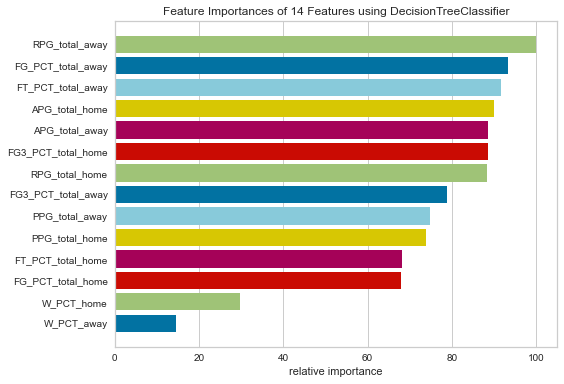

---------------------------------------------
i=1


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


WINNER:

Best decision tree accuracy ({'criterion': 'gini'}): 0.65
              precision    recall  f1-score   support

           0       0.73      0.74      0.73       627
           1       0.50      0.48      0.49       338

    accuracy                           0.65       965
   macro avg       0.61      0.61      0.61       965
weighted avg       0.65      0.65      0.65       965



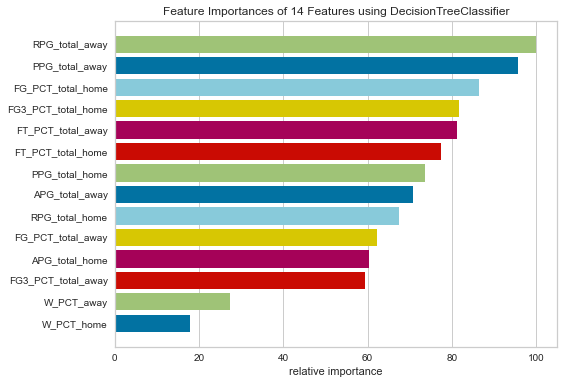

---------------------------------------------
i=2


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


WINNER:

Best decision tree accuracy ({'criterion': 'gini'}): 0.65
              precision    recall  f1-score   support

           0       0.71      0.74      0.73       604
           1       0.53      0.49      0.51       361

    accuracy                           0.65       965
   macro avg       0.62      0.62      0.62       965
weighted avg       0.64      0.65      0.65       965



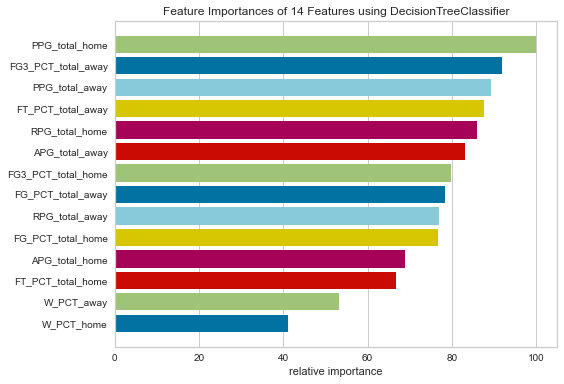

---------------------------------------------
i=3


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


WINNER:

Best decision tree accuracy ({'criterion': 'gini'}): 0.62
              precision    recall  f1-score   support

           0       0.73      0.70      0.72       653
           1       0.42      0.45      0.44       312

    accuracy                           0.62       965
   macro avg       0.58      0.58      0.58       965
weighted avg       0.63      0.62      0.63       965



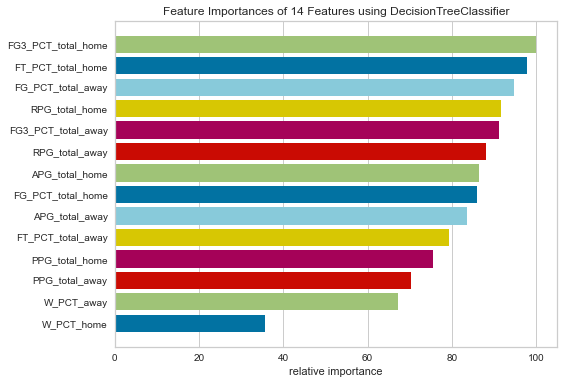

---------------------------------------------
i=4


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


WINNER:

Best decision tree accuracy ({'criterion': 'gini'}): 0.67
              precision    recall  f1-score   support

           0       0.72      0.76      0.74       596
           1       0.58      0.53      0.55       369

    accuracy                           0.67       965
   macro avg       0.65      0.64      0.65       965
weighted avg       0.67      0.67      0.67       965



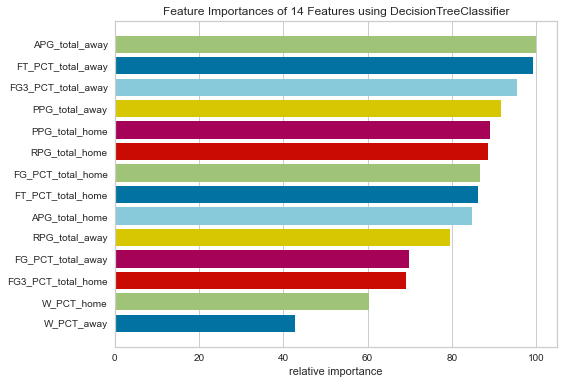

---------------------------------------------
Mean accuracy: 0.6459426189939819
Max accuracy: 0.6614906832298136
Min accuracy: 0.6227979274611399
i=5


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FGP:

Best decision tree accuracy ({'criterion': 'entropy'}): 0.61
              precision    recall  f1-score   support

           0       0.69      0.67      0.68       420
           1       0.50      0.52      0.51       269

    accuracy                           0.61       689
   macro avg       0.59      0.60      0.59       689
weighted avg       0.61      0.61      0.61       689



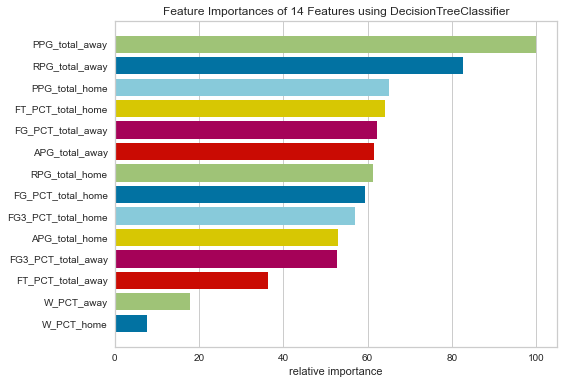

---------------------------------------------
i=6


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FGP:

Best decision tree accuracy ({'criterion': 'gini'}): 0.60
              precision    recall  f1-score   support

           0       0.66      0.67      0.67       410
           1       0.50      0.49      0.50       279

    accuracy                           0.60       689
   macro avg       0.58      0.58      0.58       689
weighted avg       0.60      0.60      0.60       689



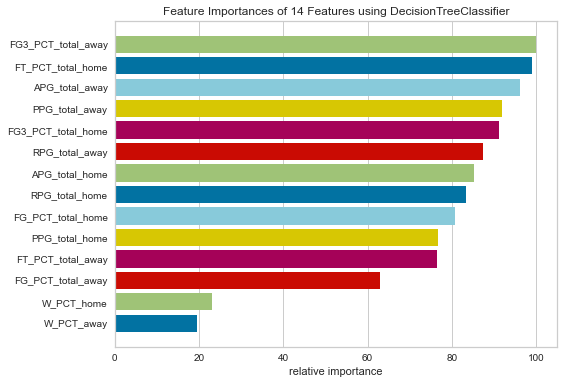

---------------------------------------------
i=7


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FGP:

Best decision tree accuracy ({'criterion': 'gini'}): 0.62
              precision    recall  f1-score   support

           0       0.67      0.69      0.68       407
           1       0.53      0.51      0.52       282

    accuracy                           0.62       689
   macro avg       0.60      0.60      0.60       689
weighted avg       0.61      0.62      0.61       689



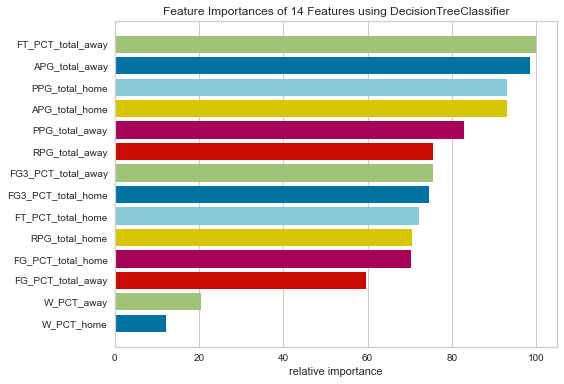

---------------------------------------------
i=8


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FGP:

Best decision tree accuracy ({'criterion': 'entropy'}): 0.61
              precision    recall  f1-score   support

           0       0.68      0.68      0.68       423
           1       0.49      0.49      0.49       265

    accuracy                           0.61       688
   macro avg       0.59      0.59      0.59       688
weighted avg       0.61      0.61      0.61       688



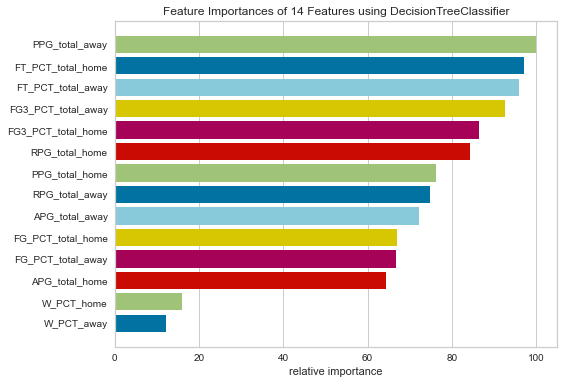

---------------------------------------------
i=9


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FGP:

Best decision tree accuracy ({'criterion': 'gini'}): 0.60
              precision    recall  f1-score   support

           0       0.67      0.66      0.66       409
           1       0.51      0.52      0.51       279

    accuracy                           0.60       688
   macro avg       0.59      0.59      0.59       688
weighted avg       0.60      0.60      0.60       688



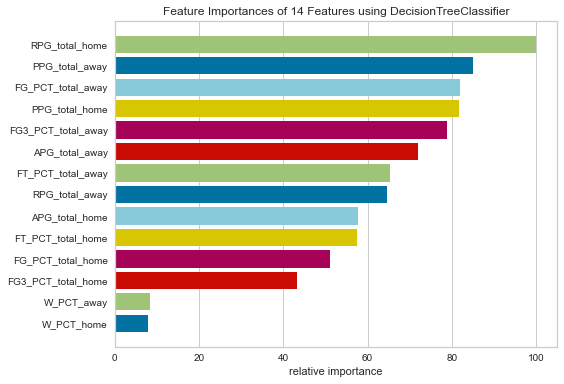

---------------------------------------------
Mean accuracy: 0.6083486979781956
Max accuracy: 0.6153846153846154
Min accuracy: 0.5979680696661829
i=10


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FG3:

Best decision tree accuracy ({'criterion': 'gini'}): 0.56
              precision    recall  f1-score   support

           0       0.58      0.60      0.59       235
           1       0.54      0.52      0.53       216

    accuracy                           0.56       451
   macro avg       0.56      0.56      0.56       451
weighted avg       0.56      0.56      0.56       451



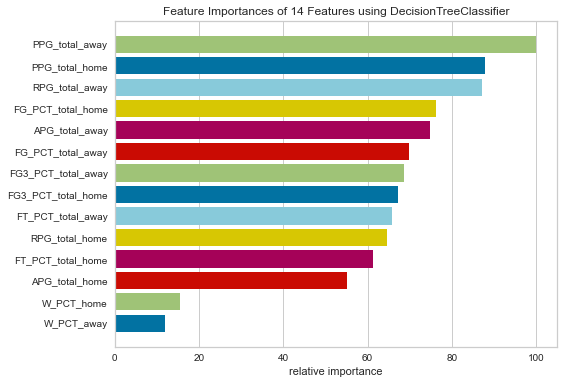

---------------------------------------------
i=11


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FG3:

Best decision tree accuracy ({'criterion': 'gini'}): 0.55
              precision    recall  f1-score   support

           0       0.59      0.59      0.59       247
           1       0.51      0.51      0.51       204

    accuracy                           0.55       451
   macro avg       0.55      0.55      0.55       451
weighted avg       0.55      0.55      0.55       451



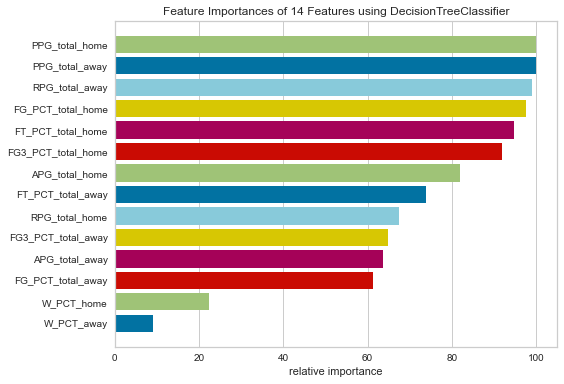

---------------------------------------------
i=12


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FG3:

Best decision tree accuracy ({'criterion': 'gini'}): 0.62
              precision    recall  f1-score   support

           0       0.64      0.67      0.65       238
           1       0.61      0.57      0.59       213

    accuracy                           0.62       451
   macro avg       0.62      0.62      0.62       451
weighted avg       0.62      0.62      0.62       451



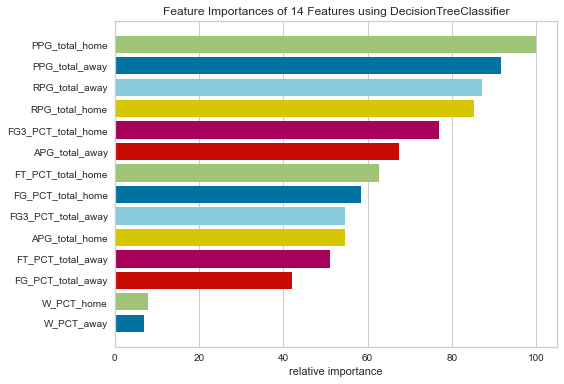

---------------------------------------------
i=13


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FG3:

Best decision tree accuracy ({'criterion': 'entropy'}): 0.58
              precision    recall  f1-score   support

           0       0.59      0.59      0.59       232
           1       0.57      0.57      0.57       219

    accuracy                           0.58       451
   macro avg       0.58      0.58      0.58       451
weighted avg       0.58      0.58      0.58       451



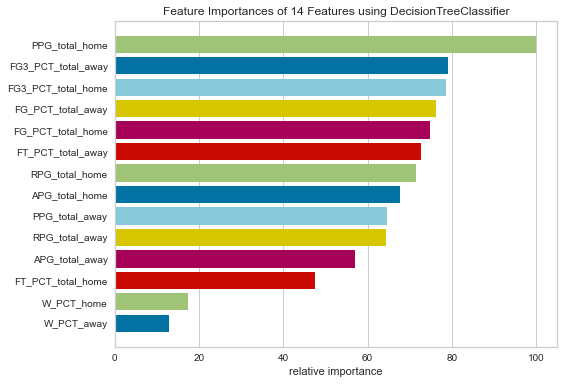

---------------------------------------------
i=14


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FG3:

Best decision tree accuracy ({'criterion': 'gini'}): 0.55
              precision    recall  f1-score   support

           0       0.57      0.57      0.57       236
           1       0.53      0.53      0.53       214

    accuracy                           0.55       450
   macro avg       0.55      0.55      0.55       450
weighted avg       0.55      0.55      0.55       450



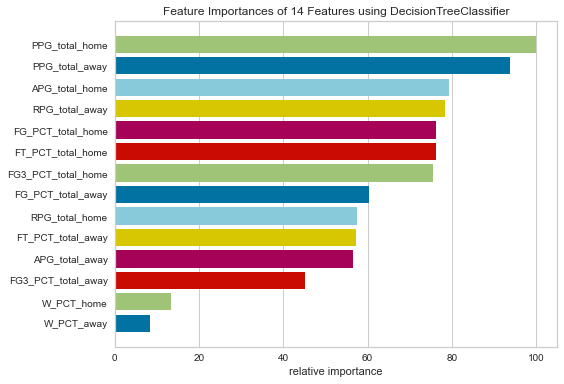

---------------------------------------------
Mean accuracy: 0.5798226164079823
Max accuracy: 0.623059866962306
Min accuracy: 0.5543237250554324
i=15
FT:

Best decision tree accuracy ({'criterion': 'entropy'}): 0.54


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.52      0.47      0.49       208
           1       0.55      0.60      0.57       225

    accuracy                           0.54       433
   macro avg       0.54      0.54      0.53       433
weighted avg       0.54      0.54      0.54       433



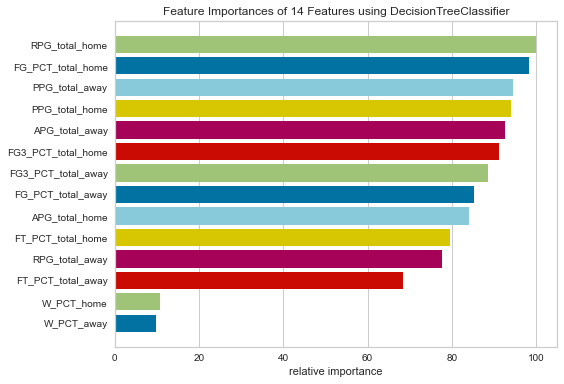

---------------------------------------------
i=16


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FT:

Best decision tree accuracy ({'criterion': 'gini'}): 0.51
              precision    recall  f1-score   support

           0       0.51      0.50      0.51       218
           1       0.51      0.52      0.51       215

    accuracy                           0.51       433
   macro avg       0.51      0.51      0.51       433
weighted avg       0.51      0.51      0.51       433



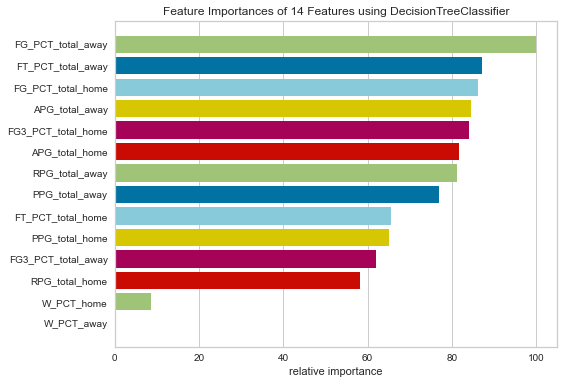

---------------------------------------------
i=17


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FT:

Best decision tree accuracy ({'criterion': 'entropy'}): 0.58
              precision    recall  f1-score   support

           0       0.57      0.60      0.59       210
           1       0.60      0.57      0.58       223

    accuracy                           0.58       433
   macro avg       0.58      0.58      0.58       433
weighted avg       0.59      0.58      0.58       433



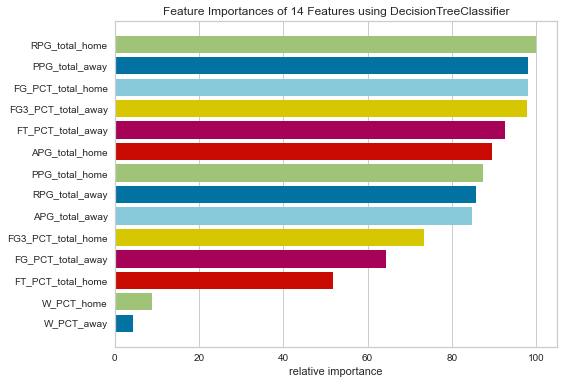

---------------------------------------------
i=18
FT:



c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best decision tree accuracy ({'criterion': 'gini'}): 0.57
              precision    recall  f1-score   support

           0       0.55      0.56      0.55       209
           1       0.58      0.57      0.58       224

    accuracy                           0.57       433
   macro avg       0.57      0.57      0.57       433
weighted avg       0.57      0.57      0.57       433



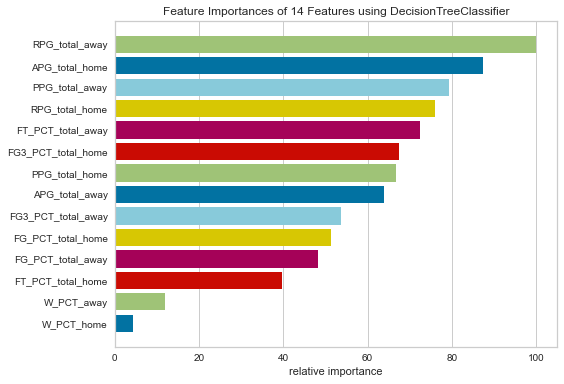

---------------------------------------------
i=19


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FT:

Best decision tree accuracy ({'criterion': 'entropy'}): 0.55
              precision    recall  f1-score   support

           0       0.55      0.48      0.51       214
           1       0.54      0.61      0.58       219

    accuracy                           0.55       433
   macro avg       0.55      0.54      0.54       433
weighted avg       0.55      0.55      0.54       433



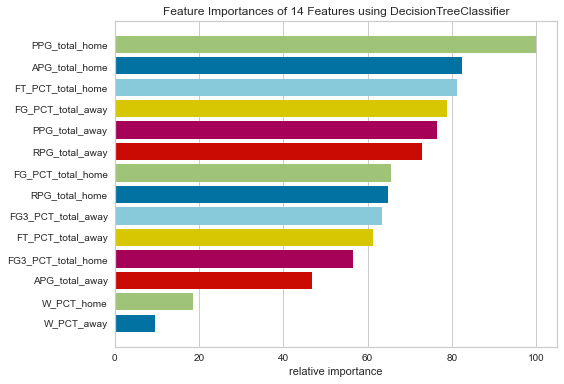

---------------------------------------------
Mean accuracy: 0.5496535796766744
Max accuracy: 0.5842956120092379
Min accuracy: 0.5103926096997691
i=20


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


AST:

Best decision tree accuracy ({'criterion': 'gini'}): 0.59
              precision    recall  f1-score   support

           0       0.64      0.67      0.65       384
           1       0.50      0.47      0.48       270

    accuracy                           0.59       654
   macro avg       0.57      0.57      0.57       654
weighted avg       0.58      0.59      0.58       654



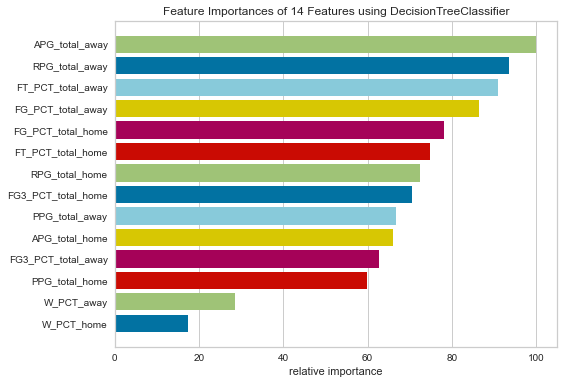

---------------------------------------------
i=21


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


AST:

Best decision tree accuracy ({'criterion': 'entropy'}): 0.60
              precision    recall  f1-score   support

           0       0.66      0.70      0.68       394
           1       0.50      0.45      0.47       260

    accuracy                           0.60       654
   macro avg       0.58      0.58      0.58       654
weighted avg       0.60      0.60      0.60       654



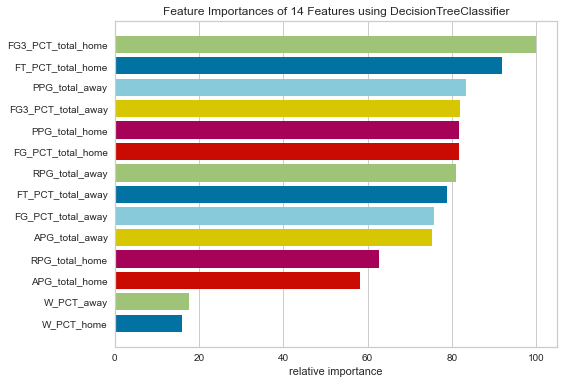

---------------------------------------------
i=22


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


AST:

Best decision tree accuracy ({'criterion': 'gini'}): 0.59
              precision    recall  f1-score   support

           0       0.66      0.67      0.67       393
           1       0.49      0.48      0.49       261

    accuracy                           0.59       654
   macro avg       0.58      0.58      0.58       654
weighted avg       0.59      0.59      0.59       654



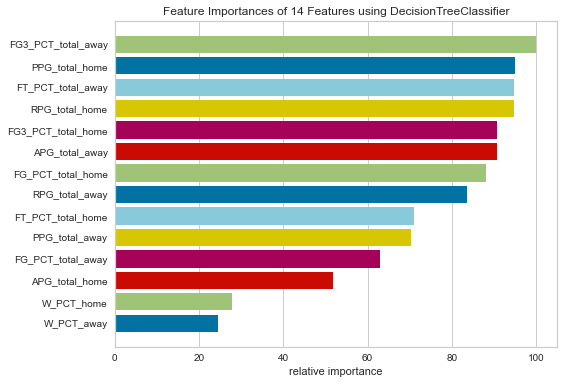

---------------------------------------------
i=23


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


AST:

Best decision tree accuracy ({'criterion': 'gini'}): 0.61
              precision    recall  f1-score   support

           0       0.69      0.65      0.67       399
           1       0.50      0.54      0.52       255

    accuracy                           0.61       654
   macro avg       0.59      0.59      0.59       654
weighted avg       0.61      0.61      0.61       654



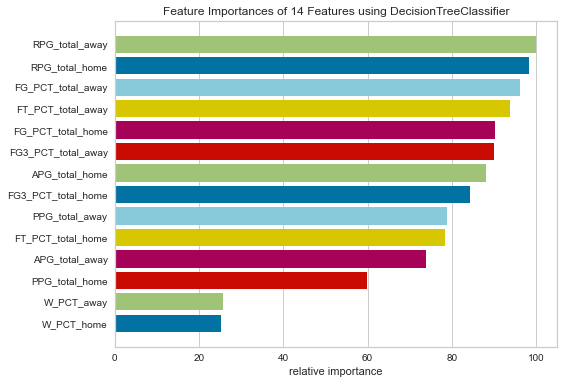

---------------------------------------------
i=24


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


AST:

Best decision tree accuracy ({'criterion': 'entropy'}): 0.62
              precision    recall  f1-score   support

           0       0.67      0.71      0.69       387
           1       0.53      0.48      0.51       266

    accuracy                           0.62       653
   macro avg       0.60      0.60      0.60       653
weighted avg       0.61      0.62      0.61       653



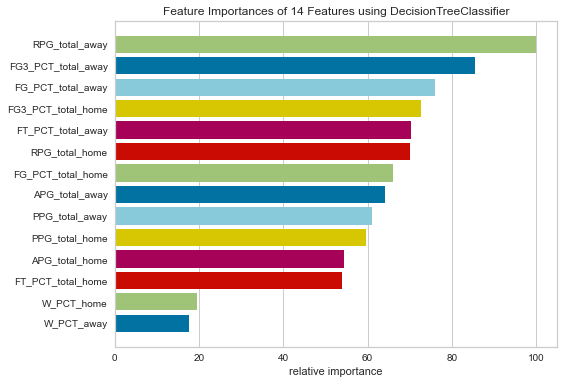

---------------------------------------------
Mean accuracy: 0.5970948012232415
Max accuracy: 0.6070336391437309
Min accuracy: 0.5856269113149847
i=25


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


REB:

Best decision tree accuracy ({'criterion': 'gini'}): 0.59
              precision    recall  f1-score   support

           0       0.65      0.66      0.66       344
           1       0.50      0.49      0.49       238

    accuracy                           0.59       582
   macro avg       0.57      0.57      0.57       582
weighted avg       0.59      0.59      0.59       582



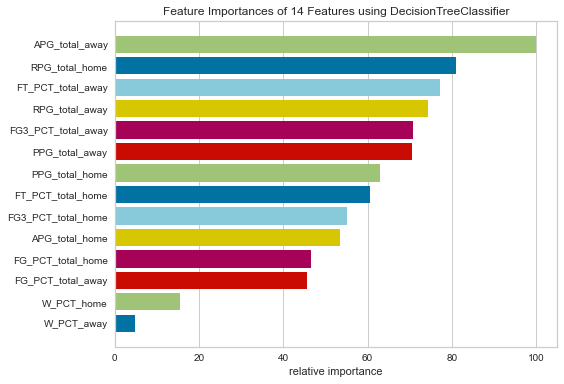

---------------------------------------------
i=26


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


REB:

Best decision tree accuracy ({'criterion': 'gini'}): 0.60
              precision    recall  f1-score   support

           0       0.65      0.65      0.65       334
           1       0.53      0.53      0.53       248

    accuracy                           0.60       582
   macro avg       0.59      0.59      0.59       582
weighted avg       0.60      0.60      0.60       582



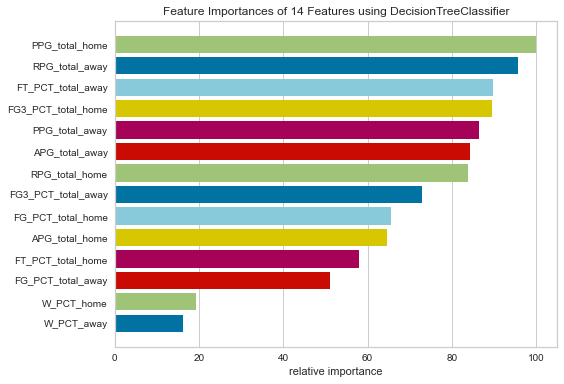

---------------------------------------------
i=27


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


REB:

Best decision tree accuracy ({'criterion': 'entropy'}): 0.60
              precision    recall  f1-score   support

           0       0.69      0.67      0.68       362
           1       0.48      0.50      0.49       220

    accuracy                           0.60       582
   macro avg       0.58      0.58      0.58       582
weighted avg       0.61      0.60      0.61       582



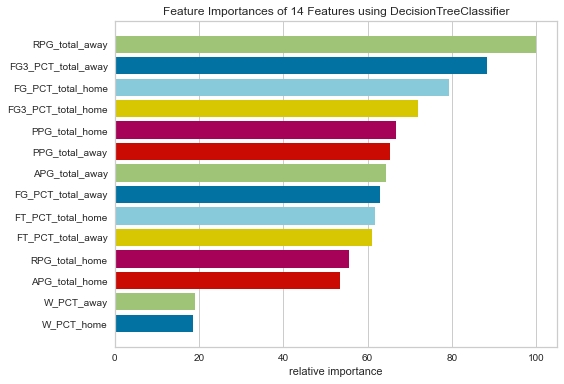

---------------------------------------------
i=28


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


REB:

Best decision tree accuracy ({'criterion': 'gini'}): 0.57
              precision    recall  f1-score   support

           0       0.59      0.66      0.63       319
           1       0.52      0.45      0.49       263

    accuracy                           0.57       582
   macro avg       0.56      0.56      0.56       582
weighted avg       0.56      0.57      0.56       582



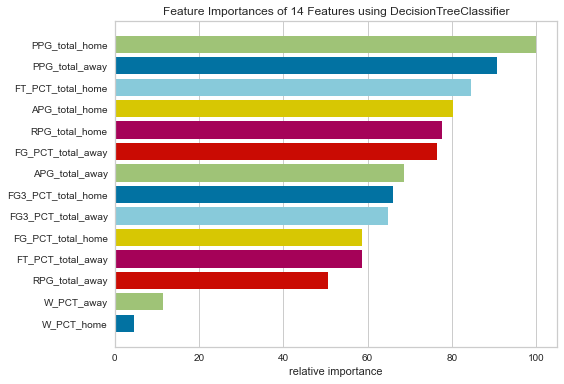

---------------------------------------------
i=29


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


REB:

Best decision tree accuracy ({'criterion': 'entropy'}): 0.57
              precision    recall  f1-score   support

           0       0.64      0.64      0.64       341
           1       0.49      0.49      0.49       240

    accuracy                           0.57       581
   macro avg       0.56      0.56      0.56       581
weighted avg       0.58      0.57      0.58       581



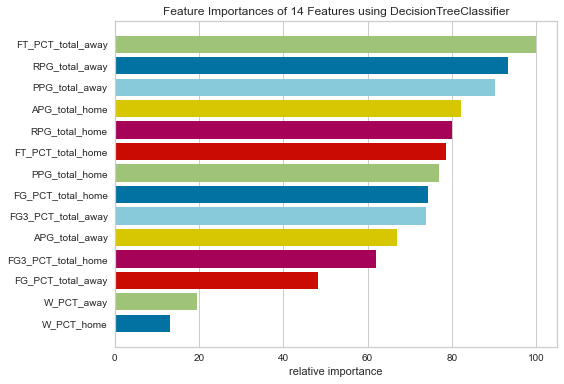

---------------------------------------------
Mean accuracy: 0.5893470790378006
Max accuracy: 0.6048109965635738
Min accuracy: 0.5670103092783505


In [28]:
print_cross_validated_and_plot(X_train_dicts, X_test_dicts, y_train_dicts, y_test_dicts, {'criterion':['gini','entropy']})

In [29]:
# plt.figure(figsize=(15,10))
# t = plot_tree(decision_tree_clf)

## Try prune max depth

i=0
WINNER:

Best decision tree accuracy ({'max_depth': 14, 'criterion': 'gini'}): 0.63
              precision    recall  f1-score   support

           0       0.70      0.77      0.73       633
           1       0.45      0.37      0.41       333

    accuracy                           0.63       966
   macro avg       0.58      0.57      0.57       966
weighted avg       0.61      0.63      0.62       966



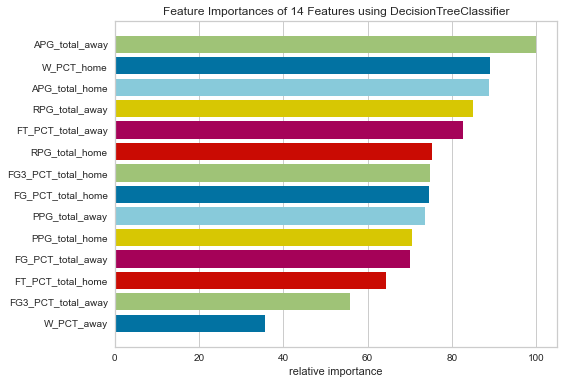

---------------------------------------------
i=1
WINNER:

Best decision tree accuracy ({'max_depth': 4, 'criterion': 'entropy'}): 0.65
              precision    recall  f1-score   support

           0       0.65      0.97      0.78       627
           1       0.45      0.04      0.07       338

    accuracy                           0.65       965
   macro avg       0.55      0.51      0.43       965
weighted avg       0.58      0.65      0.53       965



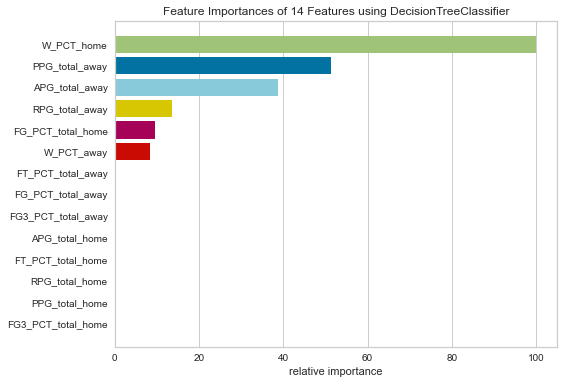

---------------------------------------------
i=2
WINNER:

Best decision tree accuracy ({'max_depth': 8, 'criterion': 'gini'}): 0.64
              precision    recall  f1-score   support

           0       0.65      0.91      0.76       604
           1       0.54      0.18      0.27       361

    accuracy                           0.64       965
   macro avg       0.59      0.54      0.51       965
weighted avg       0.61      0.64      0.57       965



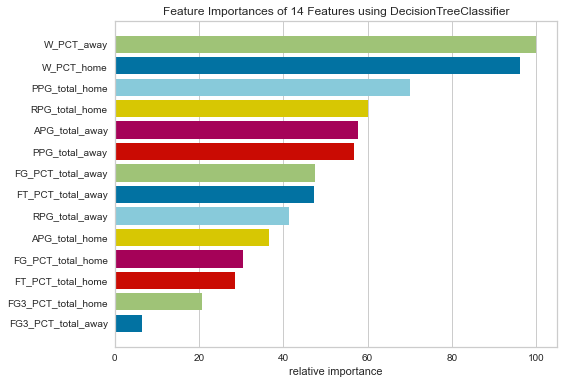

---------------------------------------------
i=3
WINNER:

Best decision tree accuracy ({'max_depth': 19, 'criterion': 'entropy'}): 0.65
              precision    recall  f1-score   support

           0       0.75      0.74      0.74       653
           1       0.46      0.47      0.47       312

    accuracy                           0.65       965
   macro avg       0.60      0.61      0.61       965
weighted avg       0.65      0.65      0.65       965



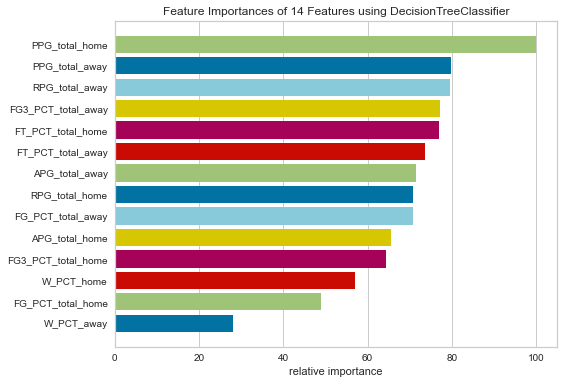

---------------------------------------------
i=4
WINNER:

Best decision tree accuracy ({'max_depth': 4, 'criterion': 'entropy'}): 0.62
              precision    recall  f1-score   support

           0       0.62      1.00      0.76       596
           1       0.75      0.01      0.02       369

    accuracy                           0.62       965
   macro avg       0.68      0.50      0.39       965
weighted avg       0.67      0.62      0.48       965



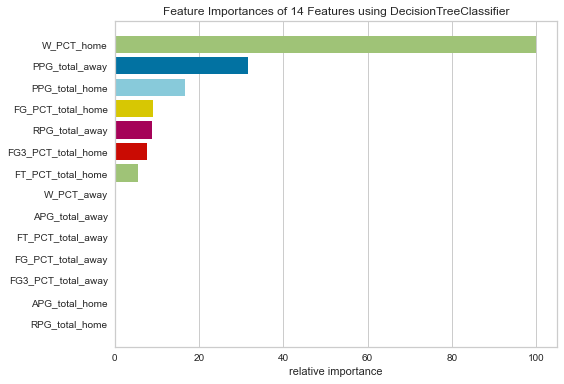

---------------------------------------------
Mean accuracy: 0.6412877203145282
Max accuracy: 0.6538860103626943
Min accuracy: 0.629399585921325
i=5
FGP:

Best decision tree accuracy ({'max_depth': 24, 'criterion': 'entropy'}): 0.59
              precision    recall  f1-score   support

           0       0.67      0.65      0.66       420
           1       0.48      0.50      0.49       269

    accuracy                           0.59       689
   macro avg       0.57      0.58      0.58       689
weighted avg       0.60      0.59      0.59       689



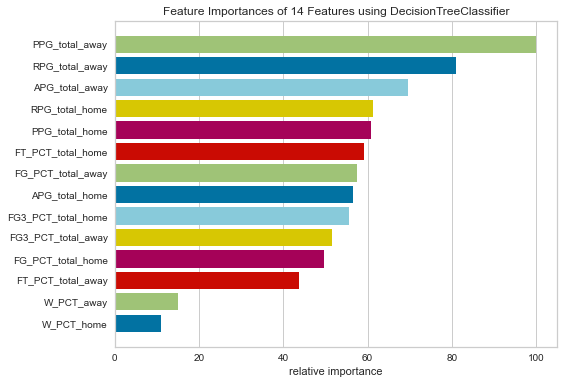

---------------------------------------------
i=6
FGP:

Best decision tree accuracy ({'max_depth': 16, 'criterion': 'gini'}): 0.61
              precision    recall  f1-score   support

           0       0.65      0.73      0.69       410
           1       0.52      0.43      0.47       279

    accuracy                           0.61       689
   macro avg       0.59      0.58      0.58       689
weighted avg       0.60      0.61      0.60       689



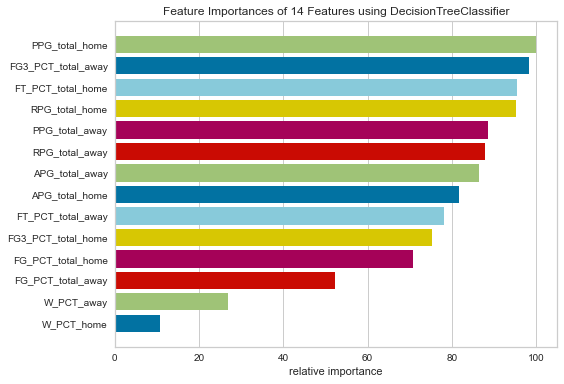

---------------------------------------------
i=7
FGP:

Best decision tree accuracy ({'max_depth': 32, 'criterion': 'gini'}): 0.62
              precision    recall  f1-score   support

           0       0.67      0.69      0.68       407
           1       0.53      0.51      0.52       282

    accuracy                           0.62       689
   macro avg       0.60      0.60      0.60       689
weighted avg       0.61      0.62      0.61       689



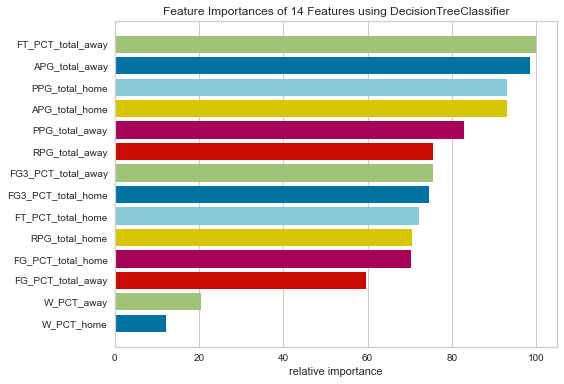

---------------------------------------------
i=8
FGP:

Best decision tree accuracy ({'max_depth': 17, 'criterion': 'entropy'}): 0.61
              precision    recall  f1-score   support

           0       0.65      0.78      0.71       423
           1       0.49      0.35      0.41       265

    accuracy                           0.61       688
   macro avg       0.57      0.56      0.56       688
weighted avg       0.59      0.61      0.59       688



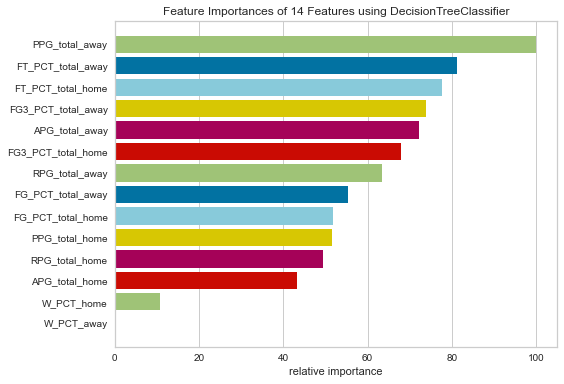

---------------------------------------------
i=9
FGP:

Best decision tree accuracy ({'max_depth': 8, 'criterion': 'entropy'}): 0.59
              precision    recall  f1-score   support

           0       0.61      0.87      0.72       409
           1       0.48      0.18      0.26       279

    accuracy                           0.59       688
   macro avg       0.54      0.52      0.49       688
weighted avg       0.56      0.59      0.53       688



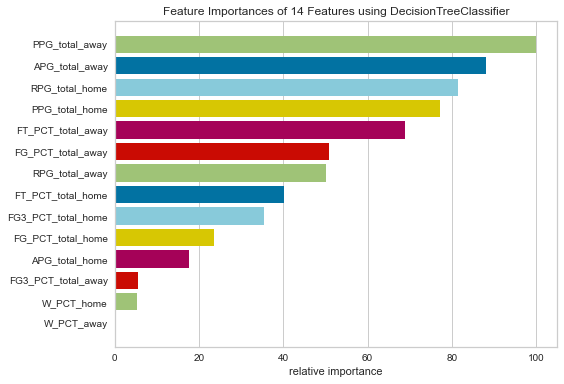

---------------------------------------------
Mean accuracy: 0.6068978465588821
Max accuracy: 0.6153846153846154
Min accuracy: 0.5921625544267054
i=10
FG3:

Best decision tree accuracy ({'max_depth': 6, 'criterion': 'gini'}): 0.56
              precision    recall  f1-score   support

           0       0.55      0.84      0.67       235
           1       0.60      0.26      0.36       216

    accuracy                           0.56       451
   macro avg       0.57      0.55      0.51       451
weighted avg       0.57      0.56      0.52       451



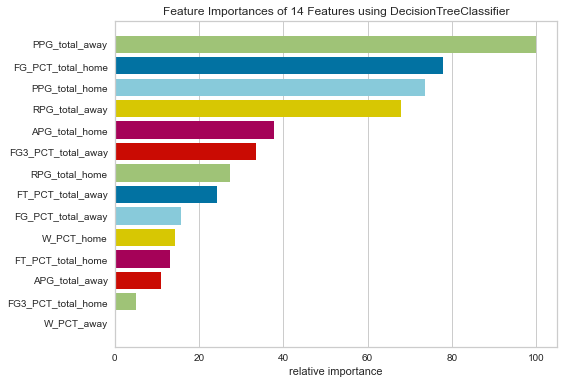

---------------------------------------------
i=11
FG3:

Best decision tree accuracy ({'max_depth': 58, 'criterion': 'gini'}): 0.55
              precision    recall  f1-score   support

           0       0.59      0.59      0.59       247
           1       0.51      0.51      0.51       204

    accuracy                           0.55       451
   macro avg       0.55      0.55      0.55       451
weighted avg       0.55      0.55      0.55       451



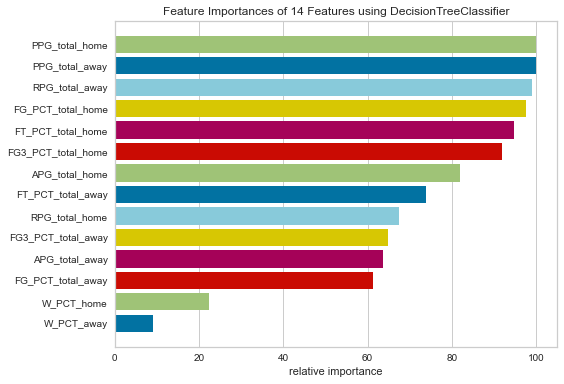

---------------------------------------------
i=12
FG3:

Best decision tree accuracy ({'max_depth': 36, 'criterion': 'gini'}): 0.62
              precision    recall  f1-score   support

           0       0.64      0.67      0.65       238
           1       0.61      0.57      0.59       213

    accuracy                           0.62       451
   macro avg       0.62      0.62      0.62       451
weighted avg       0.62      0.62      0.62       451



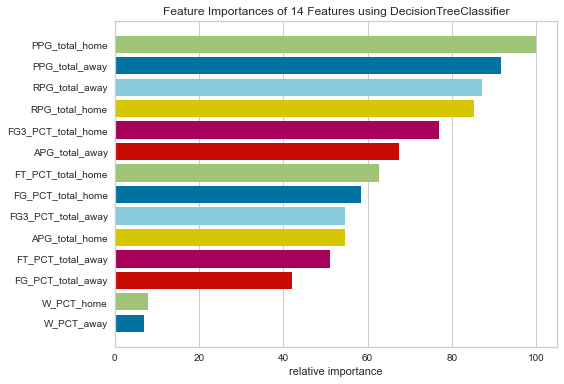

---------------------------------------------
i=13
FG3:

Best decision tree accuracy ({'max_depth': 6, 'criterion': 'gini'}): 0.52
              precision    recall  f1-score   support

           0       0.53      0.75      0.62       232
           1       0.52      0.29      0.37       219

    accuracy                           0.52       451
   macro avg       0.52      0.52      0.49       451
weighted avg       0.52      0.52      0.50       451



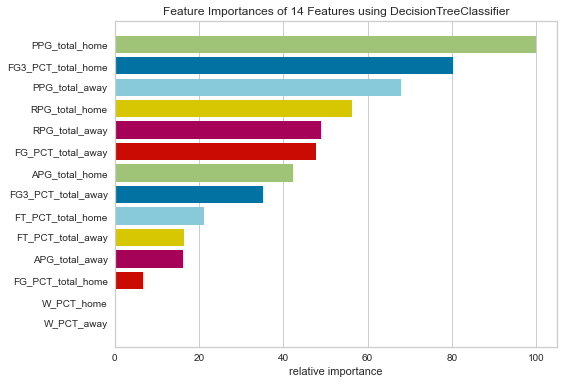

---------------------------------------------
i=14
FG3:

Best decision tree accuracy ({'max_depth': 10, 'criterion': 'gini'}): 0.58
              precision    recall  f1-score   support

           0       0.58      0.73      0.65       236
           1       0.58      0.41      0.48       214

    accuracy                           0.58       450
   macro avg       0.58      0.57      0.56       450
weighted avg       0.58      0.58      0.57       450



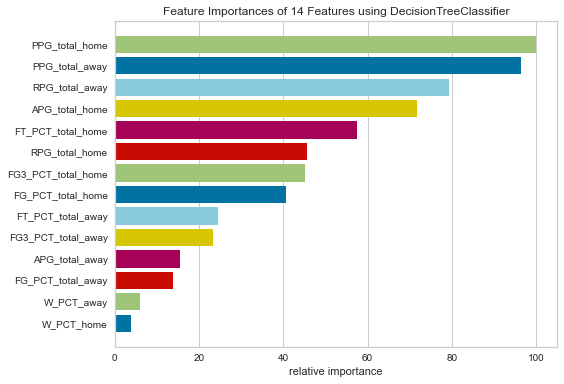

---------------------------------------------
Mean accuracy: 0.565410199556541
Max accuracy: 0.623059866962306
Min accuracy: 0.5232815964523282
i=15
FT:

Best decision tree accuracy ({'max_depth': 12, 'criterion': 'gini'}): 0.54
              precision    recall  f1-score   support

           0       0.53      0.49      0.51       208
           1       0.56      0.59      0.57       225

    accuracy                           0.54       433
   macro avg       0.54      0.54      0.54       433
weighted avg       0.54      0.54      0.54       433



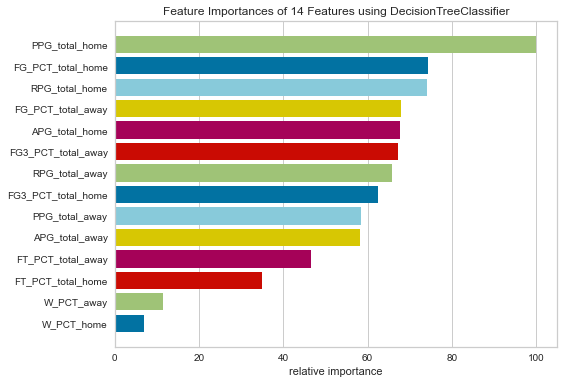

---------------------------------------------
i=16
FT:

Best decision tree accuracy ({'max_depth': 31, 'criterion': 'gini'}): 0.51
              precision    recall  f1-score   support

           0       0.51      0.50      0.51       218
           1       0.51      0.52      0.51       215

    accuracy                           0.51       433
   macro avg       0.51      0.51      0.51       433
weighted avg       0.51      0.51      0.51       433



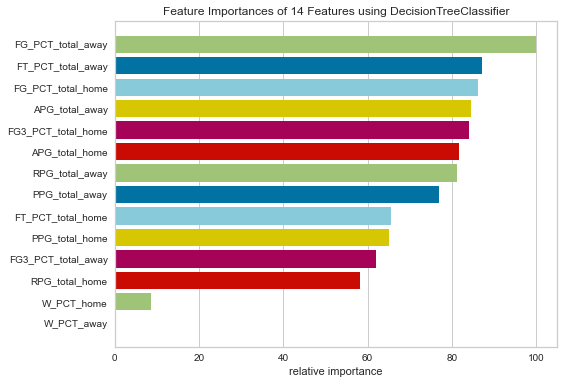

---------------------------------------------
i=17
FT:

Best decision tree accuracy ({'max_depth': 46, 'criterion': 'entropy'}): 0.58
              precision    recall  f1-score   support

           0       0.57      0.60      0.59       210
           1       0.60      0.57      0.58       223

    accuracy                           0.58       433
   macro avg       0.58      0.58      0.58       433
weighted avg       0.59      0.58      0.58       433



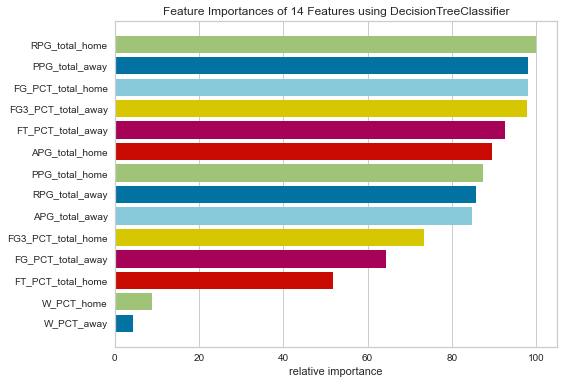

---------------------------------------------
i=18
FT:

Best decision tree accuracy ({'max_depth': 20, 'criterion': 'gini'}): 0.57
              precision    recall  f1-score   support

           0       0.55      0.56      0.56       209
           1       0.59      0.58      0.58       224

    accuracy                           0.57       433
   macro avg       0.57      0.57      0.57       433
weighted avg       0.57      0.57      0.57       433



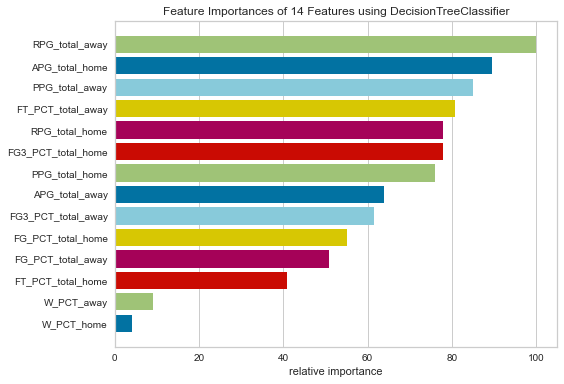

---------------------------------------------
i=19
FT:

Best decision tree accuracy ({'max_depth': 46, 'criterion': 'entropy'}): 0.55
              precision    recall  f1-score   support

           0       0.55      0.48      0.51       214
           1       0.54      0.61      0.58       219

    accuracy                           0.55       433
   macro avg       0.55      0.54      0.54       433
weighted avg       0.55      0.55      0.54       433



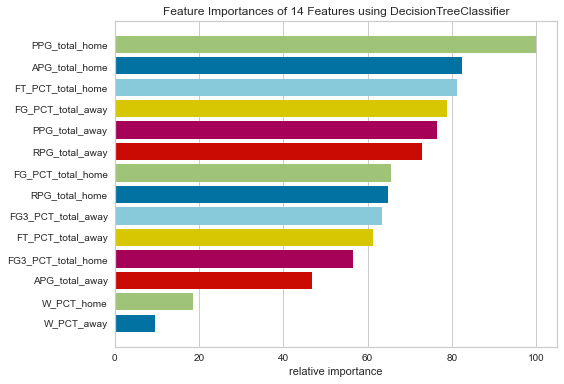

---------------------------------------------
Mean accuracy: 0.5519630484988453
Max accuracy: 0.5842956120092379
Min accuracy: 0.5103926096997691
i=20
AST:

Best decision tree accuracy ({'max_depth': 17, 'criterion': 'gini'}): 0.59
              precision    recall  f1-score   support

           0       0.63      0.73      0.68       384
           1       0.50      0.38      0.43       270

    accuracy                           0.59       654
   macro avg       0.56      0.56      0.55       654
weighted avg       0.57      0.59      0.57       654



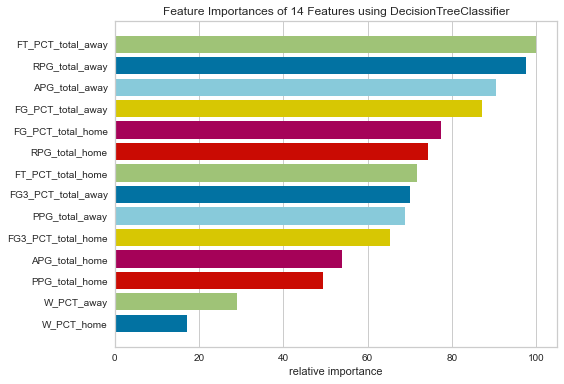

---------------------------------------------
i=21
AST:

Best decision tree accuracy ({'max_depth': 4, 'criterion': 'gini'}): 0.61
              precision    recall  f1-score   support

           0       0.63      0.86      0.72       394
           1       0.52      0.23      0.32       260

    accuracy                           0.61       654
   macro avg       0.57      0.54      0.52       654
weighted avg       0.58      0.61      0.56       654



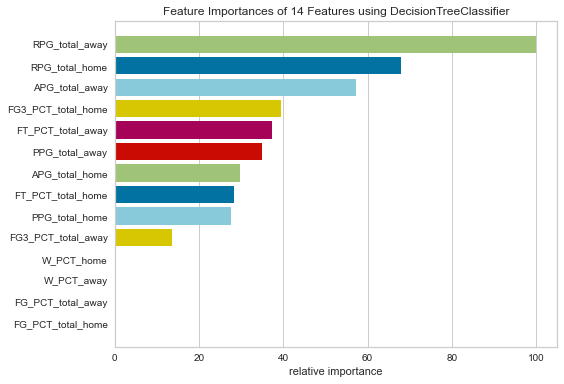

---------------------------------------------
i=22
AST:

Best decision tree accuracy ({'max_depth': 30, 'criterion': 'gini'}): 0.59
              precision    recall  f1-score   support

           0       0.66      0.67      0.67       393
           1       0.49      0.48      0.49       261

    accuracy                           0.59       654
   macro avg       0.58      0.58      0.58       654
weighted avg       0.59      0.59      0.59       654



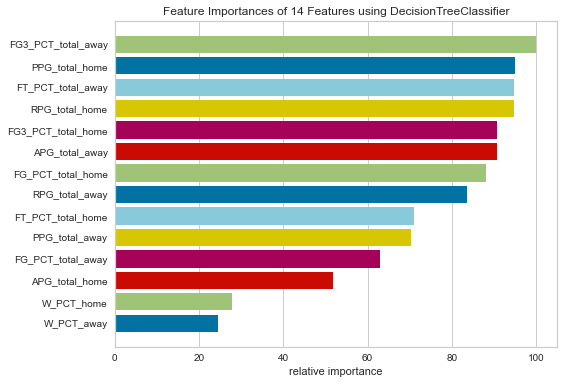

---------------------------------------------
i=23
AST:

Best decision tree accuracy ({'max_depth': 13, 'criterion': 'gini'}): 0.62
              precision    recall  f1-score   support

           0       0.67      0.76      0.71       399
           1       0.52      0.41      0.46       255

    accuracy                           0.62       654
   macro avg       0.59      0.58      0.58       654
weighted avg       0.61      0.62      0.61       654



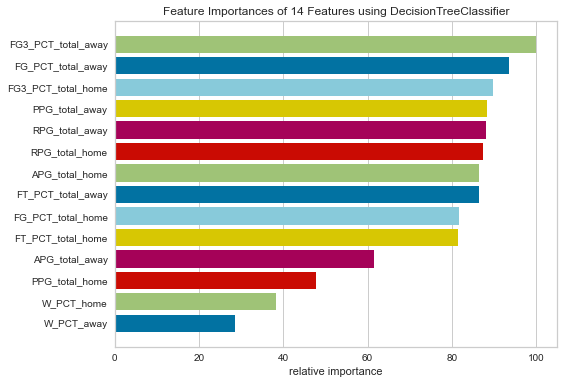

---------------------------------------------
i=24
AST:

Best decision tree accuracy ({'max_depth': 19, 'criterion': 'entropy'}): 0.60
              precision    recall  f1-score   support

           0       0.65      0.70      0.68       387
           1       0.51      0.46      0.49       266

    accuracy                           0.60       653
   macro avg       0.58      0.58      0.58       653
weighted avg       0.60      0.60      0.60       653



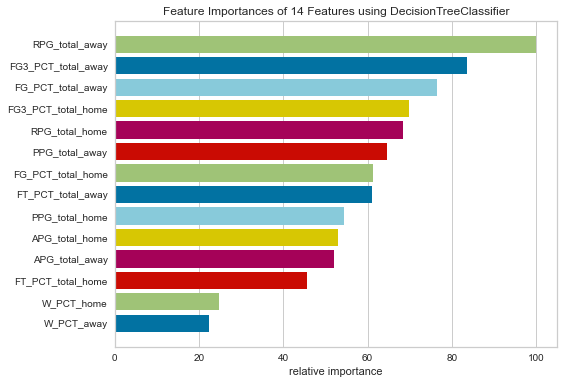

---------------------------------------------
Mean accuracy: 0.6032110091743119
Max accuracy: 0.6223241590214067
Min accuracy: 0.5871559633027523
i=25
REB:

Best decision tree accuracy ({'max_depth': 16, 'criterion': 'entropy'}): 0.58
              precision    recall  f1-score   support

           0       0.64      0.69      0.66       344
           1       0.49      0.42      0.45       238

    accuracy                           0.58       582
   macro avg       0.56      0.56      0.56       582
weighted avg       0.58      0.58      0.58       582



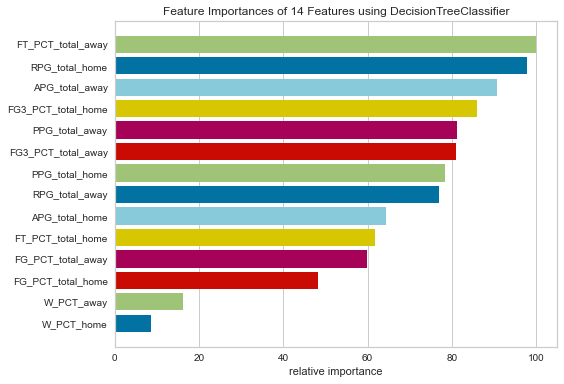

---------------------------------------------
i=26
REB:

Best decision tree accuracy ({'max_depth': 39, 'criterion': 'gini'}): 0.60
              precision    recall  f1-score   support

           0       0.65      0.65      0.65       334
           1       0.53      0.53      0.53       248

    accuracy                           0.60       582
   macro avg       0.59      0.59      0.59       582
weighted avg       0.60      0.60      0.60       582



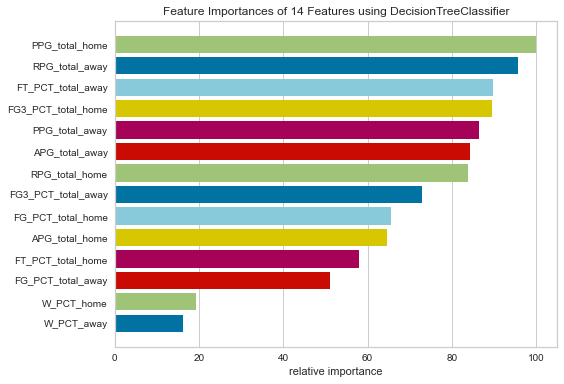

---------------------------------------------
i=27
REB:

Best decision tree accuracy ({'max_depth': 21, 'criterion': 'entropy'}): 0.59
              precision    recall  f1-score   support

           0       0.68      0.65      0.67       362
           1       0.46      0.49      0.47       220

    accuracy                           0.59       582
   macro avg       0.57      0.57      0.57       582
weighted avg       0.60      0.59      0.59       582



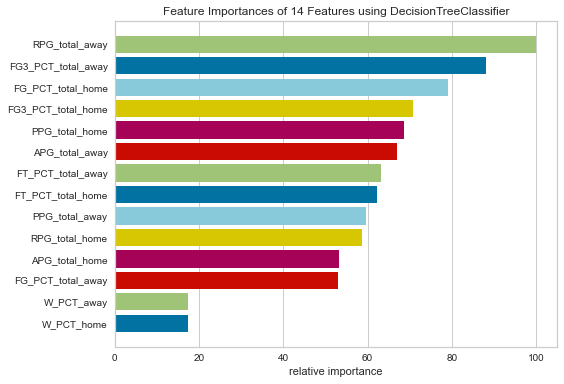

---------------------------------------------
i=28
REB:

Best decision tree accuracy ({'max_depth': 9, 'criterion': 'entropy'}): 0.55
              precision    recall  f1-score   support

           0       0.56      0.79      0.66       319
           1       0.50      0.25      0.34       263

    accuracy                           0.55       582
   macro avg       0.53      0.52      0.50       582
weighted avg       0.53      0.55      0.51       582



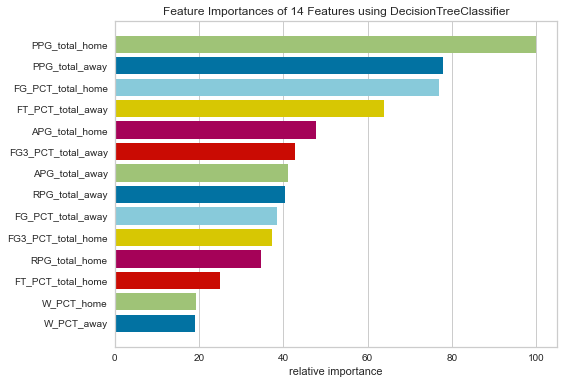

---------------------------------------------
i=29
REB:

Best decision tree accuracy ({'max_depth': 32, 'criterion': 'entropy'}): 0.57
              precision    recall  f1-score   support

           0       0.64      0.64      0.64       341
           1       0.49      0.49      0.49       240

    accuracy                           0.57       581
   macro avg       0.56      0.56      0.56       581
weighted avg       0.58      0.57      0.58       581



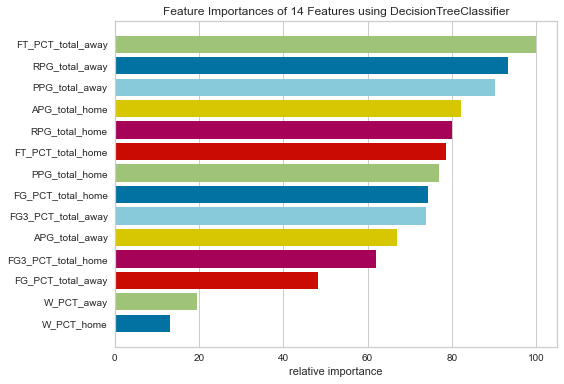

---------------------------------------------
Mean accuracy: 0.5798969072164948
Max accuracy: 0.5962199312714777
Min accuracy: 0.5481099656357389


In [30]:
print_cross_validated_and_plot(X_train_dicts, X_test_dicts, y_train_dicts, y_test_dicts, {
    'max_depth': [*range(4,60)],
    'criterion': ['gini', 'entropy'],
})

## Try prune impurity decrease

i=0
WINNER:

Best decision tree accuracy ({'min_impurity_decrease': 0.9, 'criterion': 'gini'}): 0.66
              precision    recall  f1-score   support

           0       0.66      1.00      0.79       633
           1       0.00      0.00      0.00       333

    accuracy                           0.66       966
   macro avg       0.33      0.50      0.40       966
weighted avg       0.43      0.66      0.52       966



c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

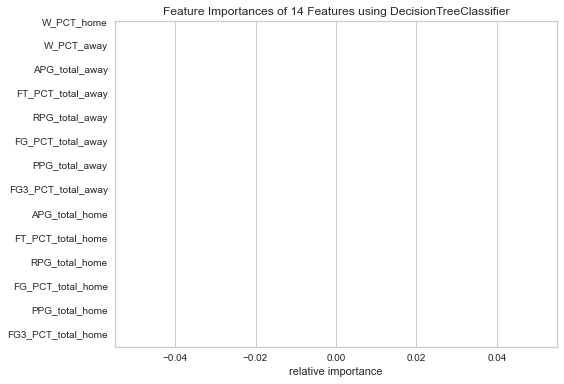

---------------------------------------------
i=1
WINNER:

Best decision tree accuracy ({'min_impurity_decrease': 0.5, 'criterion': 'gini'}): 0.65
              precision    recall  f1-score   support

           0       0.65      1.00      0.79       627
           1       0.00      0.00      0.00       338

    accuracy                           0.65       965
   macro avg       0.32      0.50      0.39       965
weighted avg       0.42      0.65      0.51       965



c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

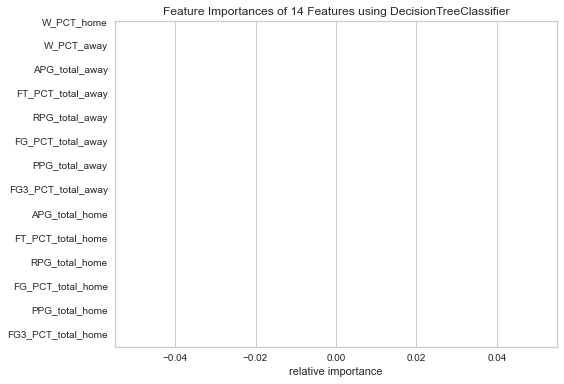

---------------------------------------------
i=2
WINNER:

Best decision tree accuracy ({'min_impurity_decrease': 0.25, 'criterion': 'gini'}): 0.63
              precision    recall  f1-score   support

           0       0.63      1.00      0.77       604
           1       0.00      0.00      0.00       361

    accuracy                           0.63       965
   macro avg       0.31      0.50      0.38       965
weighted avg       0.39      0.63      0.48       965



c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

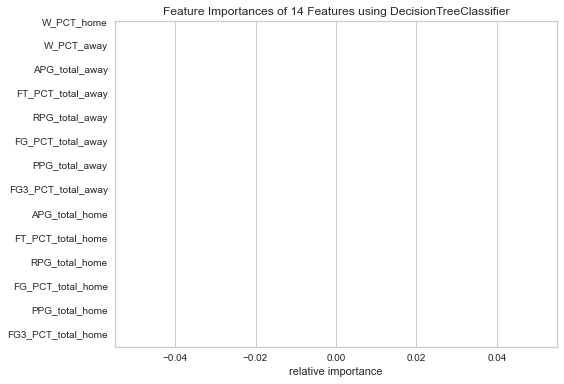

---------------------------------------------
i=3
WINNER:

Best decision tree accuracy ({'min_impurity_decrease': 0.55, 'criterion': 'entropy'}): 0.68
              precision    recall  f1-score   support

           0       0.68      1.00      0.81       653
           1       0.00      0.00      0.00       312

    accuracy                           0.68       965
   macro avg       0.34      0.50      0.40       965
weighted avg       0.46      0.68      0.55       965



c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

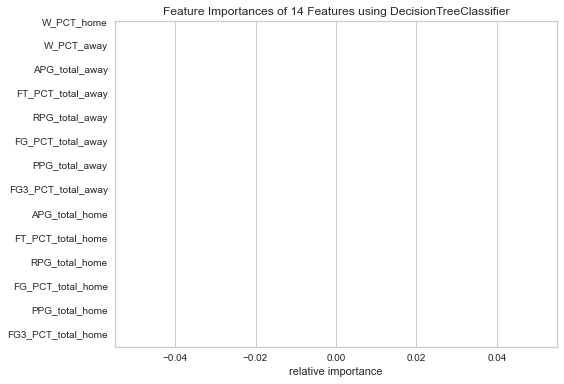

---------------------------------------------
i=4
WINNER:

Best decision tree accuracy ({'min_impurity_decrease': 0.25, 'criterion': 'entropy'}): 0.62
              precision    recall  f1-score   support

           0       0.62      1.00      0.76       596
           1       0.00      0.00      0.00       369

    accuracy                           0.62       965
   macro avg       0.31      0.50      0.38       965
weighted avg       0.38      0.62      0.47       965



c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

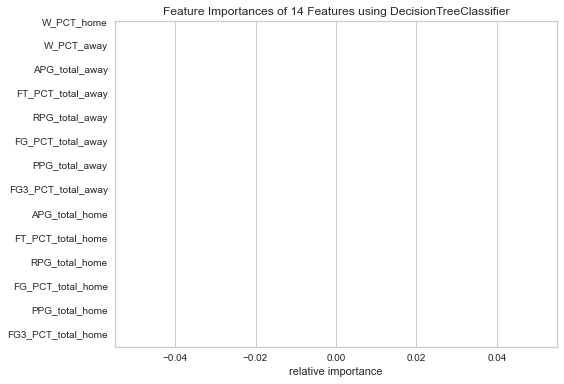

---------------------------------------------
Mean accuracy: 0.6519027773308016
Max accuracy: 0.6766839378238342
Min accuracy: 0.6259067357512953
i=5
FGP:

Best decision tree accuracy ({'min_impurity_decrease': 0.85, 'criterion': 'entropy'}): 0.61
              precision    recall  f1-score   support

           0       0.61      1.00      0.76       420
           1       0.00      0.00      0.00       269

    accuracy                           0.61       689
   macro avg       0.30      0.50      0.38       689
weighted avg       0.37      0.61      0.46       689



c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

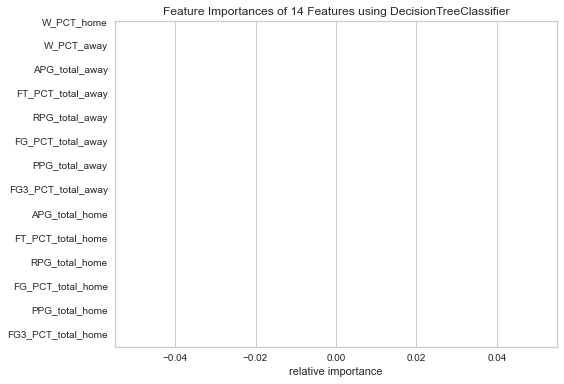

---------------------------------------------
i=6
FGP:

Best decision tree accuracy ({'min_impurity_decrease': 0.8, 'criterion': 'entropy'}): 0.60
              precision    recall  f1-score   support

           0       0.60      1.00      0.75       410
           1       0.00      0.00      0.00       279

    accuracy                           0.60       689
   macro avg       0.30      0.50      0.37       689
weighted avg       0.35      0.60      0.44       689



c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

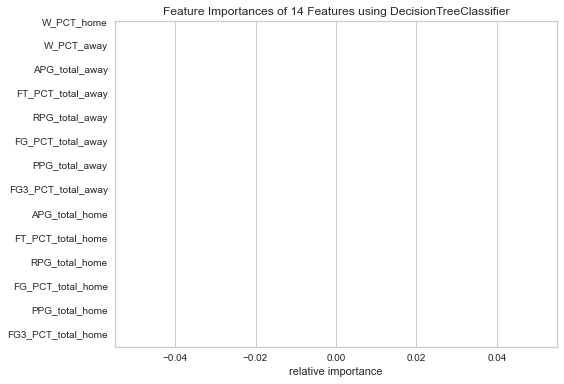

---------------------------------------------
i=7
FGP:

Best decision tree accuracy ({'min_impurity_decrease': 0.8, 'criterion': 'entropy'}): 0.59
              precision    recall  f1-score   support

           0       0.59      1.00      0.74       407
           1       0.00      0.00      0.00       282

    accuracy                           0.59       689
   macro avg       0.30      0.50      0.37       689
weighted avg       0.35      0.59      0.44       689



c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

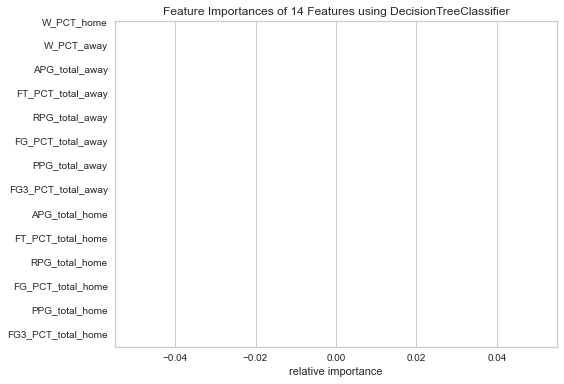

---------------------------------------------
i=8
FGP:

Best decision tree accuracy ({'min_impurity_decrease': 0.3, 'criterion': 'entropy'}): 0.61
              precision    recall  f1-score   support

           0       0.61      1.00      0.76       423
           1       0.00      0.00      0.00       265

    accuracy                           0.61       688
   macro avg       0.31      0.50      0.38       688
weighted avg       0.38      0.61      0.47       688



c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

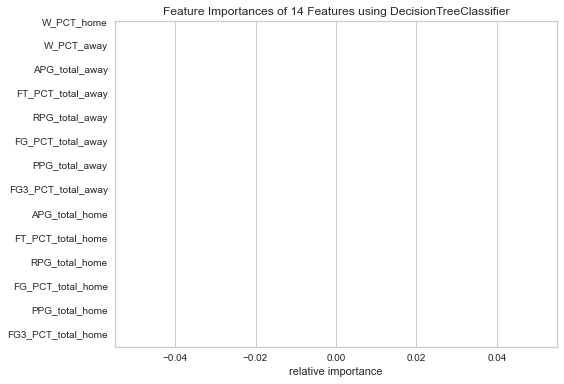

---------------------------------------------
i=9
FGP:

Best decision tree accuracy ({'min_impurity_decrease': 0.35, 'criterion': 'entropy'}): 0.59
              precision    recall  f1-score   support

           0       0.59      1.00      0.75       409
           1       0.00      0.00      0.00       279

    accuracy                           0.59       688
   macro avg       0.30      0.50      0.37       688
weighted avg       0.35      0.59      0.44       688



c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

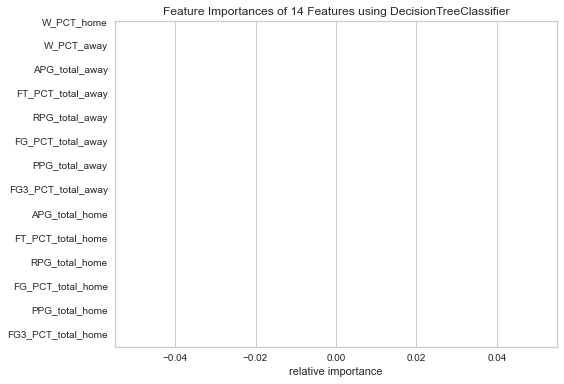

---------------------------------------------
Mean accuracy: 0.6025452923009417
Max accuracy: 0.6148255813953488
Min accuracy: 0.590711175616836
i=10
FG3:

Best decision tree accuracy ({'min_impurity_decrease': 0.0, 'criterion': 'gini'}): 0.56
              precision    recall  f1-score   support

           0       0.58      0.60      0.59       235
           1       0.54      0.52      0.53       216

    accuracy                           0.56       451
   macro avg       0.56      0.56      0.56       451
weighted avg       0.56      0.56      0.56       451



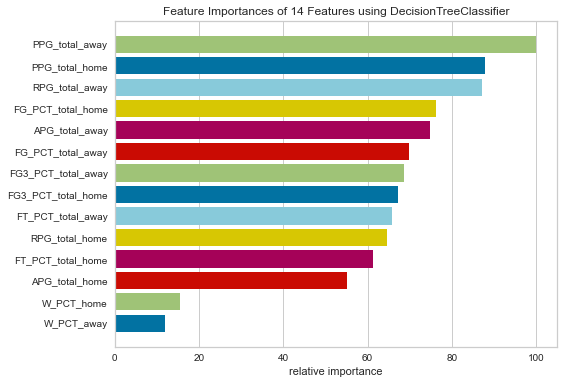

---------------------------------------------
i=11
FG3:

Best decision tree accuracy ({'min_impurity_decrease': 0.8, 'criterion': 'entropy'}): 0.55
              precision    recall  f1-score   support

           0       0.55      1.00      0.71       247
           1       0.00      0.00      0.00       204

    accuracy                           0.55       451
   macro avg       0.27      0.50      0.35       451
weighted avg       0.30      0.55      0.39       451



c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

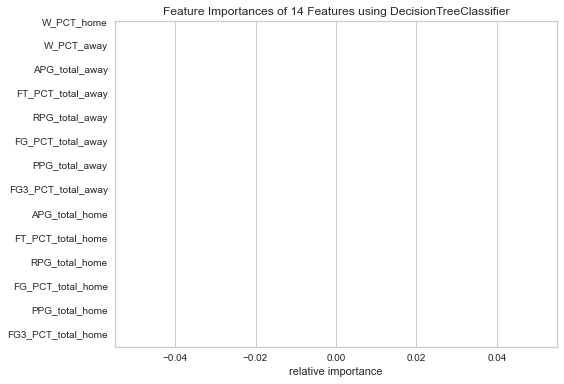

---------------------------------------------
i=12
FG3:

Best decision tree accuracy ({'min_impurity_decrease': 0.0, 'criterion': 'entropy'}): 0.59
              precision    recall  f1-score   support

           0       0.61      0.61      0.61       238
           1       0.57      0.57      0.57       213

    accuracy                           0.59       451
   macro avg       0.59      0.59      0.59       451
weighted avg       0.59      0.59      0.59       451



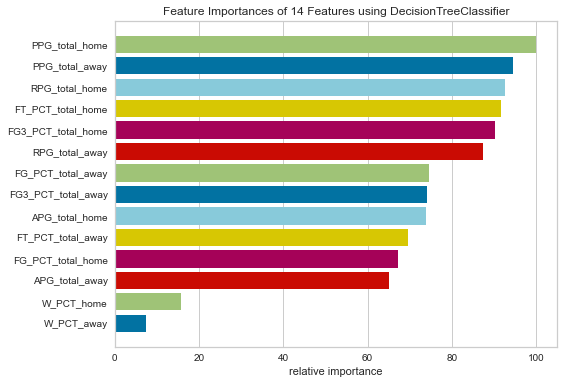

---------------------------------------------
i=13
FG3:

Best decision tree accuracy ({'min_impurity_decrease': 0.35, 'criterion': 'entropy'}): 0.51
              precision    recall  f1-score   support

           0       0.51      1.00      0.68       232
           1       0.00      0.00      0.00       219

    accuracy                           0.51       451
   macro avg       0.26      0.50      0.34       451
weighted avg       0.26      0.51      0.35       451



c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

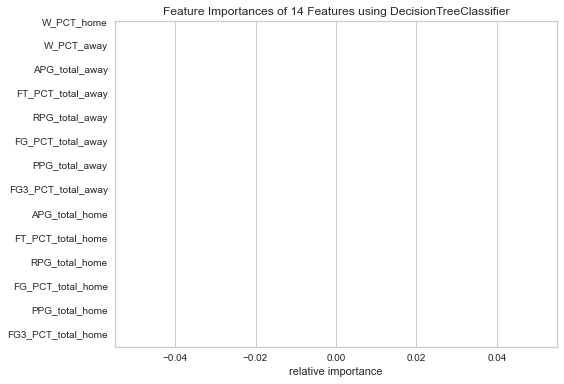

---------------------------------------------
i=14
FG3:

Best decision tree accuracy ({'min_impurity_decrease': 0.3, 'criterion': 'gini'}): 0.52
              precision    recall  f1-score   support

           0       0.52      1.00      0.69       236
           1       0.00      0.00      0.00       214

    accuracy                           0.52       450
   macro avg       0.26      0.50      0.34       450
weighted avg       0.28      0.52      0.36       450



c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

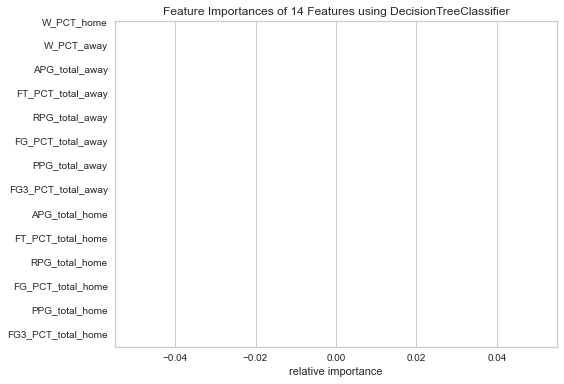

---------------------------------------------
Mean accuracy: 0.553769401330377
Max accuracy: 0.5920177383592018
Min accuracy: 0.5144124168514412
i=15
FT:

Best decision tree accuracy ({'min_impurity_decrease': 0.0, 'criterion': 'gini'}): 0.53
              precision    recall  f1-score   support

           0       0.51      0.50      0.51       208
           1       0.55      0.56      0.55       225

    accuracy                           0.53       433
   macro avg       0.53      0.53      0.53       433
weighted avg       0.53      0.53      0.53       433



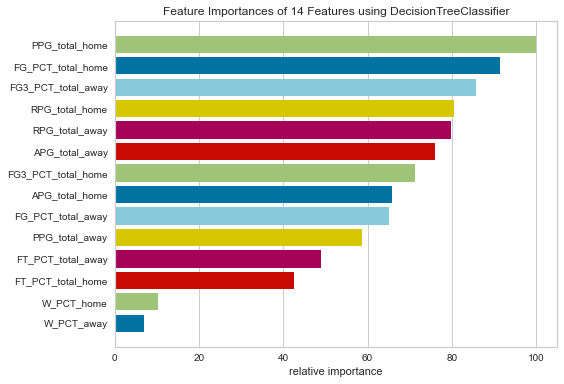

---------------------------------------------
i=16
FT:

Best decision tree accuracy ({'min_impurity_decrease': 0.25, 'criterion': 'entropy'}): 0.50
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       218
           1       0.50      1.00      0.66       215

    accuracy                           0.50       433
   macro avg       0.25      0.50      0.33       433
weighted avg       0.25      0.50      0.33       433



c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

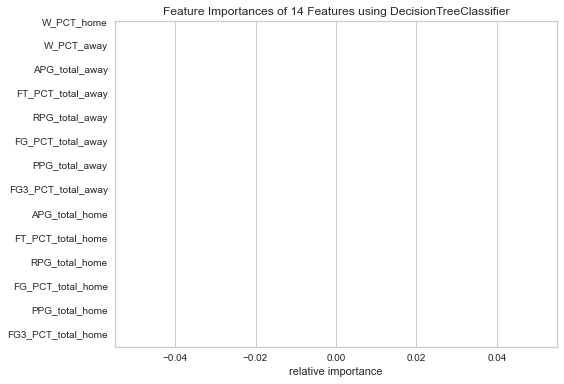

---------------------------------------------
i=17
FT:

Best decision tree accuracy ({'min_impurity_decrease': 0.6, 'criterion': 'gini'}): 0.52
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       210
           1       0.52      1.00      0.68       223

    accuracy                           0.52       433
   macro avg       0.26      0.50      0.34       433
weighted avg       0.27      0.52      0.35       433



c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

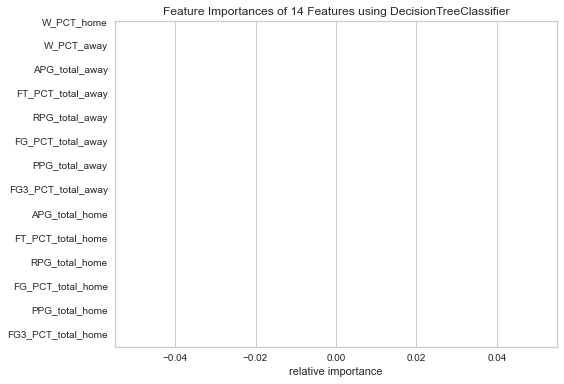

---------------------------------------------
i=18
FT:

Best decision tree accuracy ({'min_impurity_decrease': 0.0, 'criterion': 'entropy'}): 0.59
              precision    recall  f1-score   support

           0       0.58      0.54      0.56       209
           1       0.59      0.63      0.61       224

    accuracy                           0.59       433
   macro avg       0.59      0.59      0.58       433
weighted avg       0.59      0.59      0.59       433



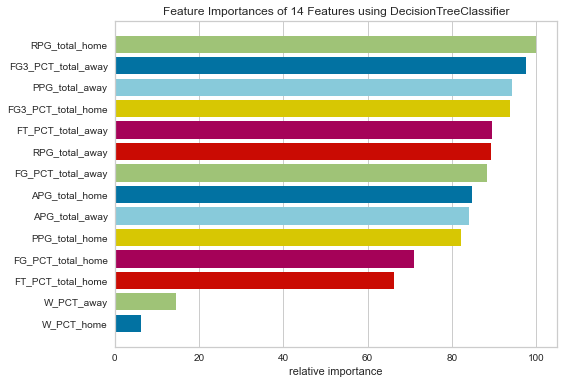

---------------------------------------------
i=19
FT:

Best decision tree accuracy ({'min_impurity_decrease': 0.0, 'criterion': 'entropy'}): 0.55
              precision    recall  f1-score   support

           0       0.55      0.48      0.51       214
           1       0.54      0.61      0.58       219

    accuracy                           0.55       433
   macro avg       0.55      0.54      0.54       433
weighted avg       0.55      0.55      0.54       433



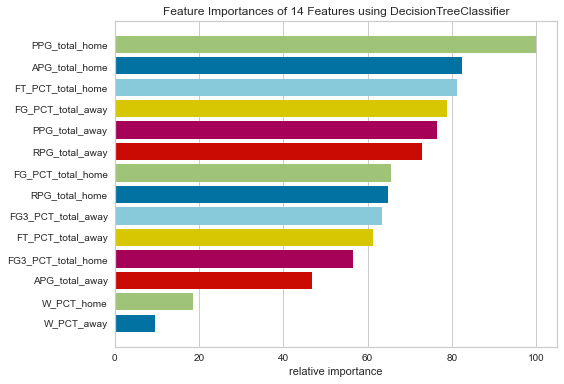

---------------------------------------------
Mean accuracy: 0.5323325635103926
Max accuracy: 0.5866050808314087
Min accuracy: 0.49653579676674364
i=20
AST:

Best decision tree accuracy ({'min_impurity_decrease': 0.05, 'criterion': 'gini'}): 0.59
              precision    recall  f1-score   support

           0       0.59      1.00      0.74       384
           1       0.00      0.00      0.00       270

    accuracy                           0.59       654
   macro avg       0.29      0.50      0.37       654
weighted avg       0.34      0.59      0.43       654



c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

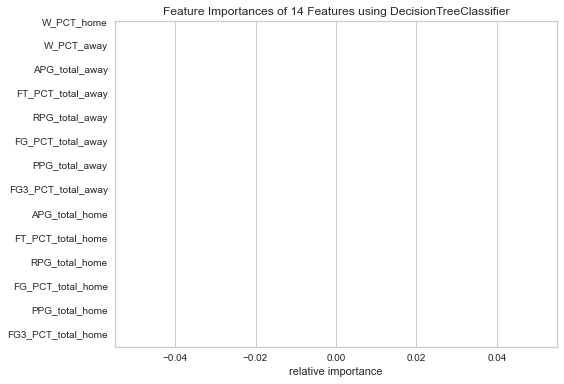

---------------------------------------------
i=21
AST:

Best decision tree accuracy ({'min_impurity_decrease': 0.95, 'criterion': 'entropy'}): 0.60
              precision    recall  f1-score   support

           0       0.60      1.00      0.75       394
           1       0.00      0.00      0.00       260

    accuracy                           0.60       654
   macro avg       0.30      0.50      0.38       654
weighted avg       0.36      0.60      0.45       654



c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

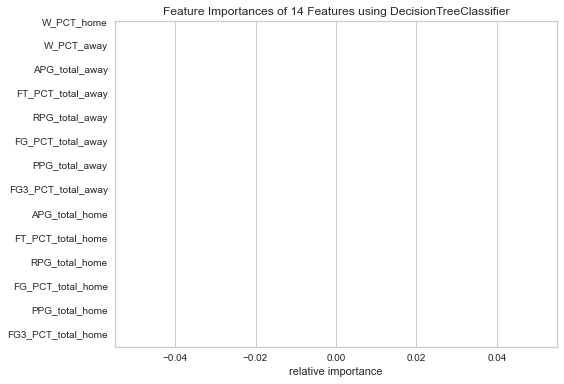

---------------------------------------------
i=22
AST:

Best decision tree accuracy ({'min_impurity_decrease': 0.15, 'criterion': 'entropy'}): 0.60
              precision    recall  f1-score   support

           0       0.60      1.00      0.75       393
           1       0.00      0.00      0.00       261

    accuracy                           0.60       654
   macro avg       0.30      0.50      0.38       654
weighted avg       0.36      0.60      0.45       654



c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

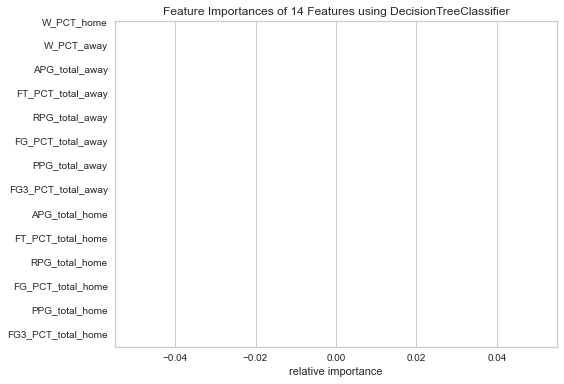

---------------------------------------------
i=23
AST:

Best decision tree accuracy ({'min_impurity_decrease': 0.7, 'criterion': 'gini'}): 0.61
              precision    recall  f1-score   support

           0       0.61      1.00      0.76       399
           1       0.00      0.00      0.00       255

    accuracy                           0.61       654
   macro avg       0.31      0.50      0.38       654
weighted avg       0.37      0.61      0.46       654



c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

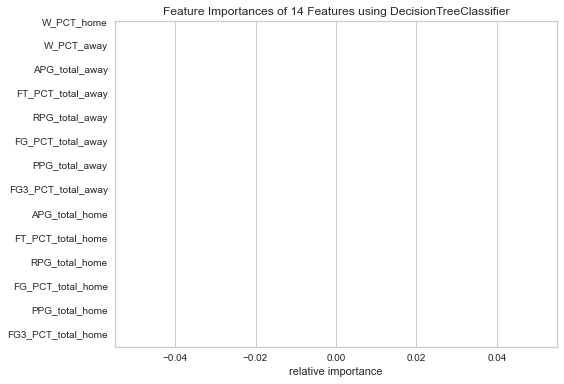

---------------------------------------------
i=24
AST:

Best decision tree accuracy ({'min_impurity_decrease': 0.3, 'criterion': 'entropy'}): 0.59
              precision    recall  f1-score   support

           0       0.59      1.00      0.74       387
           1       0.00      0.00      0.00       266

    accuracy                           0.59       653
   macro avg       0.30      0.50      0.37       653
weighted avg       0.35      0.59      0.44       653



c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

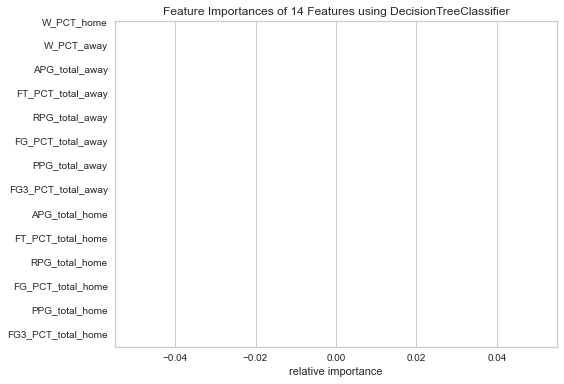

---------------------------------------------
Mean accuracy: 0.6001529051987768
Max accuracy: 0.6100917431192661
Min accuracy: 0.5871559633027523
i=25
REB:

Best decision tree accuracy ({'min_impurity_decrease': 0.85, 'criterion': 'gini'}): 0.59
              precision    recall  f1-score   support

           0       0.59      1.00      0.74       344
           1       0.00      0.00      0.00       238

    accuracy                           0.59       582
   macro avg       0.30      0.50      0.37       582
weighted avg       0.35      0.59      0.44       582



c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

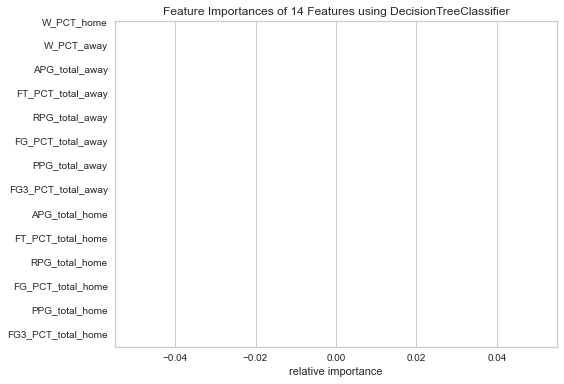

---------------------------------------------
i=26
REB:

Best decision tree accuracy ({'min_impurity_decrease': 0.85, 'criterion': 'entropy'}): 0.57
              precision    recall  f1-score   support

           0       0.57      1.00      0.73       334
           1       0.00      0.00      0.00       248

    accuracy                           0.57       582
   macro avg       0.29      0.50      0.36       582
weighted avg       0.33      0.57      0.42       582



c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

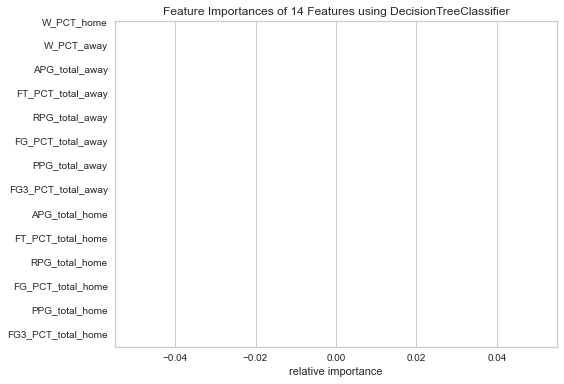

---------------------------------------------
i=27
REB:

Best decision tree accuracy ({'min_impurity_decrease': 0.95, 'criterion': 'entropy'}): 0.62
              precision    recall  f1-score   support

           0       0.62      1.00      0.77       362
           1       0.00      0.00      0.00       220

    accuracy                           0.62       582
   macro avg       0.31      0.50      0.38       582
weighted avg       0.39      0.62      0.48       582



c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

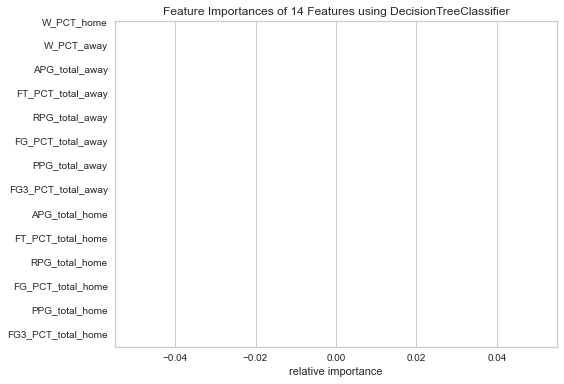

---------------------------------------------
i=28
REB:

Best decision tree accuracy ({'min_impurity_decrease': 0.6, 'criterion': 'entropy'}): 0.55
              precision    recall  f1-score   support

           0       0.55      1.00      0.71       319
           1       0.00      0.00      0.00       263

    accuracy                           0.55       582
   macro avg       0.27      0.50      0.35       582
weighted avg       0.30      0.55      0.39       582



c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

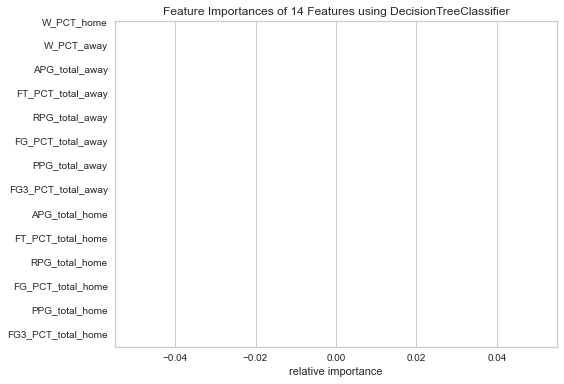

---------------------------------------------
i=29
REB:

Best decision tree accuracy ({'min_impurity_decrease': 0.3, 'criterion': 'gini'}): 0.59
              precision    recall  f1-score   support

           0       0.59      1.00      0.74       341
           1       0.00      0.00      0.00       240

    accuracy                           0.59       581
   macro avg       0.29      0.50      0.37       581
weighted avg       0.34      0.59      0.43       581



c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

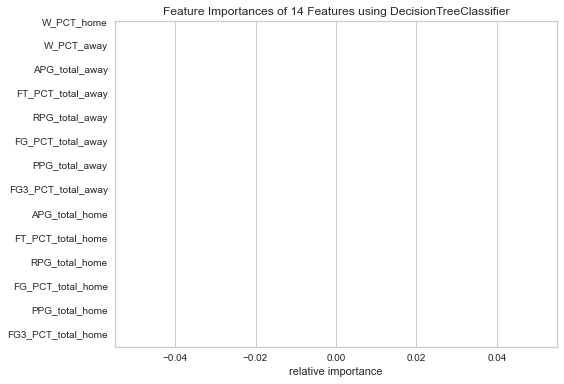

---------------------------------------------
Mean accuracy: 0.5837628865979381
Max accuracy: 0.6219931271477663
Min accuracy: 0.5481099656357389


In [31]:
# print_all_metrics_and_plot(
#     DecisionTreeClassifier(random_state=0),
#     X_train_dict,
#     X_test_dict,
#     {
#         'min_impurity_decrease': [0.0,0.01],
#         'criterion': ['gini', 'entropy'],
#     },
# )
print_cross_validated_and_plot(X_train_dicts, X_test_dicts, y_train_dicts, y_test_dicts, {
    'min_impurity_decrease': [0.0,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95],
    'criterion': ['gini', 'entropy'],
})
# print('Any non-zero min_impurity_decrease causes all classifications to be 1')

## Try prune max leaves

i=0
WINNER:

Best decision tree accuracy ({'max_leaf_nodes': 1042, 'criterion': 'gini'}): 0.65
              precision    recall  f1-score   support

           0       0.73      0.74      0.73       633
           1       0.49      0.48      0.48       333

    accuracy                           0.65       966
   macro avg       0.61      0.61      0.61       966
weighted avg       0.65      0.65      0.65       966



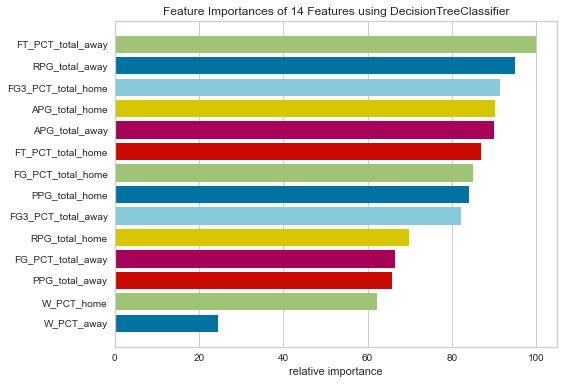

---------------------------------------------
i=1
WINNER:

Best decision tree accuracy ({'max_leaf_nodes': 844, 'criterion': 'gini'}): 0.64
              precision    recall  f1-score   support

           0       0.72      0.74      0.73       627
           1       0.49      0.47      0.48       338

    accuracy                           0.64       965
   macro avg       0.61      0.60      0.60       965
weighted avg       0.64      0.64      0.64       965



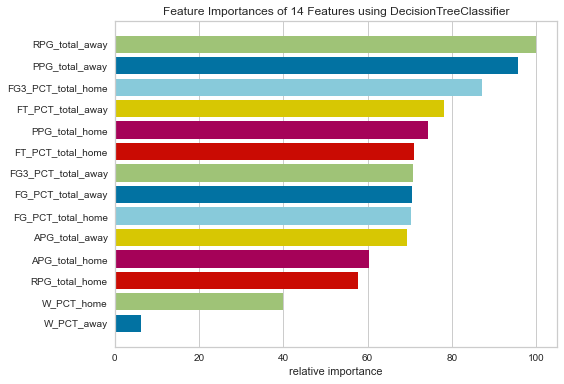

---------------------------------------------
i=2
WINNER:

Best decision tree accuracy ({'max_leaf_nodes': 526, 'criterion': 'gini'}): 0.66
              precision    recall  f1-score   support

           0       0.71      0.77      0.74       604
           1       0.56      0.48      0.52       361

    accuracy                           0.66       965
   macro avg       0.63      0.63      0.63       965
weighted avg       0.65      0.66      0.66       965



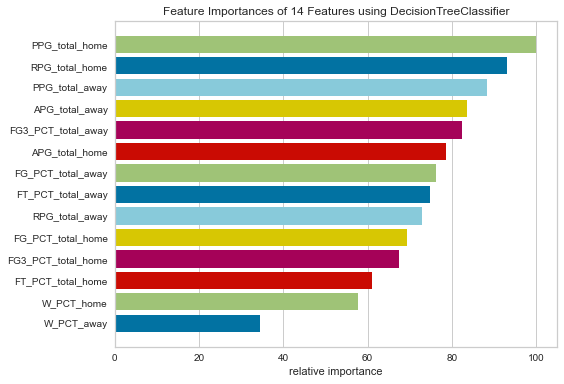

---------------------------------------------
i=3
WINNER:

Best decision tree accuracy ({'max_leaf_nodes': 1022, 'criterion': 'entropy'}): 0.66
              precision    recall  f1-score   support

           0       0.75      0.75      0.75       653
           1       0.48      0.48      0.48       312

    accuracy                           0.66       965
   macro avg       0.62      0.62      0.62       965
weighted avg       0.66      0.66      0.66       965



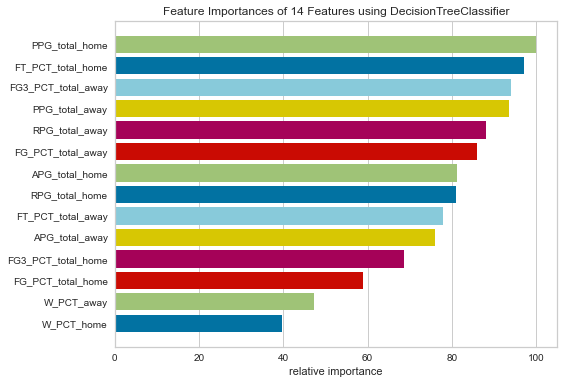

---------------------------------------------
i=4
WINNER:

Best decision tree accuracy ({'max_leaf_nodes': 230, 'criterion': 'gini'}): 0.66
              precision    recall  f1-score   support

           0       0.69      0.81      0.75       596
           1       0.58      0.42      0.49       369

    accuracy                           0.66       965
   macro avg       0.64      0.62      0.62       965
weighted avg       0.65      0.66      0.65       965



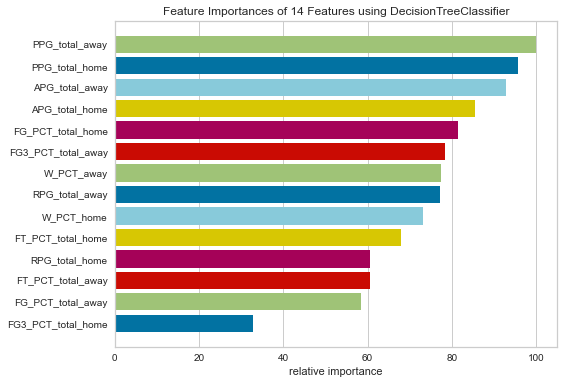

---------------------------------------------
Mean accuracy: 0.6542365290337807
Max accuracy: 0.6632124352331606
Min accuracy: 0.644559585492228
i=5
FGP:

Best decision tree accuracy ({'max_leaf_nodes': 1054, 'criterion': 'entropy'}): 0.61
              precision    recall  f1-score   support

           0       0.68      0.66      0.67       420
           1       0.50      0.52      0.51       269

    accuracy                           0.61       689
   macro avg       0.59      0.59      0.59       689
weighted avg       0.61      0.61      0.61       689



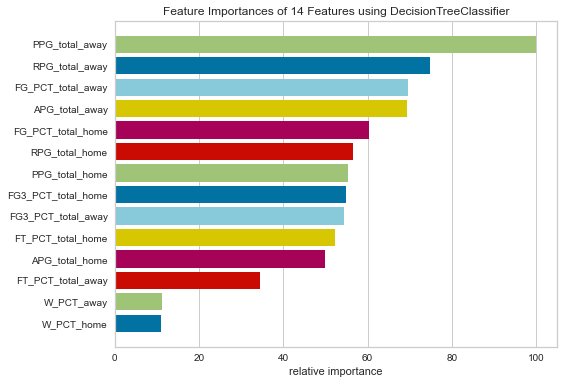

---------------------------------------------
i=6
FGP:

Best decision tree accuracy ({'max_leaf_nodes': 384, 'criterion': 'entropy'}): 0.59
              precision    recall  f1-score   support

           0       0.66      0.65      0.65       410
           1       0.50      0.51      0.50       279

    accuracy                           0.59       689
   macro avg       0.58      0.58      0.58       689
weighted avg       0.59      0.59      0.59       689



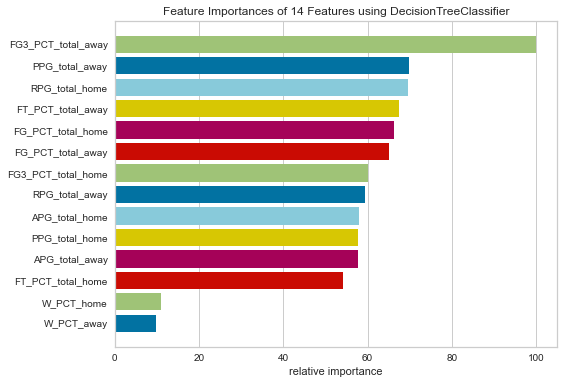

---------------------------------------------
i=7
FGP:

Best decision tree accuracy ({'max_leaf_nodes': 276, 'criterion': 'gini'}): 0.61
              precision    recall  f1-score   support

           0       0.66      0.69      0.68       407
           1       0.52      0.49      0.51       282

    accuracy                           0.61       689
   macro avg       0.59      0.59      0.59       689
weighted avg       0.61      0.61      0.61       689



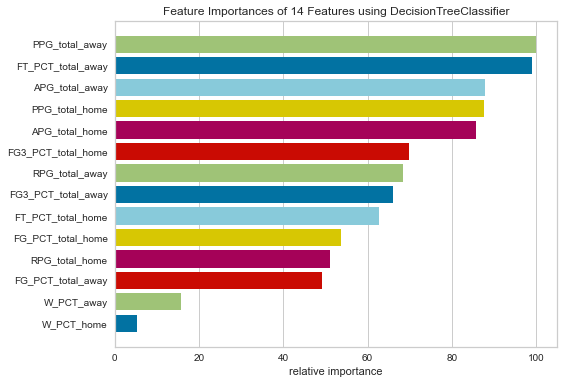

---------------------------------------------
i=8
FGP:

Best decision tree accuracy ({'max_leaf_nodes': 168, 'criterion': 'entropy'}): 0.61
              precision    recall  f1-score   support

           0       0.65      0.79      0.71       423
           1       0.49      0.33      0.40       265

    accuracy                           0.61       688
   macro avg       0.57      0.56      0.56       688
weighted avg       0.59      0.61      0.59       688



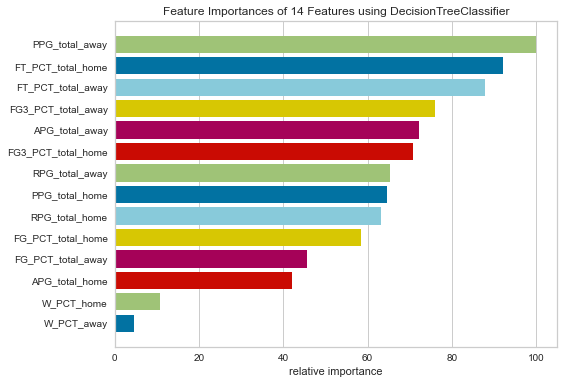

---------------------------------------------
i=9
FGP:

Best decision tree accuracy ({'max_leaf_nodes': 246, 'criterion': 'gini'}): 0.62
              precision    recall  f1-score   support

           0       0.68      0.68      0.68       409
           1       0.54      0.54      0.54       279

    accuracy                           0.62       688
   macro avg       0.61      0.61      0.61       688
weighted avg       0.62      0.62      0.62       688



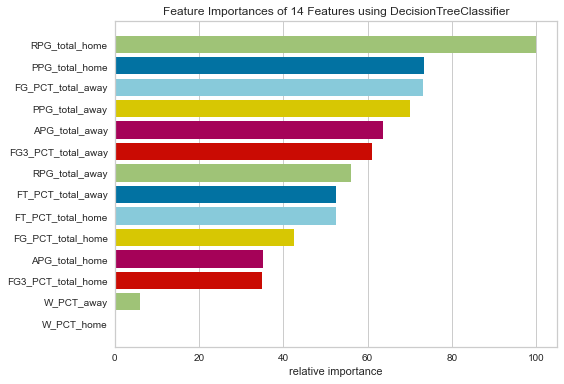

---------------------------------------------
Mean accuracy: 0.6054469951395687
Max accuracy: 0.6119186046511628
Min accuracy: 0.5921625544267054
i=10
FG3:

Best decision tree accuracy ({'max_leaf_nodes': 294, 'criterion': 'gini'}): 0.57
              precision    recall  f1-score   support

           0       0.58      0.60      0.59       235
           1       0.55      0.53      0.54       216

    accuracy                           0.57       451
   macro avg       0.56      0.56      0.56       451
weighted avg       0.56      0.57      0.56       451



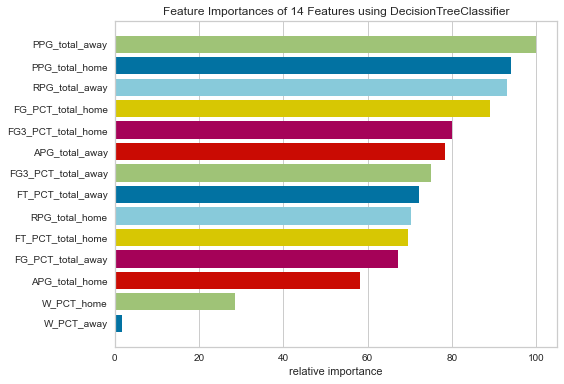

---------------------------------------------
i=11
FG3:

Best decision tree accuracy ({'max_leaf_nodes': 884, 'criterion': 'gini'}): 0.58
              precision    recall  f1-score   support

           0       0.61      0.62      0.61       247
           1       0.53      0.53      0.53       204

    accuracy                           0.58       451
   macro avg       0.57      0.57      0.57       451
weighted avg       0.58      0.58      0.58       451



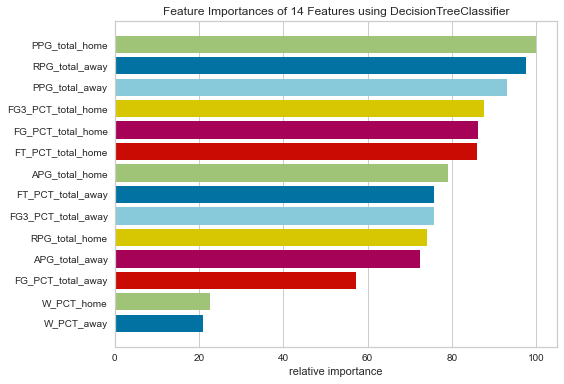

---------------------------------------------
i=12
FG3:

Best decision tree accuracy ({'max_leaf_nodes': 218, 'criterion': 'entropy'}): 0.58
              precision    recall  f1-score   support

           0       0.60      0.60      0.60       238
           1       0.55      0.56      0.56       213

    accuracy                           0.58       451
   macro avg       0.58      0.58      0.58       451
weighted avg       0.58      0.58      0.58       451



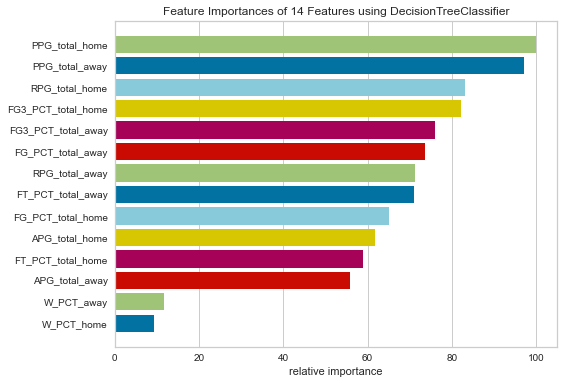

---------------------------------------------
i=13
FG3:

Best decision tree accuracy ({'max_leaf_nodes': 1470, 'criterion': 'entropy'}): 0.57
              precision    recall  f1-score   support

           0       0.59      0.55      0.57       232
           1       0.55      0.59      0.57       219

    accuracy                           0.57       451
   macro avg       0.57      0.57      0.57       451
weighted avg       0.57      0.57      0.57       451



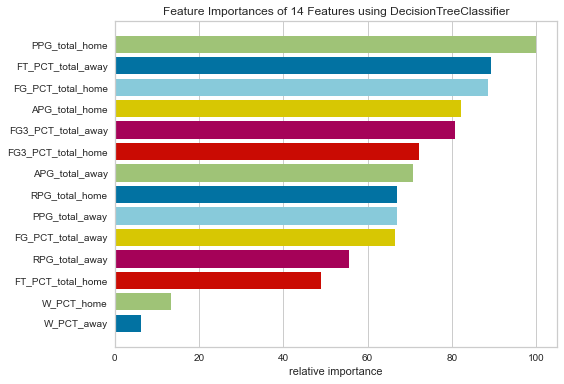

---------------------------------------------
i=14
FG3:

Best decision tree accuracy ({'max_leaf_nodes': 490, 'criterion': 'gini'}): 0.56
              precision    recall  f1-score   support

           0       0.57      0.61      0.59       236
           1       0.54      0.50      0.52       214

    accuracy                           0.56       450
   macro avg       0.56      0.56      0.55       450
weighted avg       0.56      0.56      0.56       450



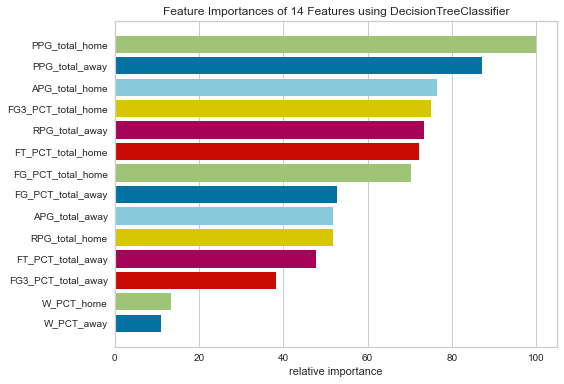

---------------------------------------------
Mean accuracy: 0.5726164079822617
Max accuracy: 0.5787139689578714
Min accuracy: 0.565410199556541
i=15
FT:

Best decision tree accuracy ({'max_leaf_nodes': 216, 'criterion': 'entropy'}): 0.52
              precision    recall  f1-score   support

           0       0.51      0.48      0.49       208
           1       0.54      0.57      0.55       225

    accuracy                           0.52       433
   macro avg       0.52      0.52      0.52       433
weighted avg       0.52      0.52      0.52       433



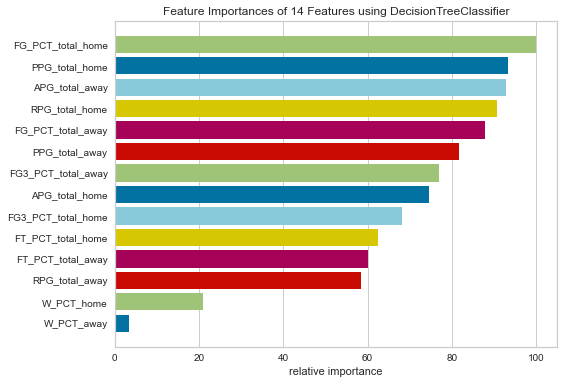

---------------------------------------------
i=16
FT:

Best decision tree accuracy ({'max_leaf_nodes': 194, 'criterion': 'gini'}): 0.54
              precision    recall  f1-score   support

           0       0.54      0.56      0.55       218
           1       0.54      0.52      0.53       215

    accuracy                           0.54       433
   macro avg       0.54      0.54      0.54       433
weighted avg       0.54      0.54      0.54       433



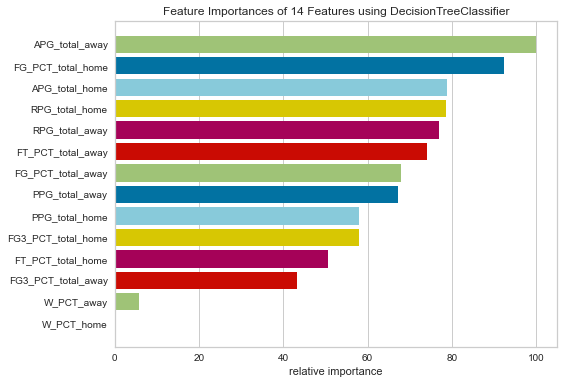

---------------------------------------------
i=17
FT:

Best decision tree accuracy ({'max_leaf_nodes': 274, 'criterion': 'gini'}): 0.56
              precision    recall  f1-score   support

           0       0.54      0.53      0.54       210
           1       0.57      0.58      0.57       223

    accuracy                           0.56       433
   macro avg       0.56      0.56      0.56       433
weighted avg       0.56      0.56      0.56       433



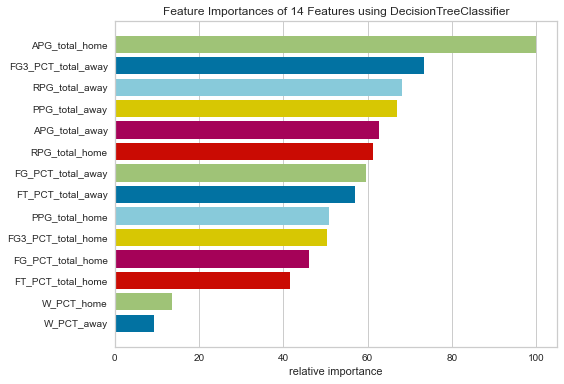

---------------------------------------------
i=18
FT:

Best decision tree accuracy ({'max_leaf_nodes': 1236, 'criterion': 'gini'}): 0.56
              precision    recall  f1-score   support

           0       0.54      0.55      0.55       209
           1       0.57      0.56      0.57       224

    accuracy                           0.56       433
   macro avg       0.56      0.56      0.56       433
weighted avg       0.56      0.56      0.56       433



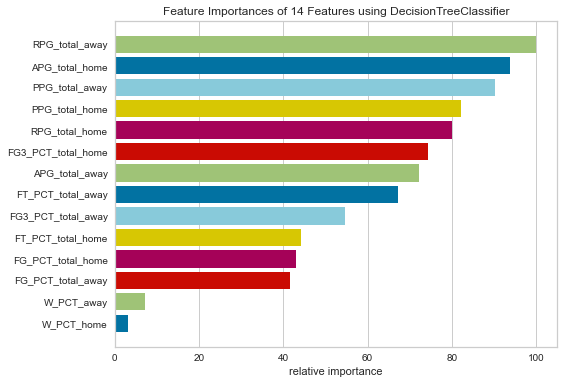

---------------------------------------------
i=19
FT:

Best decision tree accuracy ({'max_leaf_nodes': 140, 'criterion': 'gini'}): 0.58
              precision    recall  f1-score   support

           0       0.59      0.49      0.53       214
           1       0.57      0.67      0.62       219

    accuracy                           0.58       433
   macro avg       0.58      0.58      0.58       433
weighted avg       0.58      0.58      0.58       433



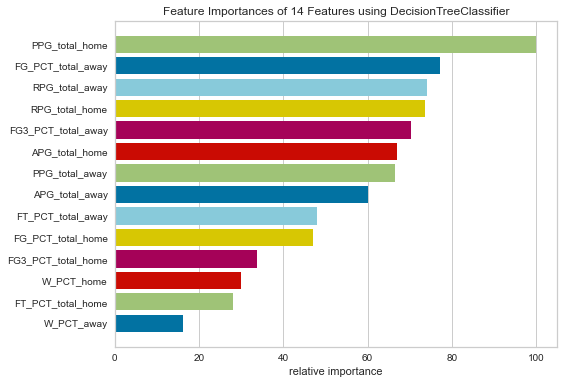

---------------------------------------------
Mean accuracy: 0.5438799076212472
Max accuracy: 0.5565819861431871
Min accuracy: 0.5242494226327945
i=20
AST:

Best decision tree accuracy ({'max_leaf_nodes': 4, 'criterion': 'entropy'}): 0.59
              precision    recall  f1-score   support

           0       0.59      0.97      0.73       384
           1       0.48      0.04      0.08       270

    accuracy                           0.59       654
   macro avg       0.53      0.50      0.40       654
weighted avg       0.54      0.59      0.46       654



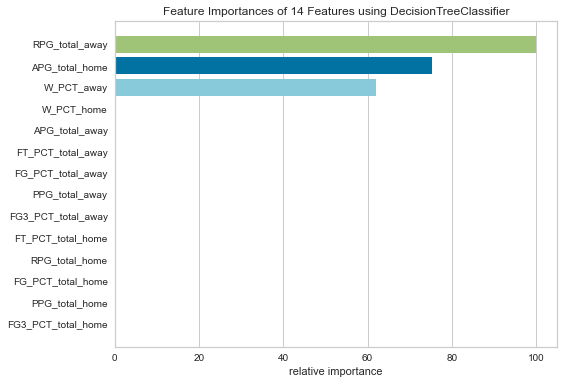

---------------------------------------------
i=21
AST:

Best decision tree accuracy ({'max_leaf_nodes': 160, 'criterion': 'entropy'}): 0.60
              precision    recall  f1-score   support

           0       0.66      0.69      0.67       394
           1       0.50      0.47      0.48       260

    accuracy                           0.60       654
   macro avg       0.58      0.58      0.58       654
weighted avg       0.60      0.60      0.60       654



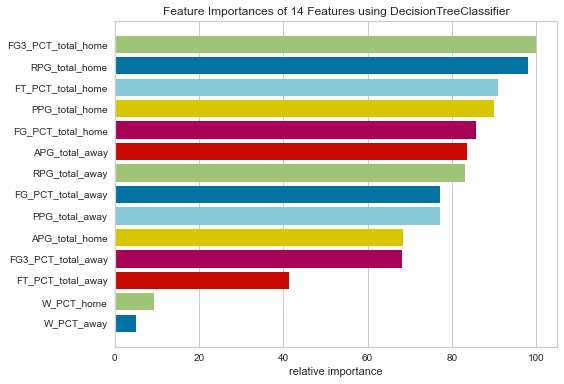

---------------------------------------------
i=22
AST:

Best decision tree accuracy ({'max_leaf_nodes': 1456, 'criterion': 'gini'}): 0.60
              precision    recall  f1-score   support

           0       0.67      0.67      0.67       393
           1       0.50      0.50      0.50       261

    accuracy                           0.60       654
   macro avg       0.59      0.59      0.59       654
weighted avg       0.60      0.60      0.60       654



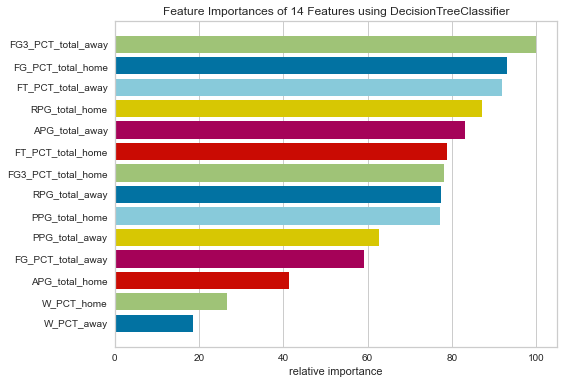

---------------------------------------------
i=23
AST:

Best decision tree accuracy ({'max_leaf_nodes': 400, 'criterion': 'gini'}): 0.59
              precision    recall  f1-score   support

           0       0.67      0.66      0.66       399
           1       0.48      0.49      0.48       255

    accuracy                           0.59       654
   macro avg       0.57      0.57      0.57       654
weighted avg       0.59      0.59      0.59       654



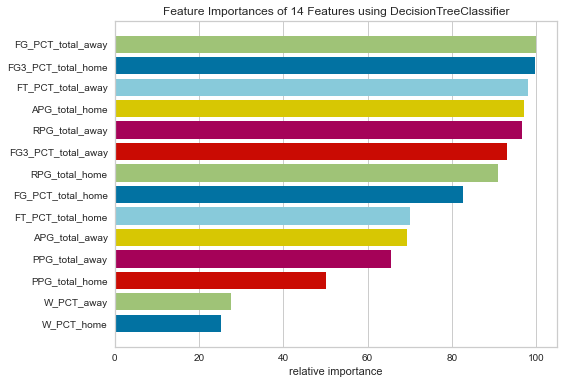

---------------------------------------------
i=24
AST:

Best decision tree accuracy ({'max_leaf_nodes': 1358, 'criterion': 'entropy'}): 0.62
              precision    recall  f1-score   support

           0       0.67      0.71      0.69       387
           1       0.54      0.48      0.51       266

    accuracy                           0.62       653
   macro avg       0.60      0.60      0.60       653
weighted avg       0.61      0.62      0.62       653



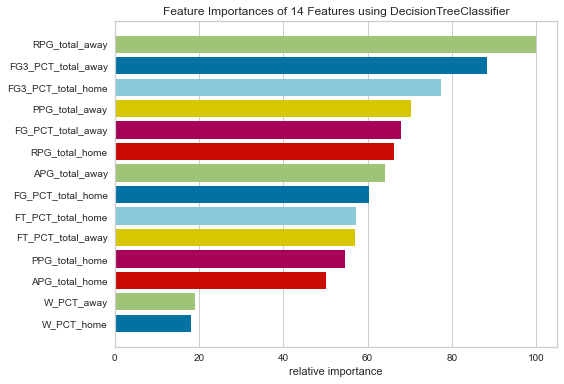

---------------------------------------------
Mean accuracy: 0.5951834862385321
Max accuracy: 0.6039755351681957
Min accuracy: 0.5856269113149847
i=25
REB:

Best decision tree accuracy ({'max_leaf_nodes': 726, 'criterion': 'entropy'}): 0.60
              precision    recall  f1-score   support

           0       0.66      0.67      0.67       344
           1       0.52      0.50      0.51       238

    accuracy                           0.60       582
   macro avg       0.59      0.59      0.59       582
weighted avg       0.60      0.60      0.60       582



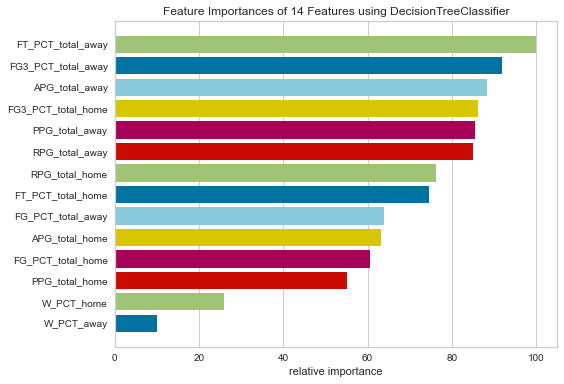

---------------------------------------------
i=26
REB:

Best decision tree accuracy ({'max_leaf_nodes': 306, 'criterion': 'gini'}): 0.59
              precision    recall  f1-score   support

           0       0.64      0.66      0.65       334
           1       0.52      0.50      0.51       248

    accuracy                           0.59       582
   macro avg       0.58      0.58      0.58       582
weighted avg       0.59      0.59      0.59       582



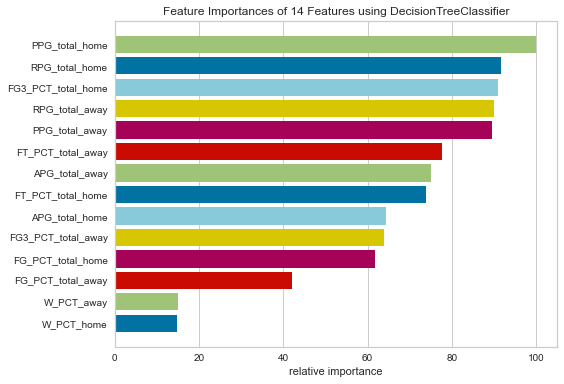

---------------------------------------------
i=27
REB:

Best decision tree accuracy ({'max_leaf_nodes': 1098, 'criterion': 'entropy'}): 0.58
              precision    recall  f1-score   support

           0       0.68      0.62      0.65       362
           1       0.45      0.51      0.48       220

    accuracy                           0.58       582
   macro avg       0.56      0.57      0.56       582
weighted avg       0.59      0.58      0.58       582



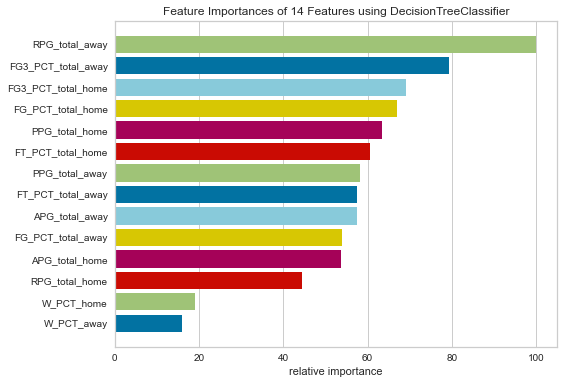

---------------------------------------------
i=28
REB:

Best decision tree accuracy ({'max_leaf_nodes': 1356, 'criterion': 'gini'}): 0.57
              precision    recall  f1-score   support

           0       0.60      0.66      0.63       319
           1       0.53      0.46      0.49       263

    accuracy                           0.57       582
   macro avg       0.56      0.56      0.56       582
weighted avg       0.57      0.57      0.57       582



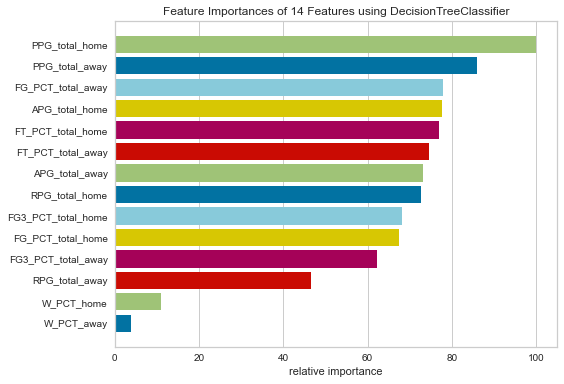

---------------------------------------------
i=29
REB:

Best decision tree accuracy ({'max_leaf_nodes': 1418, 'criterion': 'entropy'}): 0.56
              precision    recall  f1-score   support

           0       0.63      0.63      0.63       341
           1       0.47      0.46      0.47       240

    accuracy                           0.56       581
   macro avg       0.55      0.55      0.55       581
weighted avg       0.56      0.56      0.56       581



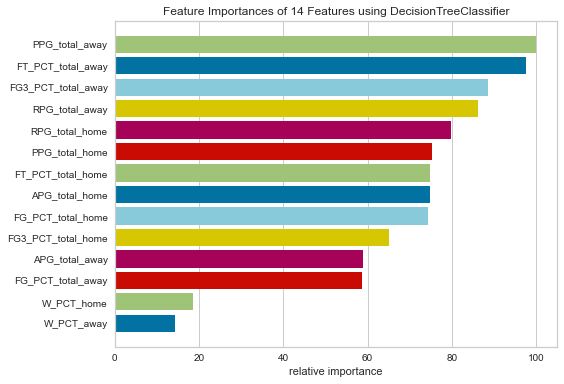

---------------------------------------------
Mean accuracy: 0.5859106529209621
Max accuracy: 0.6048109965635738
Min accuracy: 0.570446735395189


In [32]:
# print_all_metrics_and_plot(
#     DecisionTreeClassifier(random_state=0),
#     X_train_dict,
#     X_test_dict,
#     {
#         'max_leaf_nodes': [*range(4,60)],
#         'criterion': ['gini', 'entropy'],
#     },
# )
print_cross_validated_and_plot(X_train_dicts, X_test_dicts, y_train_dicts, y_test_dicts, {
    'max_leaf_nodes': [*range(4,2000,2)],
    'criterion': ['gini', 'entropy'],
})

## Try prune max features

i=0
WINNER:

Best decision tree accuracy ({'max_features': 7, 'criterion': 'entropy'}): 0.62
              precision    recall  f1-score   support

           0       0.71      0.73      0.72       633
           1       0.45      0.43      0.44       333

    accuracy                           0.62       966
   macro avg       0.58      0.58      0.58       966
weighted avg       0.62      0.62      0.62       966



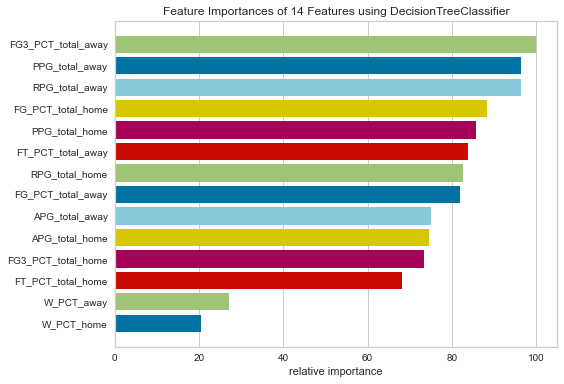

---------------------------------------------
i=1
WINNER:

Best decision tree accuracy ({'max_features': 7, 'criterion': 'gini'}): 0.65
              precision    recall  f1-score   support

           0       0.72      0.75      0.74       627
           1       0.50      0.45      0.47       338

    accuracy                           0.65       965
   macro avg       0.61      0.60      0.60       965
weighted avg       0.64      0.65      0.64       965



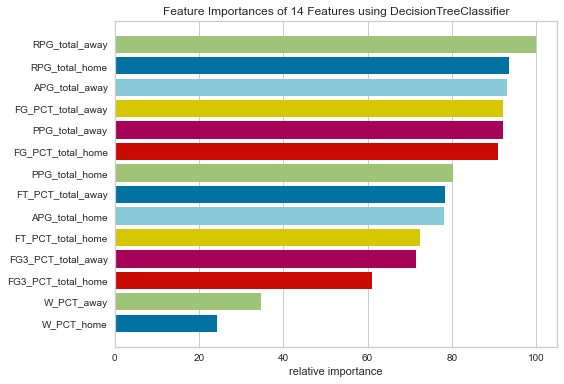

---------------------------------------------
i=2
WINNER:

Best decision tree accuracy ({'max_features': 2, 'criterion': 'entropy'}): 0.60
              precision    recall  f1-score   support

           0       0.68      0.68      0.68       604
           1       0.47      0.48      0.47       361

    accuracy                           0.60       965
   macro avg       0.58      0.58      0.58       965
weighted avg       0.60      0.60      0.60       965



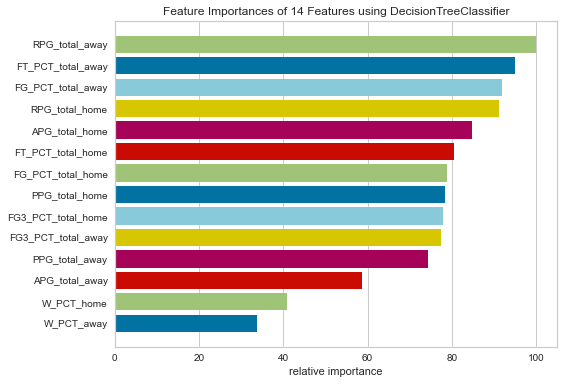

---------------------------------------------
i=3
WINNER:

Best decision tree accuracy ({'max_features': 7, 'criterion': 'entropy'}): 0.64
              precision    recall  f1-score   support

           0       0.74      0.73      0.73       653
           1       0.45      0.47      0.46       312

    accuracy                           0.64       965
   macro avg       0.60      0.60      0.60       965
weighted avg       0.65      0.64      0.65       965



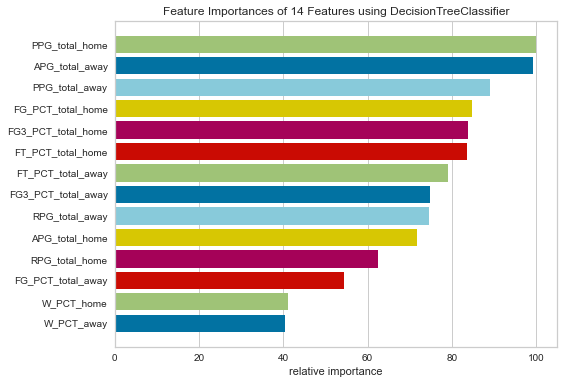

---------------------------------------------
i=4
WINNER:

Best decision tree accuracy ({'max_features': 7, 'criterion': 'gini'}): 0.62
              precision    recall  f1-score   support

           0       0.68      0.74      0.71       596
           1       0.51      0.44      0.47       369

    accuracy                           0.62       965
   macro avg       0.59      0.59      0.59       965
weighted avg       0.61      0.62      0.62       965



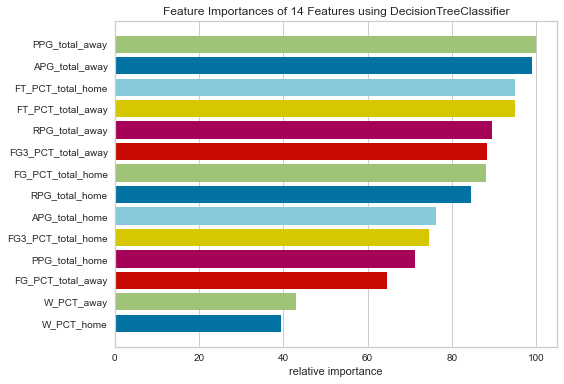

---------------------------------------------
Mean accuracy: 0.6285950289104152
Max accuracy: 0.6466321243523316
Min accuracy: 0.6010362694300518
i=5
FGP:

Best decision tree accuracy ({'max_features': 10, 'criterion': 'entropy'}): 0.60
              precision    recall  f1-score   support

           0       0.68      0.65      0.66       420
           1       0.48      0.51      0.50       269

    accuracy                           0.60       689
   macro avg       0.58      0.58      0.58       689
weighted avg       0.60      0.60      0.60       689



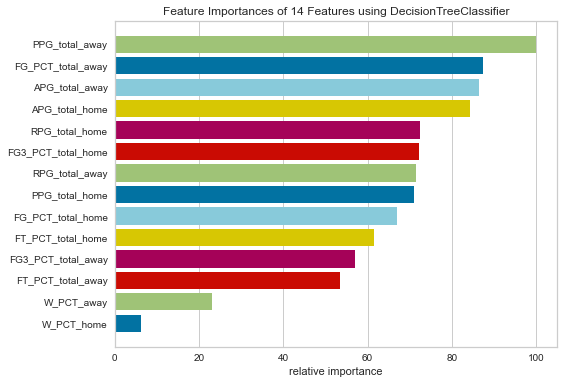

---------------------------------------------
i=6
FGP:

Best decision tree accuracy ({'max_features': 11, 'criterion': 'gini'}): 0.63
              precision    recall  f1-score   support

           0       0.68      0.73      0.70       410
           1       0.55      0.49      0.52       279

    accuracy                           0.63       689
   macro avg       0.62      0.61      0.61       689
weighted avg       0.63      0.63      0.63       689



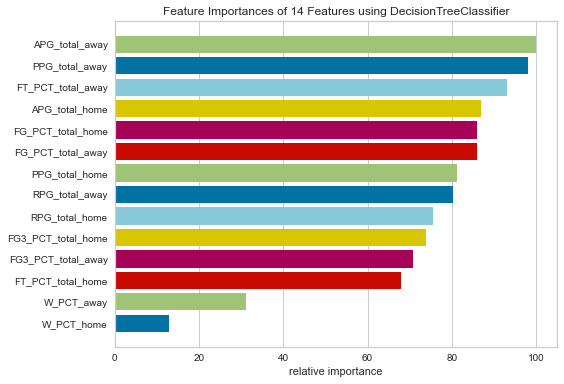

---------------------------------------------
i=7
FGP:

Best decision tree accuracy ({'max_features': 8, 'criterion': 'entropy'}): 0.58
              precision    recall  f1-score   support

           0       0.64      0.66      0.65       407
           1       0.49      0.48      0.48       282

    accuracy                           0.58       689
   macro avg       0.57      0.57      0.57       689
weighted avg       0.58      0.58      0.58       689



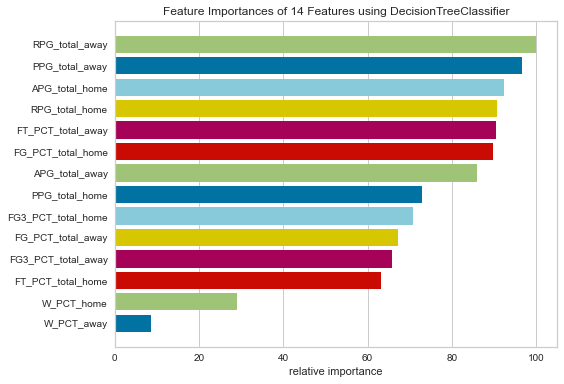

---------------------------------------------
i=8
FGP:

Best decision tree accuracy ({'max_features': 8, 'criterion': 'entropy'}): 0.62
              precision    recall  f1-score   support

           0       0.69      0.71      0.70       423
           1       0.51      0.49      0.50       265

    accuracy                           0.62       688
   macro avg       0.60      0.60      0.60       688
weighted avg       0.62      0.62      0.62       688



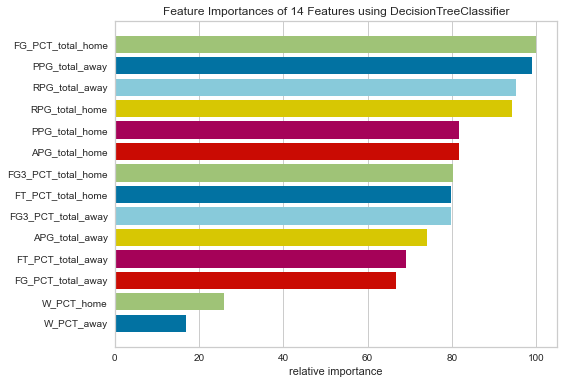

---------------------------------------------
i=9
FGP:

Best decision tree accuracy ({'max_features': 8, 'criterion': 'entropy'}): 0.59
              precision    recall  f1-score   support

           0       0.65      0.68      0.67       409
           1       0.50      0.46      0.48       279

    accuracy                           0.59       688
   macro avg       0.57      0.57      0.57       688
weighted avg       0.59      0.59      0.59       688



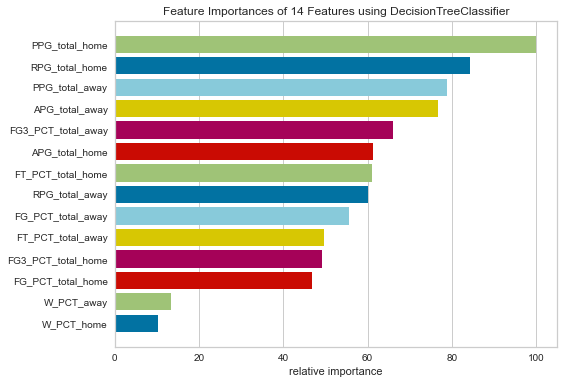

---------------------------------------------
Mean accuracy: 0.6094430333817126
Max accuracy: 0.6328011611030478
Min accuracy: 0.5834542815674891
i=10
FG3:

Best decision tree accuracy ({'max_features': 4, 'criterion': 'entropy'}): 0.55
              precision    recall  f1-score   support

           0       0.57      0.57      0.57       235
           1       0.53      0.54      0.54       216

    accuracy                           0.55       451
   macro avg       0.55      0.55      0.55       451
weighted avg       0.55      0.55      0.55       451



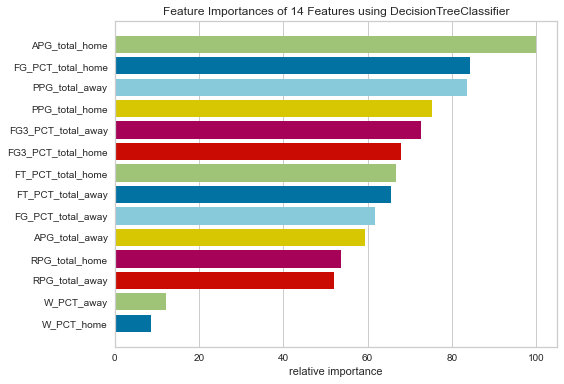

---------------------------------------------
i=11
FG3:

Best decision tree accuracy ({'max_features': None, 'criterion': 'gini'}): 0.55
              precision    recall  f1-score   support

           0       0.59      0.59      0.59       247
           1       0.51      0.51      0.51       204

    accuracy                           0.55       451
   macro avg       0.55      0.55      0.55       451
weighted avg       0.55      0.55      0.55       451



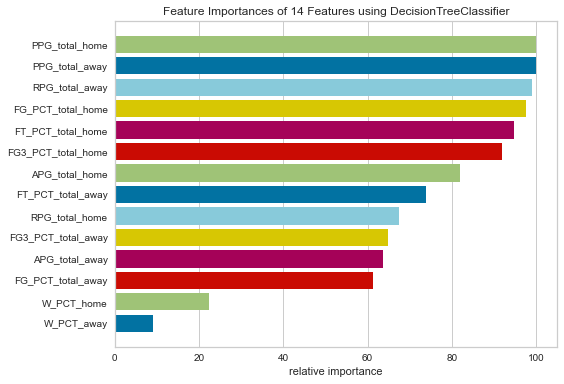

---------------------------------------------
i=12
FG3:

Best decision tree accuracy ({'max_features': 8, 'criterion': 'entropy'}): 0.53
              precision    recall  f1-score   support

           0       0.55      0.59      0.57       238
           1       0.50      0.46      0.48       213

    accuracy                           0.53       451
   macro avg       0.53      0.53      0.53       451
weighted avg       0.53      0.53      0.53       451



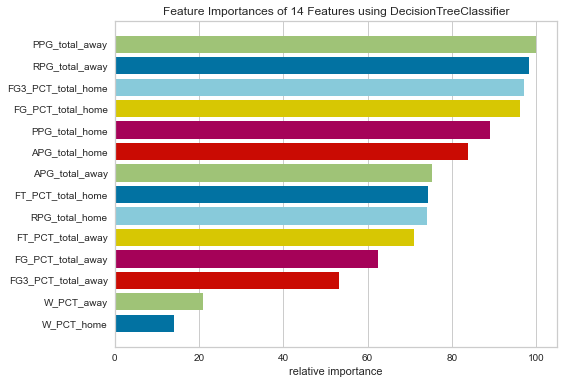

---------------------------------------------
i=13
FG3:

Best decision tree accuracy ({'max_features': 8, 'criterion': 'entropy'}): 0.53
              precision    recall  f1-score   support

           0       0.54      0.56      0.55       232
           1       0.51      0.49      0.50       219

    accuracy                           0.53       451
   macro avg       0.52      0.52      0.52       451
weighted avg       0.53      0.53      0.53       451



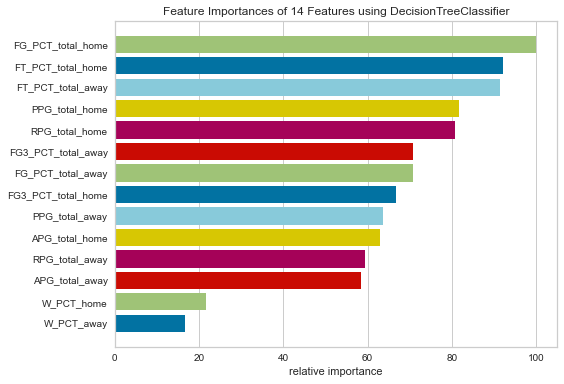

---------------------------------------------
i=14
FG3:

Best decision tree accuracy ({'max_features': 10, 'criterion': 'entropy'}): 0.57
              precision    recall  f1-score   support

           0       0.59      0.56      0.58       236
           1       0.54      0.58      0.56       214

    accuracy                           0.57       450
   macro avg       0.57      0.57      0.57       450
weighted avg       0.57      0.57      0.57       450



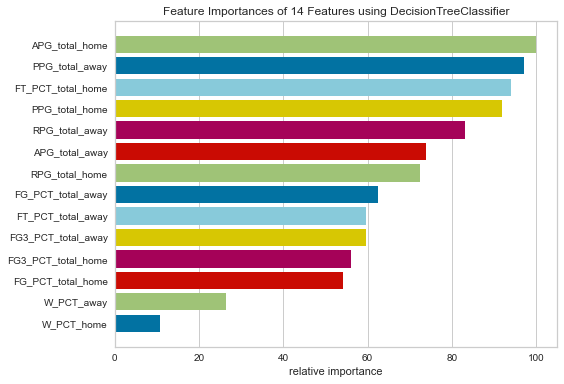

---------------------------------------------
Mean accuracy: 0.541019955654102
Max accuracy: 0.5543237250554324
Min accuracy: 0.5254988913525499
i=15
FT:

Best decision tree accuracy ({'max_features': 11, 'criterion': 'entropy'}): 0.55
              precision    recall  f1-score   support

           0       0.53      0.56      0.55       208
           1       0.57      0.55      0.56       225

    accuracy                           0.55       433
   macro avg       0.55      0.55      0.55       433
weighted avg       0.56      0.55      0.55       433



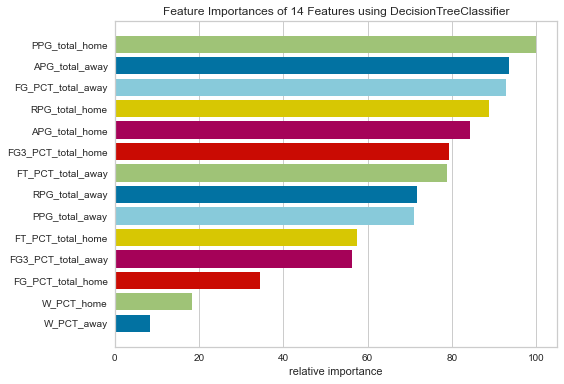

---------------------------------------------
i=16
FT:

Best decision tree accuracy ({'max_features': 6, 'criterion': 'gini'}): 0.59
              precision    recall  f1-score   support

           0       0.59      0.59      0.59       218
           1       0.59      0.59      0.59       215

    accuracy                           0.59       433
   macro avg       0.59      0.59      0.59       433
weighted avg       0.59      0.59      0.59       433



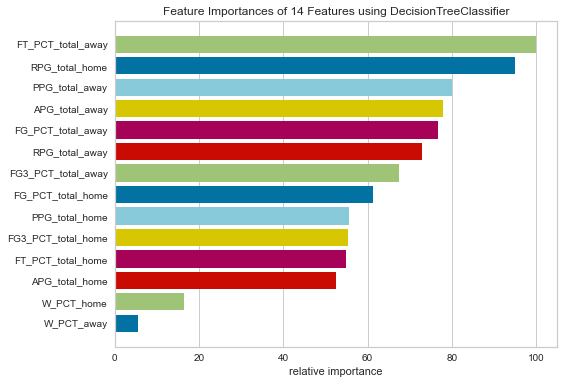

---------------------------------------------
i=17
FT:

Best decision tree accuracy ({'max_features': 10, 'criterion': 'entropy'}): 0.57
              precision    recall  f1-score   support

           0       0.56      0.56      0.56       210
           1       0.58      0.58      0.58       223

    accuracy                           0.57       433
   macro avg       0.57      0.57      0.57       433
weighted avg       0.57      0.57      0.57       433



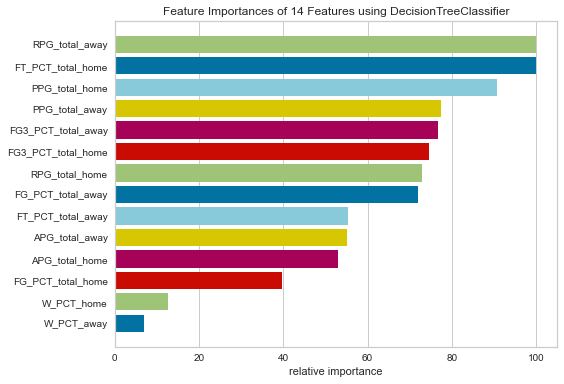

---------------------------------------------
i=18
FT:

Best decision tree accuracy ({'max_features': 4, 'criterion': 'gini'}): 0.55
              precision    recall  f1-score   support

           0       0.54      0.54      0.54       209
           1       0.57      0.56      0.57       224

    accuracy                           0.55       433
   macro avg       0.55      0.55      0.55       433
weighted avg       0.55      0.55      0.55       433



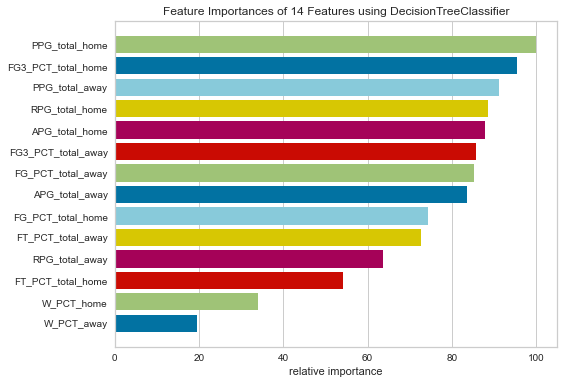

---------------------------------------------
i=19
FT:

Best decision tree accuracy ({'max_features': 5, 'criterion': 'entropy'}): 0.59
              precision    recall  f1-score   support

           0       0.58      0.60      0.59       214
           1       0.60      0.58      0.59       219

    accuracy                           0.59       433
   macro avg       0.59      0.59      0.59       433
weighted avg       0.59      0.59      0.59       433



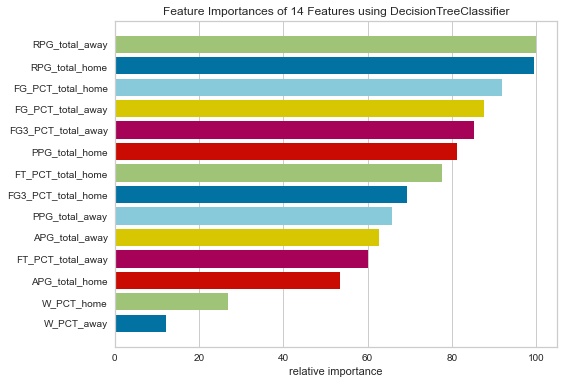

---------------------------------------------
Mean accuracy: 0.5663972286374134
Max accuracy: 0.5889145496535797
Min accuracy: 0.5519630484988453
i=20
AST:

Best decision tree accuracy ({'max_features': 7, 'criterion': 'entropy'}): 0.58
              precision    recall  f1-score   support

           0       0.64      0.67      0.65       384
           1       0.50      0.46      0.48       270

    accuracy                           0.58       654
   macro avg       0.57      0.57      0.57       654
weighted avg       0.58      0.58      0.58       654



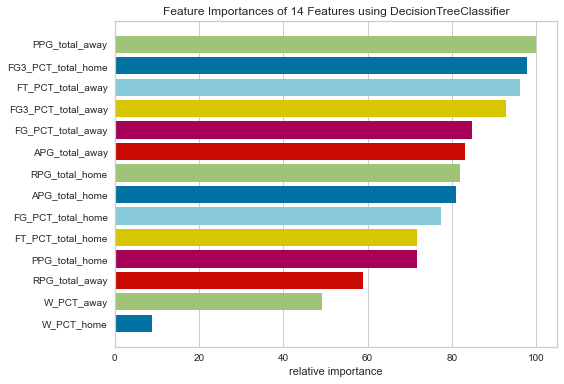

---------------------------------------------
i=21
AST:

Best decision tree accuracy ({'max_features': 6, 'criterion': 'entropy'}): 0.60
              precision    recall  f1-score   support

           0       0.65      0.70      0.68       394
           1       0.49      0.44      0.47       260

    accuracy                           0.60       654
   macro avg       0.57      0.57      0.57       654
weighted avg       0.59      0.60      0.59       654



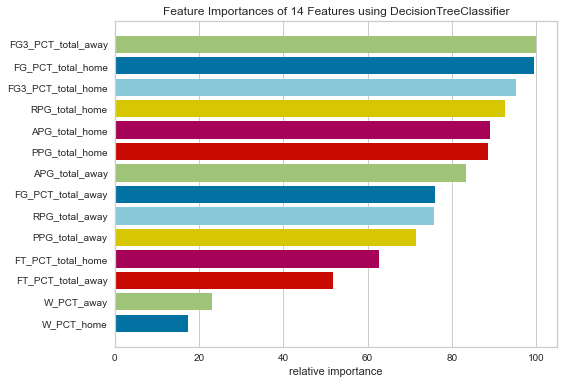

---------------------------------------------
i=22
AST:

Best decision tree accuracy ({'max_features': 8, 'criterion': 'entropy'}): 0.60
              precision    recall  f1-score   support

           0       0.66      0.69      0.67       393
           1       0.49      0.46      0.48       261

    accuracy                           0.60       654
   macro avg       0.58      0.57      0.57       654
weighted avg       0.59      0.60      0.59       654



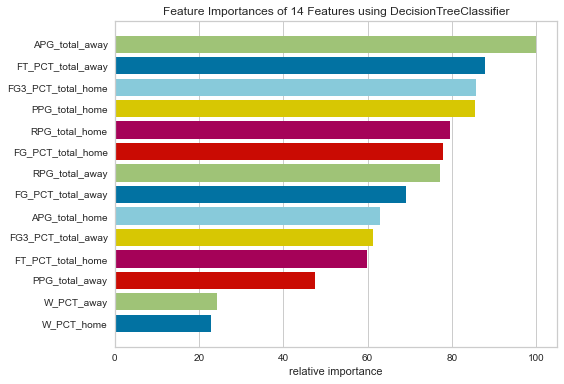

---------------------------------------------
i=23
AST:

Best decision tree accuracy ({'max_features': 2, 'criterion': 'gini'}): 0.57
              precision    recall  f1-score   support

           0       0.64      0.66      0.65       399
           1       0.44      0.42      0.43       255

    accuracy                           0.57       654
   macro avg       0.54      0.54      0.54       654
weighted avg       0.56      0.57      0.56       654



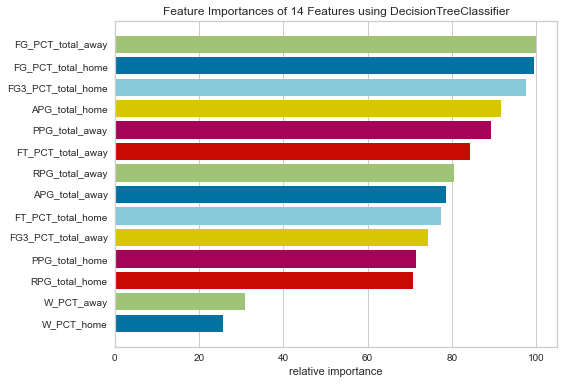

---------------------------------------------
i=24
AST:

Best decision tree accuracy ({'max_features': None, 'criterion': 'entropy'}): 0.62
              precision    recall  f1-score   support

           0       0.67      0.71      0.69       387
           1       0.53      0.48      0.51       266

    accuracy                           0.62       653
   macro avg       0.60      0.60      0.60       653
weighted avg       0.61      0.62      0.61       653



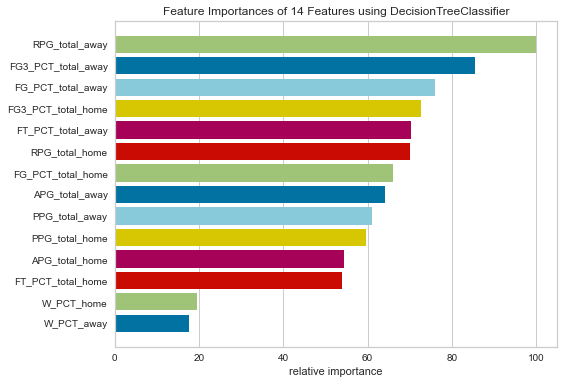

---------------------------------------------
Mean accuracy: 0.5856269113149847
Max accuracy: 0.5963302752293578
Min accuracy: 0.5657492354740061
i=25
REB:

Best decision tree accuracy ({'max_features': 11, 'criterion': 'entropy'}): 0.60
              precision    recall  f1-score   support

           0       0.66      0.68      0.67       344
           1       0.52      0.50      0.51       238

    accuracy                           0.60       582
   macro avg       0.59      0.59      0.59       582
weighted avg       0.60      0.60      0.60       582



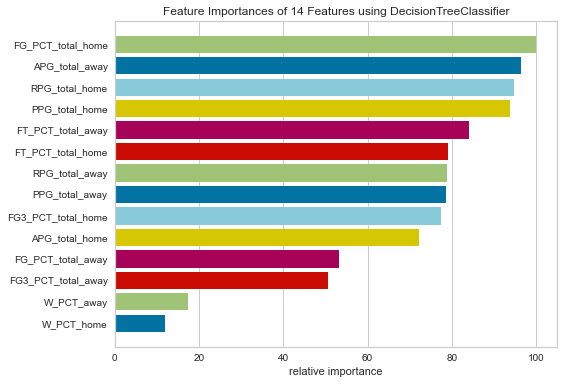

---------------------------------------------
i=26
REB:

Best decision tree accuracy ({'max_features': 'sqrt', 'criterion': 'entropy'}): 0.55
              precision    recall  f1-score   support

           0       0.62      0.57      0.59       334
           1       0.48      0.53      0.50       248

    accuracy                           0.55       582
   macro avg       0.55      0.55      0.55       582
weighted avg       0.56      0.55      0.56       582



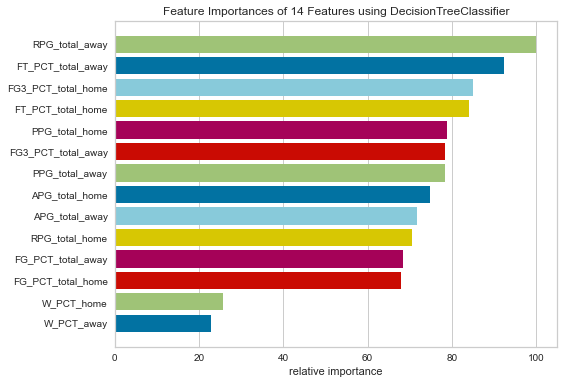

---------------------------------------------
i=27
REB:

Best decision tree accuracy ({'max_features': 4, 'criterion': 'gini'}): 0.57
              precision    recall  f1-score   support

           0       0.66      0.62      0.64       362
           1       0.44      0.48      0.46       220

    accuracy                           0.57       582
   macro avg       0.55      0.55      0.55       582
weighted avg       0.58      0.57      0.57       582



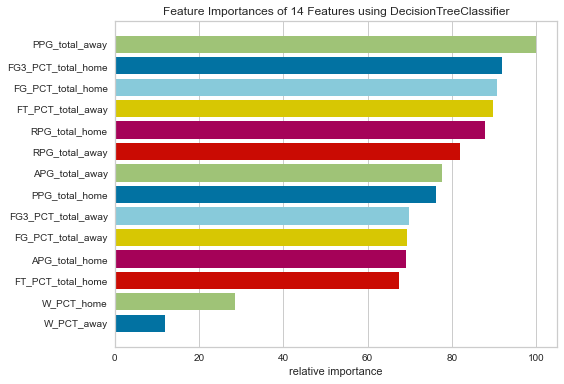

---------------------------------------------
i=28
REB:

Best decision tree accuracy ({'max_features': 11, 'criterion': 'entropy'}): 0.59
              precision    recall  f1-score   support

           0       0.61      0.68      0.64       319
           1       0.55      0.48      0.52       263

    accuracy                           0.59       582
   macro avg       0.58      0.58      0.58       582
weighted avg       0.59      0.59      0.59       582



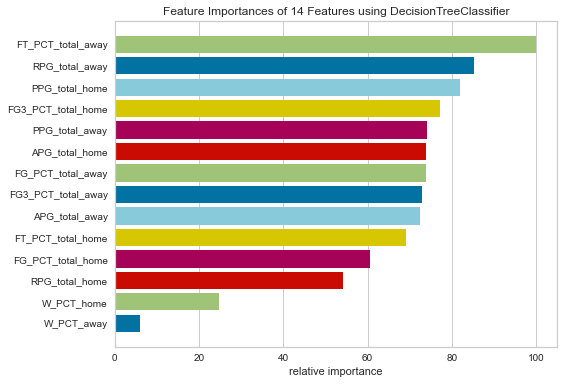

---------------------------------------------
i=29
REB:

Best decision tree accuracy ({'max_features': 5, 'criterion': 'entropy'}): 0.58
              precision    recall  f1-score   support

           0       0.64      0.64      0.64       341
           1       0.49      0.50      0.50       240

    accuracy                           0.58       581
   macro avg       0.57      0.57      0.57       581
weighted avg       0.58      0.58      0.58       581



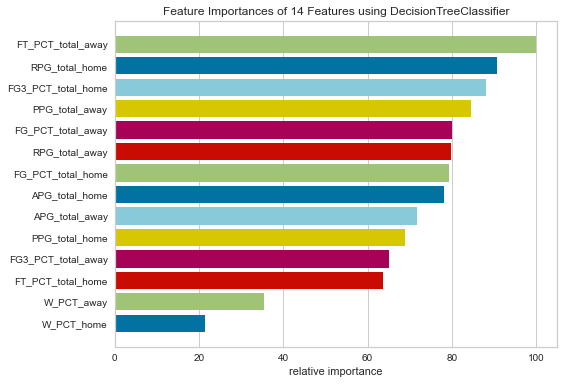

---------------------------------------------
Mean accuracy: 0.5790378006872852
Max accuracy: 0.6048109965635738
Min accuracy: 0.5532646048109966


In [33]:
# print_all_metrics_and_plot(
#     DecisionTreeClassifier(random_state=0),
#     X_train_dict,
#     X_test_dict,
#     {
#         'max_features': [*range(1,len(cumulative_stats_df.columns)//2+1), 'sqrt', 'log2', None],
#         'criterion': ['gini', 'entropy'],
#     },
# )
print_cross_validated_and_plot(X_train_dicts, X_test_dicts, y_train_dicts, y_test_dicts, {
    'max_features': [*range(1,len(cumulative_stats_df.columns)//2+1), 'sqrt', 'log2', None],
    'criterion': ['gini', 'entropy'],
})

## Try class weight balance

i=0


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


WINNER:

Best decision tree accuracy ({'criterion': 'entropy', 'class_weight': None}): 0.66
              precision    recall  f1-score   support

           0       0.73      0.76      0.75       633
           1       0.51      0.48      0.49       333

    accuracy                           0.66       966
   macro avg       0.62      0.62      0.62       966
weighted avg       0.66      0.66      0.66       966



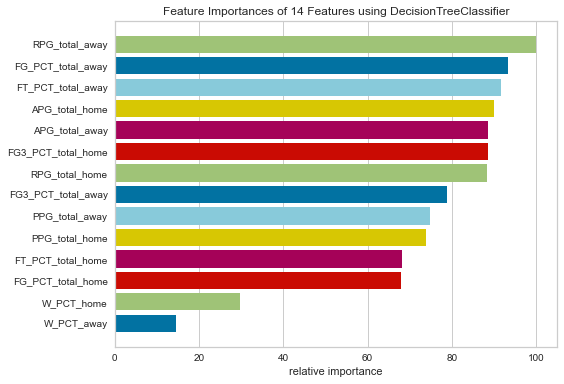

---------------------------------------------
i=1


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


WINNER:

Best decision tree accuracy ({'criterion': 'gini', 'class_weight': 'balanced'}): 0.64
              precision    recall  f1-score   support

           0       0.71      0.76      0.73       627
           1       0.49      0.42      0.45       338

    accuracy                           0.64       965
   macro avg       0.60      0.59      0.59       965
weighted avg       0.63      0.64      0.64       965



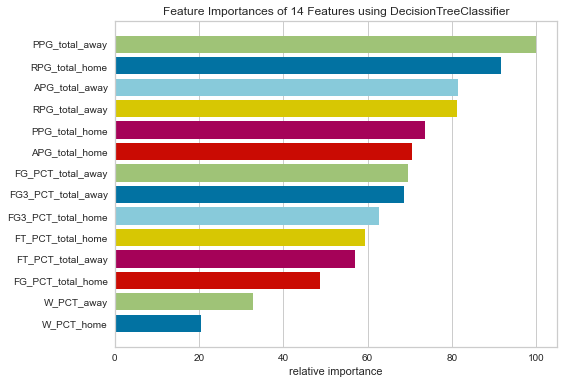

---------------------------------------------
i=2


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


WINNER:

Best decision tree accuracy ({'criterion': 'gini', 'class_weight': None}): 0.65
              precision    recall  f1-score   support

           0       0.71      0.74      0.73       604
           1       0.53      0.49      0.51       361

    accuracy                           0.65       965
   macro avg       0.62      0.62      0.62       965
weighted avg       0.64      0.65      0.65       965



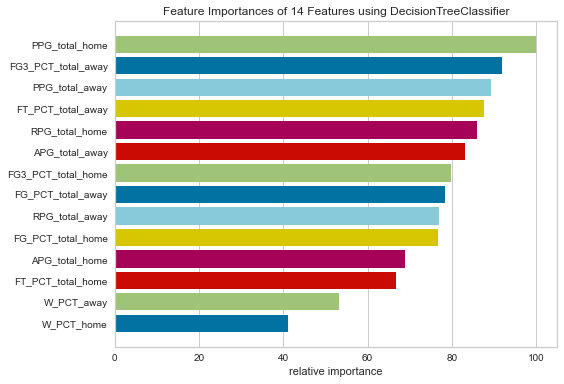

---------------------------------------------
i=3


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


WINNER:

Best decision tree accuracy ({'criterion': 'gini', 'class_weight': None}): 0.62
              precision    recall  f1-score   support

           0       0.73      0.70      0.72       653
           1       0.42      0.45      0.44       312

    accuracy                           0.62       965
   macro avg       0.58      0.58      0.58       965
weighted avg       0.63      0.62      0.63       965



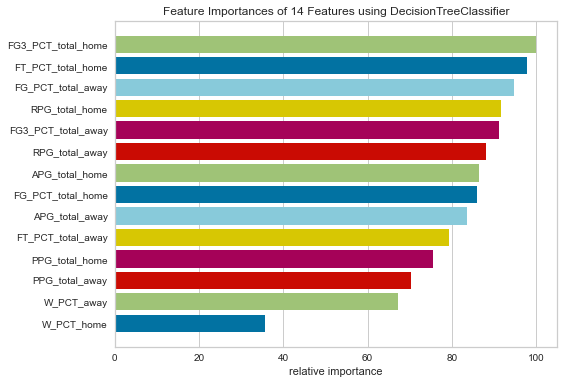

---------------------------------------------
i=4


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


WINNER:

Best decision tree accuracy ({'criterion': 'gini', 'class_weight': None}): 0.67
              precision    recall  f1-score   support

           0       0.72      0.76      0.74       596
           1       0.58      0.53      0.55       369

    accuracy                           0.67       965
   macro avg       0.65      0.64      0.65       965
weighted avg       0.67      0.67      0.67       965



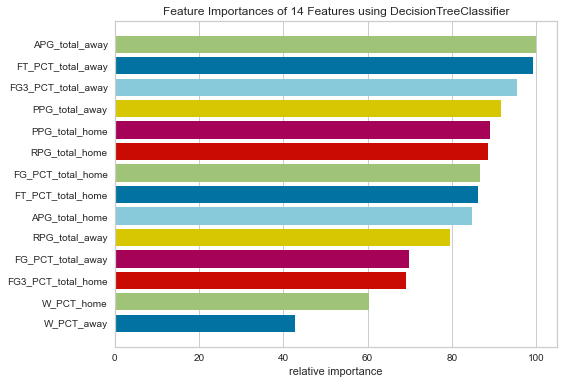

---------------------------------------------
Mean accuracy: 0.6436110127763652
Max accuracy: 0.6614906832298136
Min accuracy: 0.6227979274611399
i=5


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FGP:

Best decision tree accuracy ({'criterion': 'entropy', 'class_weight': 'balanced'}): 0.59
              precision    recall  f1-score   support

           0       0.66      0.68      0.67       420
           1       0.47      0.45      0.46       269

    accuracy                           0.59       689
   macro avg       0.57      0.56      0.57       689
weighted avg       0.59      0.59      0.59       689



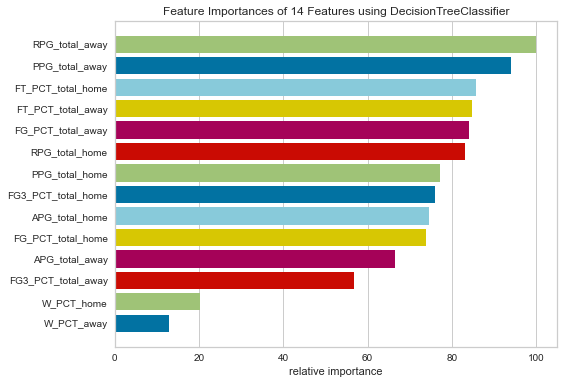

---------------------------------------------
i=6


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FGP:

Best decision tree accuracy ({'criterion': 'gini', 'class_weight': 'balanced'}): 0.58
              precision    recall  f1-score   support

           0       0.64      0.68      0.66       410
           1       0.48      0.43      0.45       279

    accuracy                           0.58       689
   macro avg       0.56      0.56      0.56       689
weighted avg       0.57      0.58      0.58       689



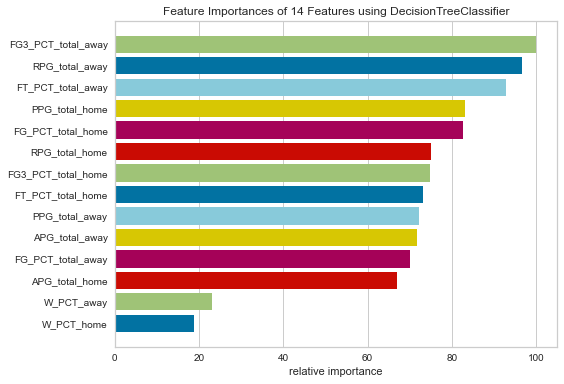

---------------------------------------------
i=7


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FGP:

Best decision tree accuracy ({'criterion': 'gini', 'class_weight': None}): 0.62
              precision    recall  f1-score   support

           0       0.67      0.69      0.68       407
           1       0.53      0.51      0.52       282

    accuracy                           0.62       689
   macro avg       0.60      0.60      0.60       689
weighted avg       0.61      0.62      0.61       689



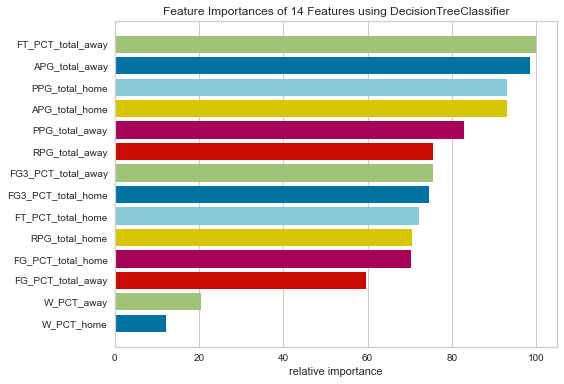

---------------------------------------------
i=8


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FGP:

Best decision tree accuracy ({'criterion': 'entropy', 'class_weight': 'balanced'}): 0.63
              precision    recall  f1-score   support

           0       0.71      0.68      0.69       423
           1       0.52      0.55      0.54       265

    accuracy                           0.63       688
   macro avg       0.62      0.62      0.62       688
weighted avg       0.64      0.63      0.63       688



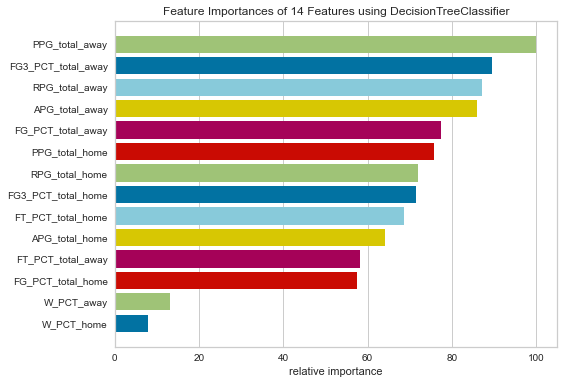

---------------------------------------------
i=9


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FGP:

Best decision tree accuracy ({'criterion': 'gini', 'class_weight': 'balanced'}): 0.59
              precision    recall  f1-score   support

           0       0.65      0.67      0.66       409
           1       0.49      0.47      0.48       279

    accuracy                           0.59       688
   macro avg       0.57      0.57      0.57       688
weighted avg       0.59      0.59      0.59       688



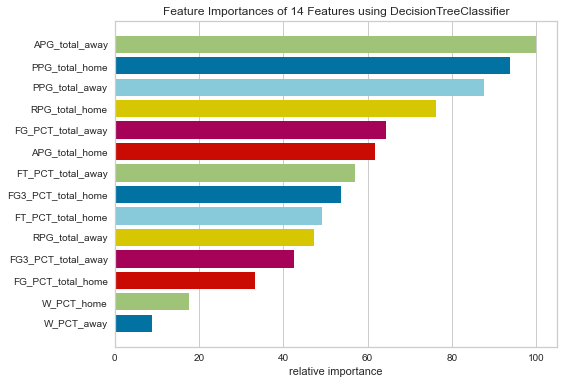

---------------------------------------------
Mean accuracy: 0.6043658444999493
Max accuracy: 0.6322674418604651
Min accuracy: 0.579100145137881
i=10


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FG3:

Best decision tree accuracy ({'criterion': 'gini', 'class_weight': 'balanced'}): 0.54
              precision    recall  f1-score   support

           0       0.56      0.56      0.56       235
           1       0.52      0.53      0.53       216

    accuracy                           0.54       451
   macro avg       0.54      0.54      0.54       451
weighted avg       0.54      0.54      0.54       451



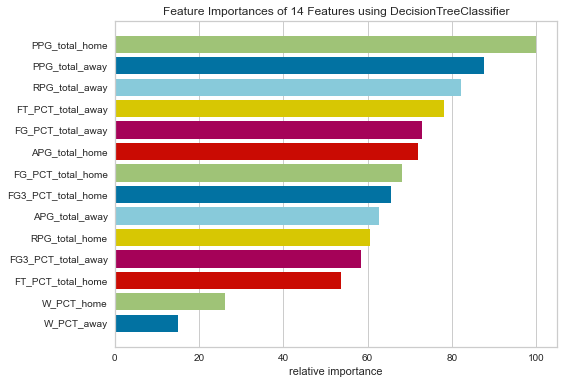

---------------------------------------------
i=11


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FG3:

Best decision tree accuracy ({'criterion': 'gini', 'class_weight': None}): 0.55
              precision    recall  f1-score   support

           0       0.59      0.59      0.59       247
           1       0.51      0.51      0.51       204

    accuracy                           0.55       451
   macro avg       0.55      0.55      0.55       451
weighted avg       0.55      0.55      0.55       451



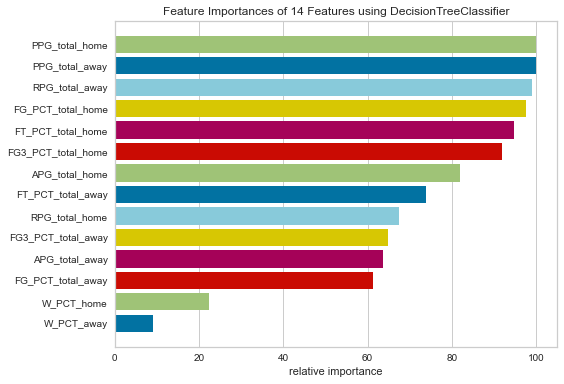

---------------------------------------------
i=12


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FG3:

Best decision tree accuracy ({'criterion': 'entropy', 'class_weight': 'balanced'}): 0.59
              precision    recall  f1-score   support

           0       0.61      0.59      0.60       238
           1       0.56      0.59      0.57       213

    accuracy                           0.59       451
   macro avg       0.59      0.59      0.59       451
weighted avg       0.59      0.59      0.59       451



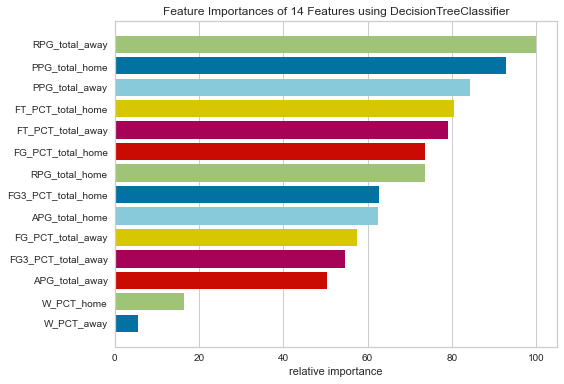

---------------------------------------------
i=13


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FG3:

Best decision tree accuracy ({'criterion': 'entropy', 'class_weight': 'balanced'}): 0.55
              precision    recall  f1-score   support

           0       0.56      0.56      0.56       232
           1       0.54      0.54      0.54       219

    accuracy                           0.55       451
   macro avg       0.55      0.55      0.55       451
weighted avg       0.55      0.55      0.55       451



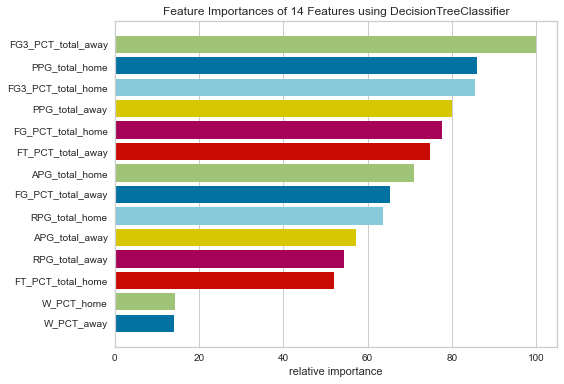

---------------------------------------------
i=14


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FG3:

Best decision tree accuracy ({'criterion': 'gini', 'class_weight': 'balanced'}): 0.54
              precision    recall  f1-score   support

           0       0.56      0.55      0.55       236
           1       0.51      0.52      0.52       214

    accuracy                           0.54       450
   macro avg       0.53      0.53      0.53       450
weighted avg       0.54      0.54      0.54       450



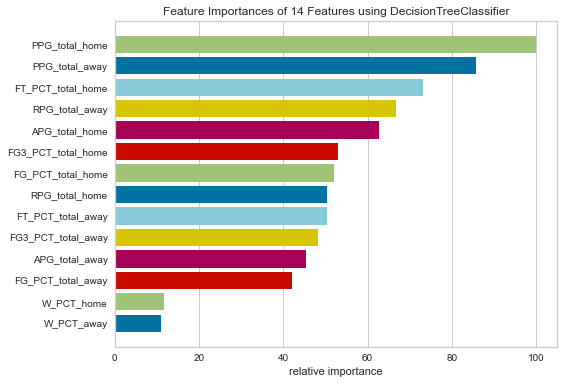

---------------------------------------------
Mean accuracy: 0.5587583148558758
Max accuracy: 0.5875831485587583
Min accuracy: 0.5432372505543237
i=15


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FT:

Best decision tree accuracy ({'criterion': 'entropy', 'class_weight': 'balanced'}): 0.52
              precision    recall  f1-score   support

           0       0.50      0.46      0.48       208
           1       0.54      0.58      0.56       225

    accuracy                           0.52       433
   macro avg       0.52      0.52      0.52       433
weighted avg       0.52      0.52      0.52       433



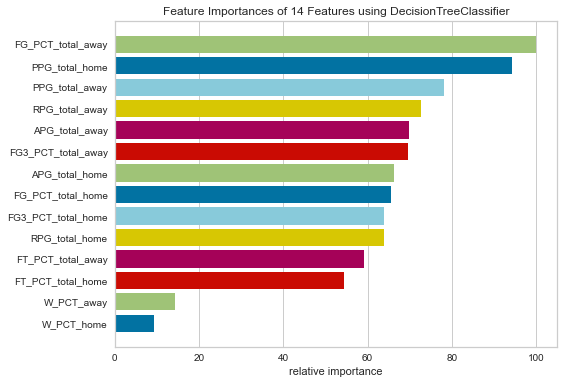

---------------------------------------------
i=16


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FT:

Best decision tree accuracy ({'criterion': 'gini', 'class_weight': None}): 0.51
              precision    recall  f1-score   support

           0       0.51      0.50      0.51       218
           1       0.51      0.52      0.51       215

    accuracy                           0.51       433
   macro avg       0.51      0.51      0.51       433
weighted avg       0.51      0.51      0.51       433



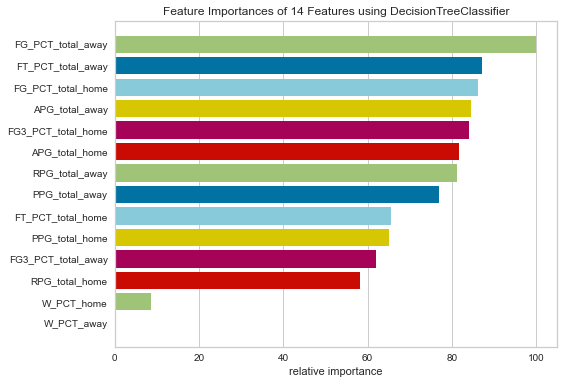

---------------------------------------------
i=17


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FT:

Best decision tree accuracy ({'criterion': 'entropy', 'class_weight': None}): 0.58
              precision    recall  f1-score   support

           0       0.57      0.60      0.59       210
           1       0.60      0.57      0.58       223

    accuracy                           0.58       433
   macro avg       0.58      0.58      0.58       433
weighted avg       0.59      0.58      0.58       433



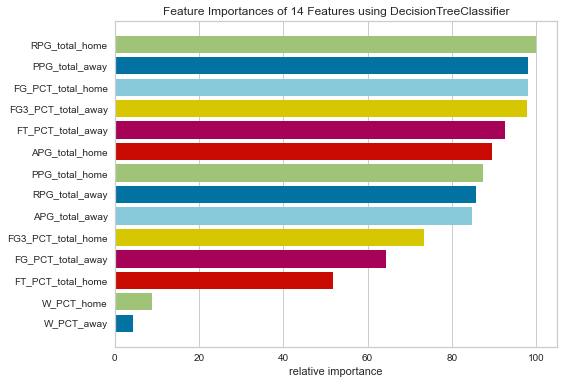

---------------------------------------------
i=18


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FT:

Best decision tree accuracy ({'criterion': 'gini', 'class_weight': 'balanced'}): 0.56
              precision    recall  f1-score   support

           0       0.55      0.56      0.55       209
           1       0.58      0.57      0.57       224

    accuracy                           0.56       433
   macro avg       0.56      0.56      0.56       433
weighted avg       0.56      0.56      0.56       433



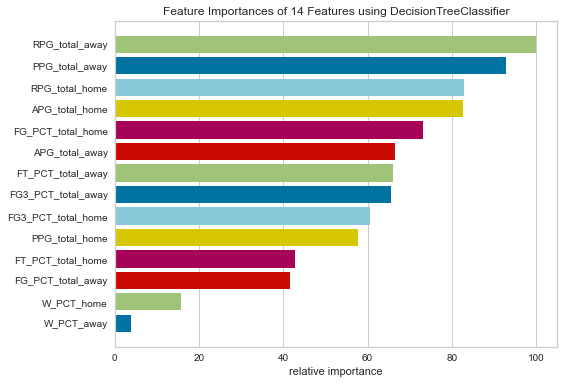

---------------------------------------------
i=19


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FT:

Best decision tree accuracy ({'criterion': 'gini', 'class_weight': 'balanced'}): 0.57
              precision    recall  f1-score   support

           0       0.57      0.51      0.54       214
           1       0.57      0.62      0.59       219

    accuracy                           0.57       433
   macro avg       0.57      0.57      0.57       433
weighted avg       0.57      0.57      0.57       433



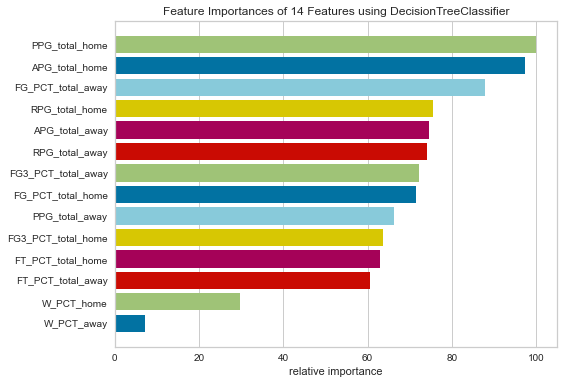

---------------------------------------------
Mean accuracy: 0.5450346420323325
Max accuracy: 0.5842956120092379
Min accuracy: 0.5103926096997691
i=20


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


AST:

Best decision tree accuracy ({'criterion': 'gini', 'class_weight': None}): 0.59
              precision    recall  f1-score   support

           0       0.64      0.67      0.65       384
           1       0.50      0.47      0.48       270

    accuracy                           0.59       654
   macro avg       0.57      0.57      0.57       654
weighted avg       0.58      0.59      0.58       654



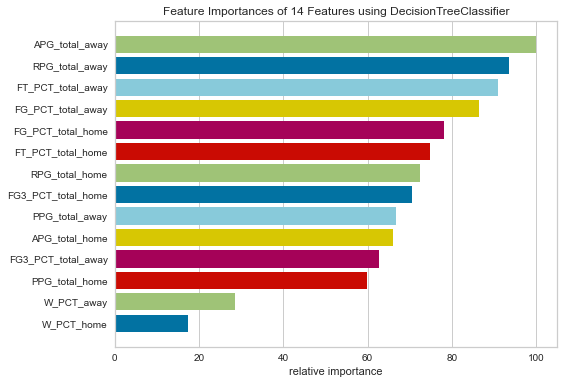

---------------------------------------------
i=21


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


AST:

Best decision tree accuracy ({'criterion': 'gini', 'class_weight': 'balanced'}): 0.58
              precision    recall  f1-score   support

           0       0.65      0.66      0.66       394
           1       0.48      0.47      0.47       260

    accuracy                           0.58       654
   macro avg       0.56      0.56      0.56       654
weighted avg       0.58      0.58      0.58       654



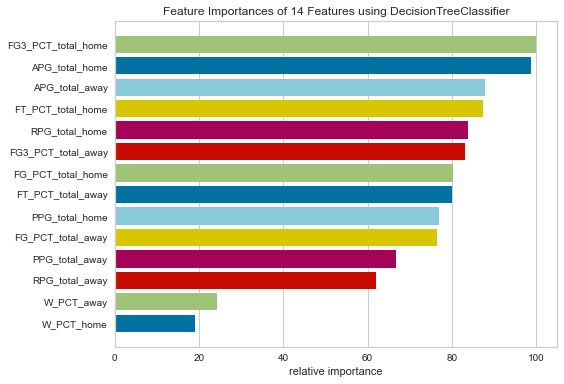

---------------------------------------------
i=22


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


AST:

Best decision tree accuracy ({'criterion': 'gini', 'class_weight': 'balanced'}): 0.58
              precision    recall  f1-score   support

           0       0.66      0.63      0.65       393
           1       0.48      0.50      0.49       261

    accuracy                           0.58       654
   macro avg       0.57      0.57      0.57       654
weighted avg       0.58      0.58      0.58       654



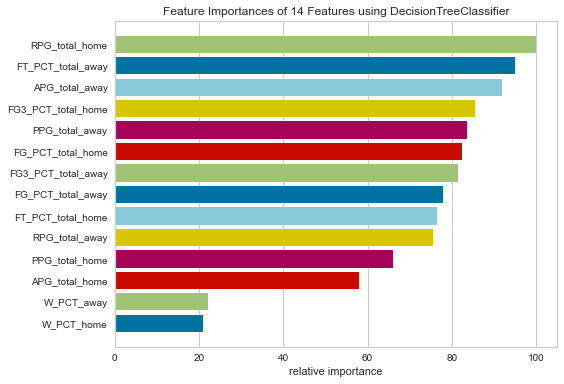

---------------------------------------------
i=23


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


AST:

Best decision tree accuracy ({'criterion': 'gini', 'class_weight': None}): 0.61
              precision    recall  f1-score   support

           0       0.69      0.65      0.67       399
           1       0.50      0.54      0.52       255

    accuracy                           0.61       654
   macro avg       0.59      0.59      0.59       654
weighted avg       0.61      0.61      0.61       654



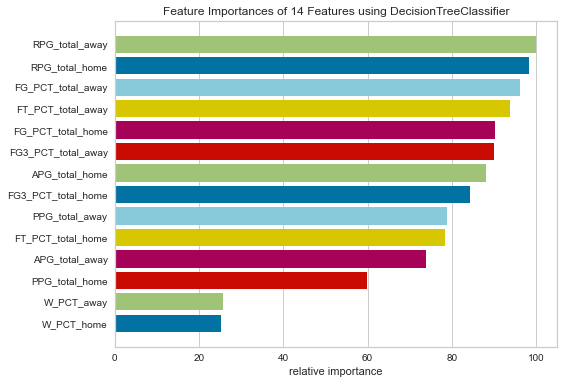

---------------------------------------------
i=24


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


AST:

Best decision tree accuracy ({'criterion': 'entropy', 'class_weight': None}): 0.62
              precision    recall  f1-score   support

           0       0.67      0.71      0.69       387
           1       0.53      0.48      0.51       266

    accuracy                           0.62       653
   macro avg       0.60      0.60      0.60       653
weighted avg       0.61      0.62      0.61       653



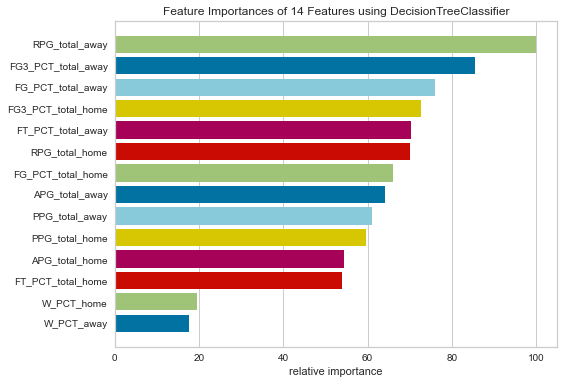

---------------------------------------------
Mean accuracy: 0.5894495412844036
Max accuracy: 0.6070336391437309
Min accuracy: 0.581039755351682
i=25


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


REB:

Best decision tree accuracy ({'criterion': 'entropy', 'class_weight': 'balanced'}): 0.56
              precision    recall  f1-score   support

           0       0.63      0.62      0.62       344
           1       0.46      0.46      0.46       238

    accuracy                           0.56       582
   macro avg       0.54      0.54      0.54       582
weighted avg       0.56      0.56      0.56       582



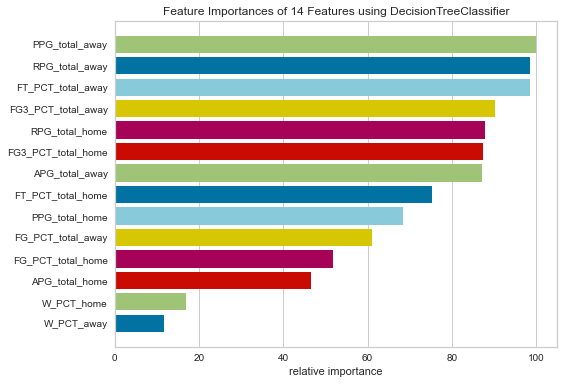

---------------------------------------------
i=26


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


REB:

Best decision tree accuracy ({'criterion': 'entropy', 'class_weight': 'balanced'}): 0.59
              precision    recall  f1-score   support

           0       0.65      0.63      0.64       334
           1       0.52      0.54      0.53       248

    accuracy                           0.59       582
   macro avg       0.58      0.58      0.58       582
weighted avg       0.59      0.59      0.59       582



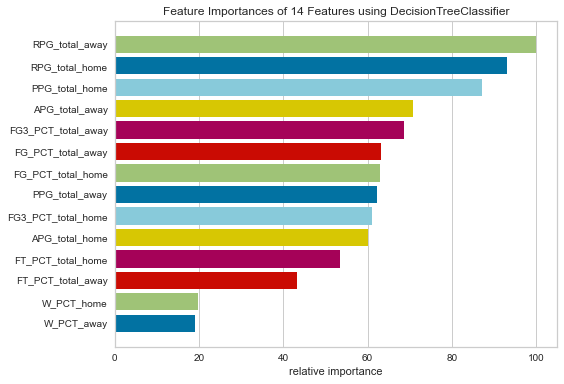

---------------------------------------------
i=27


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


REB:

Best decision tree accuracy ({'criterion': 'entropy', 'class_weight': None}): 0.60
              precision    recall  f1-score   support

           0       0.69      0.67      0.68       362
           1       0.48      0.50      0.49       220

    accuracy                           0.60       582
   macro avg       0.58      0.58      0.58       582
weighted avg       0.61      0.60      0.61       582



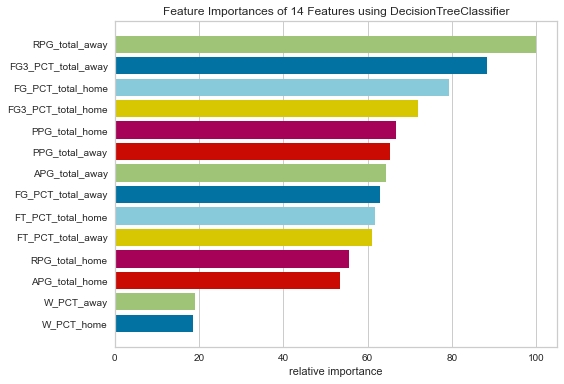

---------------------------------------------
i=28


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


REB:

Best decision tree accuracy ({'criterion': 'entropy', 'class_weight': 'balanced'}): 0.59
              precision    recall  f1-score   support

           0       0.62      0.66      0.64       319
           1       0.55      0.52      0.54       263

    accuracy                           0.59       582
   macro avg       0.59      0.59      0.59       582
weighted avg       0.59      0.59      0.59       582



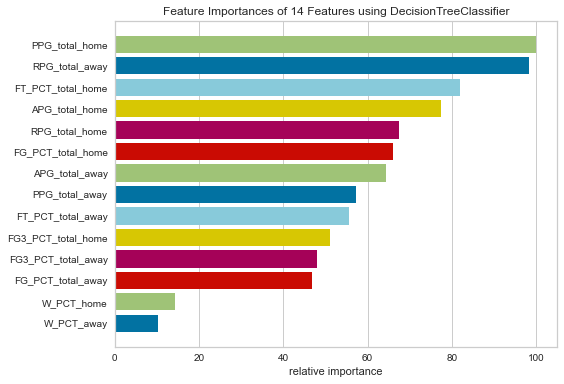

---------------------------------------------
i=29


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


REB:

Best decision tree accuracy ({'criterion': 'entropy', 'class_weight': 'balanced'}): 0.63
              precision    recall  f1-score   support

           0       0.69      0.66      0.68       341
           1       0.55      0.58      0.56       240

    accuracy                           0.63       581
   macro avg       0.62      0.62      0.62       581
weighted avg       0.63      0.63      0.63       581



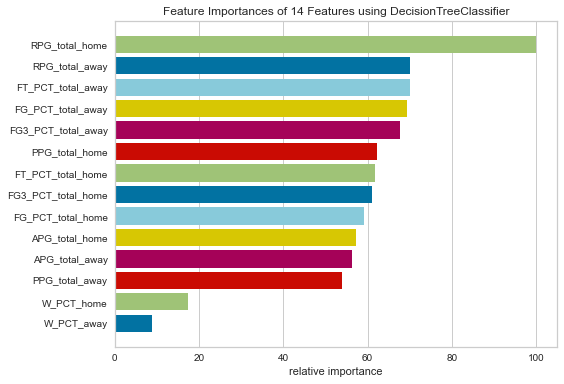

---------------------------------------------
Mean accuracy: 0.586340206185567
Max accuracy: 0.6048109965635738
Min accuracy: 0.5567010309278351


In [34]:
# print_all_metrics_and_plot(
#     DecisionTreeClassifier(random_state=0),
#     X_train_dict,
#     X_test_dict,
#     {
#         'class_weight': ['balanced', None],
#         'criterion': ['gini', 'entropy'],
#     },
# )
print_cross_validated_and_plot(X_train_dicts, X_test_dicts, y_train_dicts, y_test_dicts, {
    'class_weight': ['balanced', None],
    'criterion': ['gini', 'entropy'],
})